In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [3]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
sampleSub=pd.read_csv('SampleSubmission.csv')

In [4]:
testID = test.ID_LAT_LON_YEAR_WEEK

In [5]:
print(f'train cols: {len(train.columns)}')
print(f'test cols: {len(test.columns)}')

train cols: 76
test cols: 75


In [6]:
train.head(1)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.93944,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.0517


In [7]:
test.head(1)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,-80.286309,...,74897.052,2180.266538,81287.074479,1562.031017,10.734123,0.28066,-31.230174,33.337966,-93.217261,23.358251


In [8]:
# Train statistical summary
train.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,74005,74005.000000,74005.000000,74005.000000,74005.000000,72075.000000,72075.000000,72075.000000,72075.000000,72075.000000,...,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,7.400500e+04
unique,74005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.73_28.77_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.829723,27.782742,2020.478049,26.156098,0.000263,0.515875,0.000091,0.105690,4.487627,...,3652.349722,74390.624457,2871.262815,15.825386,0.225441,-14.277119,49.567836,-50.513220,40.558959,7.891061e+03
std,NaN,2.760589,2.746672,1.111261,14.843840,0.000599,0.196766,0.000199,0.069555,52.246537,...,1807.385280,12859.067332,1645.827671,19.696645,0.063131,47.277321,12.097417,20.623907,12.201179,5.257160e+04
min,NaN,-33.930000,21.070000,2019.000000,1.000000,-0.000989,0.133738,-0.000828,0.000000,-110.027657,...,128.299794,14541.977986,10.300364,1.151138,0.000000,-125.298058,0.100882,-97.570906,10.906227,4.806346e-02
25%,NaN,-29.630000,26.670000,2019.000000,13.000000,-0.000066,0.371745,-0.000034,0.052482,-18.178128,...,2260.917450,65920.340500,1602.615232,5.071849,0.183490,-31.952090,41.329129,-67.987723,29.786592,1.545472e+02
50%,NaN,-28.130000,28.770000,2020.000000,26.000000,0.000147,0.488695,0.000073,0.099513,-10.987544,...,3437.878915,75994.802018,2563.926290,8.609041,0.223503,-13.738030,53.233031,-45.413921,40.117572,7.231359e+02
75%,NaN,-25.730000,29.470000,2021.000000,39.000000,0.000441,0.623530,0.000191,0.152480,59.119988,...,4745.607936,84409.691135,3819.671389,17.478625,0.267716,3.790391,59.478133,-33.124961,51.445698,2.773029e+03


In [9]:
# Test statistical summary
test.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
count,28085,28085.000000,28085.000000,28085.000000,28085.000000,27168.000000,27168.000000,27168.000000,27168.000000,27168.000000,...,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000
unique,28085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.53_27.47_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.659927,27.679489,2020.478049,26.156098,0.000408,0.479412,0.000147,0.109034,3.593182,...,67146.897767,3732.987021,73290.409306,2975.243395,14.553957,0.222251,-16.226959,49.973287,-51.061556,40.363462
std,NaN,3.147071,3.953095,1.111273,14.844004,0.000694,0.185203,0.000235,0.070031,50.977486,...,13114.552110,1791.381622,12523.723569,1609.802656,17.396373,0.055726,46.873647,12.076966,20.378958,12.425623
min,NaN,-34.030000,18.370000,2019.000000,1.000000,-0.000997,0.136354,-0.000827,0.000000,-106.342976,...,13468.169925,41.779261,15849.837802,0.301802,1.000000,0.000000,-118.005679,0.113536,-97.145958,11.084878
25%,NaN,-28.130000,27.670000,2019.000000,13.000000,0.000004,0.334740,0.000002,0.054825,-18.052725,...,58141.778481,2366.468502,65100.436334,1805.892248,5.044690,0.182856,-32.190337,42.230868,-68.564190,29.771236
50%,NaN,-27.730000,29.770000,2020.000000,26.000000,0.000256,0.456401,0.000117,0.103155,-11.306408,...,67662.244391,3533.683514,74883.044228,2673.371149,8.624943,0.214512,-13.677169,53.700167,-45.805551,39.853395
75%,NaN,-24.030000,30.070000,2021.000000,39.000000,0.000632,0.579827,0.000253,0.158492,56.920923,...,76997.720804,4835.174050,82189.400173,3907.250928,16.190492,0.259952,-0.642704,59.503624,-33.299592,51.452037


In [10]:
# drop non numeric cols
num = []
non = []
for col in train.select_dtypes(include=['int64', 'float64']):
    num.append(col)

for col in train:
    if col not in num:
        non.append(col)
        
non

train.drop(non,inplace=True,axis=1)
test.drop(non,inplace=True,axis=1)

In [11]:
# identify target
target_cols = []
for i in train.columns.values:
    if i not in test.columns.values:
        target_cols.append(i)
        
target = train[target_cols]
train[target_cols].head()

,emission
0,86.051700
1,88.875670
2,91.723114
3,92.883870
4,94.878330


In [12]:
# get the correlation of each feature with respect to the target (emmission)
train_corr = train.corr()['emission'].abs().sort_values(ascending=False)
train_corr

emission                                                  1.000000
NitrogenDioxide_NO2_column_number_density                 0.288403
NitrogenDioxide_tropospheric_NO2_column_number_density    0.284160
NitrogenDioxide_NO2_slant_column_number_density           0.244449
SulphurDioxide_SO2_column_number_density_15km             0.072520
                                                            ...   
Cloud_cloud_fraction                                      0.003715
Cloud_sensor_azimuth_angle                                0.003708
week_no                                                   0.003154
Ozone_O3_effective_temperature                            0.001594
year                                                      0.000353
Name: emission, Length: 75, dtype: float64

In [13]:
# get all the features that has at least 0.6 in correlation to the 
# target

features = train_corr[train_corr > 0].index.to_list()[1:]

print(len(features))# without the target column
# features

74


In [14]:
[col for col in train.columns if not train[col].isnull().any()]

['latitude', 'longitude', 'year', 'week_no', 'emission']

### target variable distribution

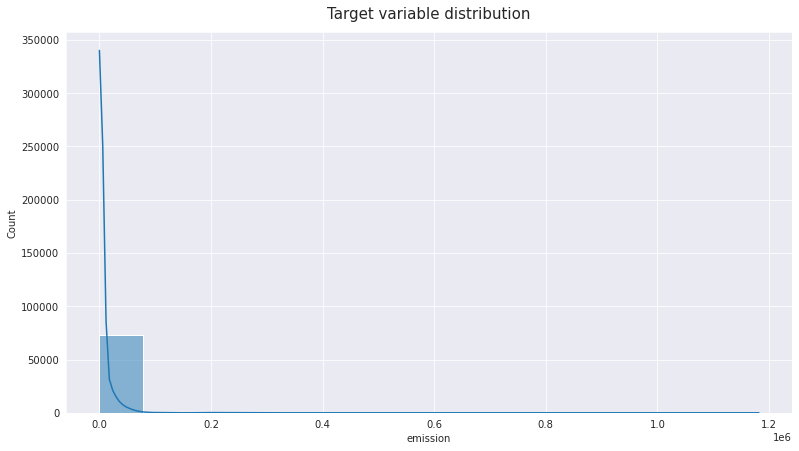

None

17.038027449698163

In [15]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

In [16]:
train.emission = np.log(train.emission)
train.emission.skew()

-0.4685478820791871

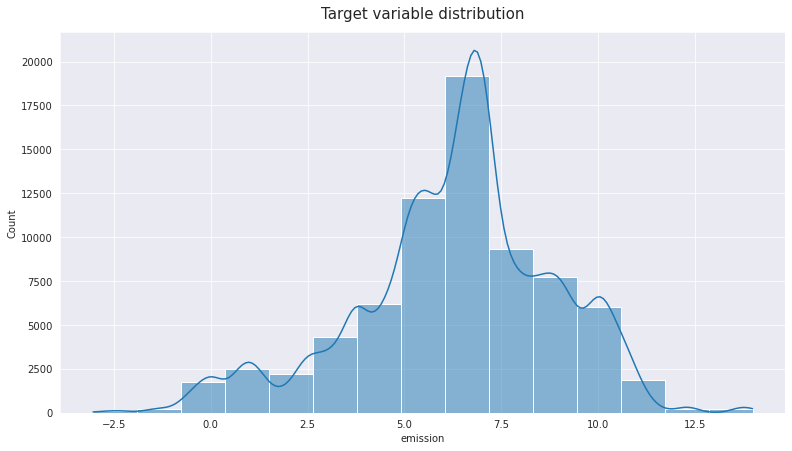

None

-0.4685478820791871

In [17]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

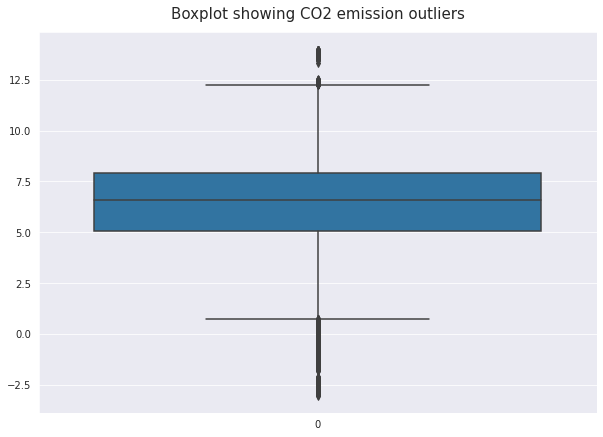

In [18]:
# Plotting boxplot for the CO2 emissions
sns.set_style('darkgrid')
plt.figure(figsize = (10, 7))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)  
plt.show()

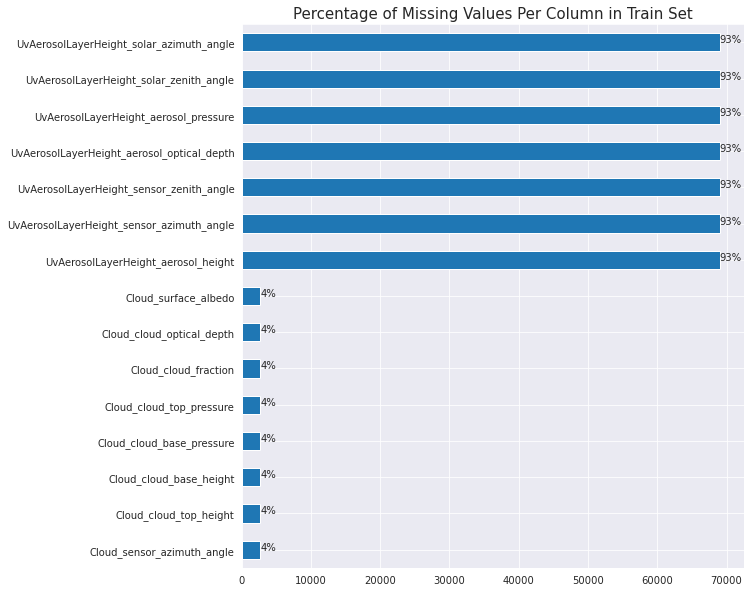

In [19]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [20]:
null_df = train.isna().sum().sort_values(ascending=False)
null_features = null_df[null_df > 30000].index.to_list()

print(len(null_features))
print(null_features)

7
['UvAerosolLayerHeight_solar_azimuth_angle', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_aerosol_optical_depth', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_aerosol_height']


In [21]:
# drop colls with large # of null values
train.drop(null_features,inplace=True,axis=1)
test.drop(null_features,inplace=True,axis=1)

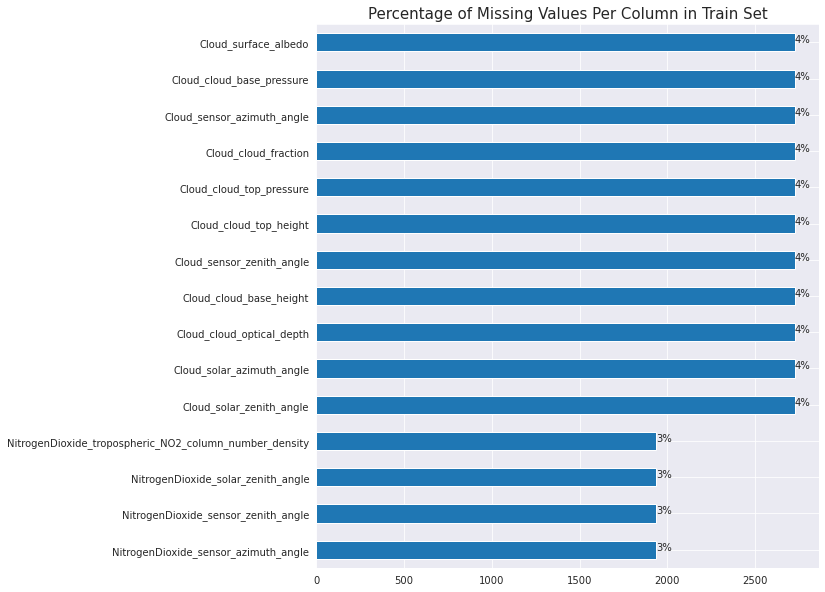

In [22]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [23]:
# Drop target from test column
p=[]
l=list(test.columns)
l.append('target')
for c in list(train.columns):
  if c not in l:
    p.append(c)
    train.drop(c,inplace=True,axis=1)

In [24]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [25]:
result_train=missing_zero_values_table(train)

Your selected dataframe has 67 columns and 74005 Rows.
There are 63 columns that have missing values.


In [26]:
# drop non numeric cols
num = []
non = []
for col in train.select_dtypes(include=['int64', 'float64']):
    num.append(col)

for col in train:
    if col not in num:
        non.append(col)
        
non

train.drop(non,inplace=True,axis=1)
test.drop(non,inplace=True,axis=1)

In [27]:
for i in train.columns.values:
    train[i].fillna((train[i].mean()), inplace=True)
    
for i in test.columns.values:
    test[i].fillna((test[i].mean()), inplace=True)

In [28]:
result_train=missing_zero_values_table(train)

Your selected dataframe has 67 columns and 74005 Rows.
There are 0 columns that have missing values.


## Simple PCA

In [29]:
from sklearn.preprocessing import StandardScaler

# performing standardization
sc = StandardScaler()
train_scaled = sc.fit_transform(train)

# apply PCA to the features using the PCA class in the sklearn.decomposition module

from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)

# perform PCA on the scaled data
pca.fit(train_scaled)

PCA()

In [30]:
# print the explained variances

'''
So how do you interpret the output? You can interpret it as follows:

The first component alone captures about 44% variability in the data
The second one captures about 19% variability in the data and so on.
The 30 components altogether capture 100% variability in the data.

'''

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# A much easier way to understand the above result is to print the cumulative variances
'''
You can now interpret the cumulative variances as follows:

The first component alone captures about 44% variability in the data
The first two components capture about 63% variability in the data and so on.
The first 8 components together capture about 92.6% variability in the data.
'''

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Variances (Percentage):
[2.63701745e+01 9.41981627e+00 6.85929110e+00 6.19156063e+00
 5.48967016e+00 4.87461302e+00 4.45393307e+00 3.53474761e+00
 3.31638403e+00 2.71483666e+00 2.63540394e+00 2.33466016e+00
 1.96736101e+00 1.82210796e+00 1.56201659e+00 1.39668348e+00
 1.30412357e+00 1.22753421e+00 1.11555579e+00 9.86048997e-01
 9.46847183e-01 8.80038762e-01 8.08529688e-01 7.11977164e-01
 6.67914750e-01 6.15581864e-01 5.93970296e-01 5.45691469e-01
 5.09876135e-01 4.78146458e-01 4.63004815e-01 4.21110136e-01
 3.56805757e-01 3.46771035e-01 3.13765908e-01 2.45892366e-01
 2.17712213e-01 2.05038013e-01 1.78724842e-01 1.14926014e-01
 1.07169784e-01 8.12254163e-02 7.56665449e-02 6.96328111e-02
 5.98206774e-02 5.70251285e-02 5.37390853e-02 4.50029072e-02
 3.86106153e-02 3.39373451e-02 3.11443929e-02 2.89664000e-02
 2.10806255e-02 1.89140194e-02 1.62446981e-02 1.45362600e-02
 1.26744960e-02 9.58728863e-03 9.10972778e-03 6.46247197e-03
 3.90325477e-03 2.58822459e-03 1.61222605e-03 1.41167551e-03


In [31]:
from matplotlib import pyplot as plt
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

Cumulative Variances (Percentage):
[26.37017454 35.78999081 42.64928191 48.84084254 54.33051269 59.20512572
 63.65905879 67.1938064  70.51019043 73.22502709 75.86043103 78.19509119
 80.1624522  81.98456016 83.54657675 84.94326023 86.2473838 ]
Number of components: 17


Text(0, 0.5, 'Explained variance (%)')

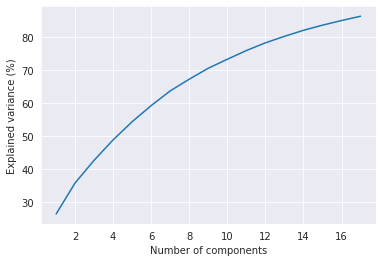

In [32]:
pca = PCA(n_components = 0.85)
pca.fit(train_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [33]:
# You can also find out the importance of each feature that contributes 
# to each of the components using the components_ attribute of the pca object
# The importance of each feature is reflected by the magnitude of the corresponding
# values in the output — the higher magnitude, the higher the importance

pca_components = abs(pca.components_)
print(pca_components)

[[5.07783907e-02 3.70085847e-03 1.44242240e-03 ... 5.31004286e-02
  2.09713461e-01 2.15853482e-01]
 [1.31355842e-01 1.50969143e-02 1.63366802e-02 ... 1.86577524e-01
  8.65365656e-02 6.28325114e-02]
 [3.75562385e-01 1.44074820e-02 4.69162215e-02 ... 5.25602791e-02
  3.21897504e-04 3.79976731e-02]
 ...
 [7.30014607e-02 2.15952909e-01 8.98057863e-02 ... 1.69716825e-01
  1.48129444e-01 3.65394166e-02]
 [3.33878845e-02 1.88463400e-01 4.77145007e-03 ... 4.87399804e-01
  1.08668301e-01 8.79976406e-02]
 [3.75485836e-02 8.30579330e-02 1.06393245e-01 ... 3.23437190e-01
  8.90668462e-03 3.51878053e-02]]


In [34]:
# For curiosity, let’s print out the top 4 features that contributes the most to each of the 6 components
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {train.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['UvAerosolIndex_solar_zenith_angle', 'Ozone_solar_zenith_angle', 'Formaldehyde_solar_zenith_angle', 'Ozone_solar_azimuth_angle']
Component 1: ['UvAerosolIndex_sensor_zenith_angle', 'Ozone_sensor_zenith_angle', 'Formaldehyde_sensor_zenith_angle', 'NitrogenDioxide_sensor_zenith_angle']
Component 2: ['UvAerosolIndex_sensor_altitude', 'latitude', 'NitrogenDioxide_sensor_altitude', 'CarbonMonoxide_sensor_altitude']
Component 3: ['Cloud_cloud_top_height', 'Cloud_cloud_top_pressure', 'Cloud_cloud_base_height', 'Cloud_cloud_base_pressure']
Component 4: ['Ozone_sensor_azimuth_angle', 'UvAerosolIndex_sensor_azimuth_angle', 'Formaldehyde_sensor_azimuth_angle', 'NitrogenDioxide_sensor_azimuth_angle']
Component 5: ['Formaldehyde_cloud_fraction', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_cloud_fraction']
Component 6: ['Ozone_cloud_fraction', 'NitrogenDioxide_tropospher

In [35]:
X_pca = pca.transform(train_scaled)
print(X_pca.shape)
print(X_pca)

(74005, 17)
[[ 7.6174793  -1.34793652  2.96658413 ...  1.07734576  0.41957769
  -0.94976567]
 [ 7.75716997  1.74819072  1.53570504 ...  1.76813893 -0.83534833
  -0.29936211]
 [ 7.04531887  1.29644274  1.81668558 ...  1.53082536  0.12024792
  -0.43751369]
 ...
 [ 1.14411394 -4.00395515 -4.14946022 ...  1.20585905  0.25488101
  -2.47874114]
 [ 0.95710024 -5.05196215 -3.55021928 ...  1.46320442  0.74940256
  -1.42908375]
 [ 1.50366653 -4.25177565 -2.81961485 ... -0.48793817  1.30924025
  -2.49012358]]


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## simple catboost

In [37]:
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = cb.CatBoostRegressor(loss_function='RMSE')
cb_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])
random_state = 12
# perform a split
X_train, X_test, y_train, y_test = train_test_split(train, target,
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)

# train the model using the PCA components
cb_regress_model.fit(X_train,y_train)

Learning rate set to 0.076392
0:	learn: 51859.5915571	total: 57.4ms	remaining: 57.3s
1:	learn: 51607.7544879	total: 66.5ms	remaining: 33.2s
2:	learn: 51401.2894321	total: 74.9ms	remaining: 24.9s
3:	learn: 51160.5965380	total: 84.2ms	remaining: 21s
4:	learn: 50917.7576416	total: 93ms	remaining: 18.5s
5:	learn: 50769.3301058	total: 102ms	remaining: 16.8s
6:	learn: 50602.8207068	total: 110ms	remaining: 15.6s
7:	learn: 50433.1263483	total: 119ms	remaining: 14.7s
8:	learn: 50220.5332258	total: 128ms	remaining: 14.1s
9:	learn: 50077.0272479	total: 136ms	remaining: 13.5s
10:	learn: 49977.8329955	total: 147ms	remaining: 13.2s
11:	learn: 49829.2357492	total: 156ms	remaining: 12.9s
12:	learn: 49722.5309363	total: 164ms	remaining: 12.4s
13:	learn: 49640.6743040	total: 171ms	remaining: 12s
14:	learn: 49550.8274579	total: 180ms	remaining: 11.8s
15:	learn: 49441.6660639	total: 188ms	remaining: 11.6s
16:	learn: 49324.9713386	total: 196ms	remaining: 11.3s
17:	learn: 49212.9689061	total: 203ms	remainin

165:	learn: 43507.3597160	total: 1.61s	remaining: 8.07s
166:	learn: 43479.9645106	total: 1.61s	remaining: 8.05s
167:	learn: 43426.5115586	total: 1.63s	remaining: 8.05s
168:	learn: 43380.5202713	total: 1.63s	remaining: 8.03s
169:	learn: 43370.4887549	total: 1.64s	remaining: 8.01s
170:	learn: 43329.4275982	total: 1.65s	remaining: 7.98s
171:	learn: 43285.8894852	total: 1.65s	remaining: 7.96s
172:	learn: 43262.1055446	total: 1.66s	remaining: 7.94s
173:	learn: 43230.8576600	total: 1.67s	remaining: 7.92s
174:	learn: 43222.1144140	total: 1.68s	remaining: 7.9s
175:	learn: 43177.5369917	total: 1.68s	remaining: 7.88s
176:	learn: 43134.1998855	total: 1.69s	remaining: 7.85s
177:	learn: 43114.3116853	total: 1.7s	remaining: 7.83s
178:	learn: 43075.4296590	total: 1.7s	remaining: 7.81s
179:	learn: 43042.7906403	total: 1.71s	remaining: 7.79s
180:	learn: 43005.5007730	total: 1.72s	remaining: 7.77s
181:	learn: 42963.0640411	total: 1.72s	remaining: 7.74s
182:	learn: 42923.1343549	total: 1.73s	remaining: 7

341:	learn: 39780.3227523	total: 2.84s	remaining: 5.46s
342:	learn: 39760.5667952	total: 2.85s	remaining: 5.46s
343:	learn: 39754.5753534	total: 2.86s	remaining: 5.45s
344:	learn: 39707.7434332	total: 2.87s	remaining: 5.44s
345:	learn: 39698.5955992	total: 2.87s	remaining: 5.43s
346:	learn: 39684.3493197	total: 2.88s	remaining: 5.42s
347:	learn: 39666.6956383	total: 2.89s	remaining: 5.41s
348:	learn: 39643.7216378	total: 2.89s	remaining: 5.4s
349:	learn: 39614.4925119	total: 2.9s	remaining: 5.39s
350:	learn: 39602.3776128	total: 2.91s	remaining: 5.38s
351:	learn: 39579.3636539	total: 2.92s	remaining: 5.37s
352:	learn: 39566.6873124	total: 2.92s	remaining: 5.36s
353:	learn: 39561.8445660	total: 2.93s	remaining: 5.34s
354:	learn: 39537.8868476	total: 2.94s	remaining: 5.33s
355:	learn: 39521.3242176	total: 2.94s	remaining: 5.32s
356:	learn: 39499.1549029	total: 2.95s	remaining: 5.31s
357:	learn: 39490.4978075	total: 2.96s	remaining: 5.3s
358:	learn: 39484.8848885	total: 2.96s	remaining: 5

511:	learn: 36995.2668018	total: 4.05s	remaining: 3.86s
512:	learn: 36992.0160309	total: 4.06s	remaining: 3.85s
513:	learn: 36981.8208987	total: 4.06s	remaining: 3.84s
514:	learn: 36968.9594670	total: 4.07s	remaining: 3.83s
515:	learn: 36960.2733586	total: 4.08s	remaining: 3.83s
516:	learn: 36933.0231775	total: 4.08s	remaining: 3.82s
517:	learn: 36918.5086596	total: 4.09s	remaining: 3.81s
518:	learn: 36875.9714775	total: 4.1s	remaining: 3.8s
519:	learn: 36866.5439471	total: 4.11s	remaining: 3.79s
520:	learn: 36853.4273009	total: 4.11s	remaining: 3.78s
521:	learn: 36848.8064477	total: 4.12s	remaining: 3.77s
522:	learn: 36831.4495960	total: 4.12s	remaining: 3.76s
523:	learn: 36822.3187512	total: 4.13s	remaining: 3.75s
524:	learn: 36812.8684758	total: 4.14s	remaining: 3.74s
525:	learn: 36800.6451555	total: 4.14s	remaining: 3.73s
526:	learn: 36793.9976009	total: 4.15s	remaining: 3.73s
527:	learn: 36777.7642351	total: 4.16s	remaining: 3.72s
528:	learn: 36759.5507677	total: 4.16s	remaining: 

685:	learn: 34922.3860865	total: 5.25s	remaining: 2.4s
686:	learn: 34920.3881724	total: 5.26s	remaining: 2.39s
687:	learn: 34905.0824342	total: 5.26s	remaining: 2.39s
688:	learn: 34898.3579370	total: 5.27s	remaining: 2.38s
689:	learn: 34887.2505761	total: 5.28s	remaining: 2.37s
690:	learn: 34879.7810555	total: 5.28s	remaining: 2.36s
691:	learn: 34877.2536219	total: 5.29s	remaining: 2.35s
692:	learn: 34853.6492578	total: 5.3s	remaining: 2.35s
693:	learn: 34841.5660111	total: 5.3s	remaining: 2.34s
694:	learn: 34828.4031138	total: 5.31s	remaining: 2.33s
695:	learn: 34813.8908974	total: 5.32s	remaining: 2.32s
696:	learn: 34769.1164625	total: 5.32s	remaining: 2.31s
697:	learn: 34749.5469913	total: 5.33s	remaining: 2.31s
698:	learn: 34726.8827768	total: 5.34s	remaining: 2.3s
699:	learn: 34711.6896043	total: 5.34s	remaining: 2.29s
700:	learn: 34687.8359581	total: 5.35s	remaining: 2.28s
701:	learn: 34679.6748129	total: 5.36s	remaining: 2.27s
702:	learn: 34673.3607779	total: 5.36s	remaining: 2.

861:	learn: 33010.1877377	total: 6.44s	remaining: 1.03s
862:	learn: 33001.2997824	total: 6.45s	remaining: 1.02s
863:	learn: 32992.2025602	total: 6.46s	remaining: 1.02s
864:	learn: 32984.6900446	total: 6.46s	remaining: 1.01s
865:	learn: 32973.7187696	total: 6.47s	remaining: 1s
866:	learn: 32963.9411202	total: 6.48s	remaining: 994ms
867:	learn: 32947.4963931	total: 6.49s	remaining: 986ms
868:	learn: 32943.1922715	total: 6.49s	remaining: 979ms
869:	learn: 32935.9077597	total: 6.5s	remaining: 971ms
870:	learn: 32927.5877461	total: 6.5s	remaining: 963ms
871:	learn: 32918.7217240	total: 6.51s	remaining: 956ms
872:	learn: 32910.8602662	total: 6.52s	remaining: 948ms
873:	learn: 32903.2067538	total: 6.53s	remaining: 941ms
874:	learn: 32897.6751822	total: 6.53s	remaining: 933ms
875:	learn: 32868.4834280	total: 6.54s	remaining: 926ms
876:	learn: 32864.0004410	total: 6.54s	remaining: 918ms
877:	learn: 32855.2732543	total: 6.55s	remaining: 910ms
878:	learn: 32842.0049014	total: 6.56s	remaining: 903

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=17)),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x7f25ab28b550>)])

In [38]:
pred = cb_regress_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 52780.76
R2: 0.03


## grid catboost

In [39]:
import catboost as cb
from sklearn.model_selection import train_test_split

#---perform a split---
random_state = 12
# X_train, X_test, y_train, y_test = train_test_split(train, target,
#                      test_size = 0.3,
#                      shuffle = True,
#                      random_state=random_state)

train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 51291.7882493	test: 57357.3414974	best: 57357.3414974 (0)	total: 5.53ms	remaining: 547ms
1:	learn: 51160.4639798	test: 57220.3382502	best: 57220.3382502 (1)	total: 10.9ms	remaining: 532ms
2:	learn: 50991.2316077	test: 57053.4049050	best: 57053.4049050 (2)	total: 15.2ms	remaining: 492ms
3:	learn: 50835.1125218	test: 56890.9978657	best: 56890.9978657 (3)	total: 20.6ms	remaining: 493ms
4:	learn: 50683.5639978	test: 56741.4311116	best: 56741.4311116 (4)	total: 26ms	remaining: 495ms
5:	learn: 50572.7312518	test: 56609.8317867	best: 56609.8317867 (5)	total: 30.6ms	remaining: 479ms
6:	learn: 50459.7414790	test: 56476.9916784	best: 56476.9916784 (6)	total: 35.7ms	remaining: 475ms
7:	learn: 50334.0688914	test: 56345.0177706	best: 56345.0177706 (7)	total: 40.5ms	remaining: 466ms
8:	learn: 50242.2723844	test: 56242.9715832	best: 56242.9715832 (8)	total: 45.3ms	remaining: 458ms
9:	learn: 50145.8461257	test: 56129.0049190	best: 56129.0049190 (9)	total: 50.3ms	remaining: 452ms
10:	learn: 5

83:	learn: 46917.3429632	test: 52465.9817830	best: 52465.9817830 (83)	total: 408ms	remaining: 77.7ms
84:	learn: 46853.2941263	test: 52384.9618878	best: 52384.9618878 (84)	total: 415ms	remaining: 73.3ms
85:	learn: 46837.6024132	test: 52367.0420154	best: 52367.0420154 (85)	total: 422ms	remaining: 68.7ms
86:	learn: 46800.9412656	test: 52320.8581643	best: 52320.8581643 (86)	total: 429ms	remaining: 64.1ms
87:	learn: 46740.5499257	test: 52243.7609660	best: 52243.7609660 (87)	total: 436ms	remaining: 59.4ms
88:	learn: 46726.9383204	test: 52227.3995584	best: 52227.3995584 (88)	total: 442ms	remaining: 54.7ms
89:	learn: 46718.4600903	test: 52216.9314567	best: 52216.9314567 (89)	total: 448ms	remaining: 49.8ms
90:	learn: 46661.8408143	test: 52143.8644880	best: 52143.8644880 (90)	total: 453ms	remaining: 44.8ms
91:	learn: 46608.5044192	test: 52074.3394679	best: 52074.3394679 (91)	total: 458ms	remaining: 39.8ms
92:	learn: 46551.7409187	test: 52004.2191741	best: 52004.2191741 (92)	total: 463ms	remainin

74:	learn: 44583.7919540	test: 49944.8566303	best: 49929.4178247 (72)	total: 512ms	remaining: 171ms
75:	learn: 44569.3939466	test: 49948.6717610	best: 49929.4178247 (72)	total: 518ms	remaining: 164ms
76:	learn: 44549.4935246	test: 49947.0433931	best: 49929.4178247 (72)	total: 526ms	remaining: 157ms
77:	learn: 44535.6868046	test: 49921.5538132	best: 49921.5538132 (77)	total: 531ms	remaining: 150ms
78:	learn: 44530.7526707	test: 49915.7334045	best: 49915.7334045 (78)	total: 536ms	remaining: 142ms
79:	learn: 44525.3682606	test: 49915.3035711	best: 49915.3035711 (79)	total: 541ms	remaining: 135ms
80:	learn: 44520.3543806	test: 49914.7335344	best: 49914.7335344 (80)	total: 545ms	remaining: 128ms
81:	learn: 44448.9217273	test: 49840.0352068	best: 49840.0352068 (81)	total: 550ms	remaining: 121ms
82:	learn: 44426.2107288	test: 49807.9259208	best: 49807.9259208 (82)	total: 555ms	remaining: 114ms
83:	learn: 44397.2153936	test: 49752.8167514	best: 49752.8167514 (83)	total: 560ms	remaining: 107ms


93:	learn: 46526.6920052	test: 52011.8974207	best: 52006.0935099 (92)	total: 467ms	remaining: 29.8ms
94:	learn: 46514.2493531	test: 51996.0490376	best: 51996.0490376 (94)	total: 474ms	remaining: 25ms
95:	learn: 46461.1780441	test: 51930.0196949	best: 51930.0196949 (95)	total: 482ms	remaining: 20.1ms
96:	learn: 46411.1070396	test: 51864.0659060	best: 51864.0659060 (96)	total: 489ms	remaining: 15.1ms
97:	learn: 46404.0708870	test: 51852.8086926	best: 51852.8086926 (97)	total: 494ms	remaining: 10.1ms
98:	learn: 46354.2380576	test: 51790.4885338	best: 51790.4885338 (98)	total: 499ms	remaining: 5.04ms
99:	learn: 46307.2999834	test: 51731.4633783	best: 51731.4633783 (99)	total: 503ms	remaining: 0us

bestTest = 51731.46338
bestIteration = 99

2:	loss: 51731.4633783	best: 49487.6873635 (1)	total: 1.91s	remaining: 59.2s
0:	learn: 50961.4515143	test: 56963.7464519	best: 56963.7464519 (0)	total: 5.17ms	remaining: 512ms
1:	learn: 50587.2237930	test: 56569.8670460	best: 56569.8670460 (1)	total: 9.8

10:	learn: 50065.6449209	test: 56040.0659289	best: 56040.0659289 (10)	total: 57.7ms	remaining: 467ms
11:	learn: 49956.7547174	test: 55925.1633272	best: 55925.1633272 (11)	total: 65.1ms	remaining: 477ms
12:	learn: 49869.5779858	test: 55817.9678886	best: 55817.9678886 (12)	total: 71.8ms	remaining: 480ms
13:	learn: 49795.4724440	test: 55737.1232616	best: 55737.1232616 (13)	total: 76.2ms	remaining: 468ms
14:	learn: 49707.4548983	test: 55641.5410111	best: 55641.5410111 (14)	total: 80.6ms	remaining: 457ms
15:	learn: 49617.8496180	test: 55544.0103608	best: 55544.0103608 (15)	total: 85ms	remaining: 446ms
16:	learn: 49540.6770135	test: 55457.1842211	best: 55457.1842211 (16)	total: 89.3ms	remaining: 436ms
17:	learn: 49456.9523801	test: 55368.1497894	best: 55368.1497894 (17)	total: 94.1ms	remaining: 429ms
18:	learn: 49388.1626825	test: 55290.2534927	best: 55290.2534927 (18)	total: 98.4ms	remaining: 420ms
19:	learn: 49331.8227926	test: 55228.1609651	best: 55228.1609651 (19)	total: 103ms	remaining:

94:	learn: 46517.1373522	test: 52011.8568060	best: 52011.8568060 (94)	total: 466ms	remaining: 24.5ms
95:	learn: 46463.8021369	test: 51945.5449749	best: 51945.5449749 (95)	total: 473ms	remaining: 19.7ms
96:	learn: 46413.8340490	test: 51879.7438411	best: 51879.7438411 (96)	total: 480ms	remaining: 14.9ms
97:	learn: 46398.2467240	test: 51862.0409210	best: 51862.0409210 (97)	total: 485ms	remaining: 9.9ms
98:	learn: 46348.7449601	test: 51800.1075008	best: 51800.1075008 (98)	total: 490ms	remaining: 4.95ms
99:	learn: 46302.1176527	test: 51741.4461149	best: 51741.4461149 (99)	total: 494ms	remaining: 0us

bestTest = 51741.44611
bestIteration = 99

4:	loss: 51741.4461149	best: 49482.9145539 (3)	total: 2.94s	remaining: 53.6s
0:	learn: 50961.6565187	test: 56964.0078052	best: 56964.0078052 (0)	total: 4.51ms	remaining: 447ms
1:	learn: 50587.5627329	test: 56570.2762389	best: 56570.2762389 (1)	total: 9.11ms	remaining: 446ms
2:	learn: 50135.5586976	test: 56123.7563655	best: 56123.7563655 (2)	total: 14ms

11:	learn: 49959.5333435	test: 55928.2023345	best: 55928.2023345 (11)	total: 59.9ms	remaining: 439ms
12:	learn: 49872.4049172	test: 55821.0866570	best: 55821.0866570 (12)	total: 66ms	remaining: 442ms
13:	learn: 49798.2955125	test: 55740.2406991	best: 55740.2406991 (13)	total: 72.7ms	remaining: 447ms
14:	learn: 49710.4375462	test: 55644.8421660	best: 55644.8421660 (14)	total: 77.1ms	remaining: 437ms
15:	learn: 49620.9396302	test: 55547.4365002	best: 55547.4365002 (15)	total: 82.3ms	remaining: 432ms
16:	learn: 49543.8600481	test: 55460.7279907	best: 55460.7279907 (16)	total: 86.9ms	remaining: 424ms
17:	learn: 49460.2452443	test: 55371.8156404	best: 55371.8156404 (17)	total: 91.3ms	remaining: 416ms
18:	learn: 49391.5138989	test: 55293.9985012	best: 55293.9985012 (18)	total: 96.1ms	remaining: 410ms
19:	learn: 49335.2240339	test: 55231.9701947	best: 55231.9701947 (19)	total: 101ms	remaining: 403ms
20:	learn: 49263.9789963	test: 55153.0548102	best: 55153.0548102 (20)	total: 105ms	remaining: 

93:	learn: 46536.9108636	test: 52010.4896999	best: 52005.0123815 (92)	total: 464ms	remaining: 29.6ms
94:	learn: 46521.8597453	test: 51992.4199309	best: 51992.4199309 (94)	total: 470ms	remaining: 24.8ms
95:	learn: 46467.8538428	test: 51925.3991716	best: 51925.3991716 (95)	total: 477ms	remaining: 19.9ms
96:	learn: 46417.7791576	test: 51859.4777919	best: 51859.4777919 (96)	total: 484ms	remaining: 15ms
97:	learn: 46402.2050154	test: 51841.7604469	best: 51841.7604469 (97)	total: 490ms	remaining: 10ms
98:	learn: 46352.0677735	test: 51779.1546072	best: 51779.1546072 (98)	total: 496ms	remaining: 5ms
99:	learn: 46304.8356555	test: 51719.8528665	best: 51719.8528665 (99)	total: 500ms	remaining: 0us

bestTest = 51719.85287
bestIteration = 99

6:	loss: 51719.8528665	best: 49327.2689645 (5)	total: 3.99s	remaining: 50.7s
0:	learn: 50962.4745147	test: 56965.0505581	best: 56965.0505581 (0)	total: 4.74ms	remaining: 470ms
1:	learn: 50588.9153918	test: 56571.9091162	best: 56571.9091162 (1)	total: 9.34ms	r

12:	learn: 49868.4430582	test: 55816.7158948	best: 55816.7158948 (12)	total: 62.5ms	remaining: 659ms
13:	learn: 49794.3390895	test: 55735.8718306	best: 55735.8718306 (13)	total: 68.9ms	remaining: 669ms
14:	learn: 49706.2575296	test: 55640.2158703	best: 55640.2158703 (14)	total: 77.6ms	remaining: 698ms
15:	learn: 49616.6093077	test: 55542.6352134	best: 55542.6352134 (15)	total: 82.3ms	remaining: 689ms
16:	learn: 49539.3994929	test: 55455.7619909	best: 55455.7619909 (16)	total: 87.1ms	remaining: 681ms
17:	learn: 49455.6309142	test: 55366.6786998	best: 55366.6786998 (17)	total: 91.5ms	remaining: 671ms
18:	learn: 49386.8179389	test: 55288.7507832	best: 55288.7507832 (18)	total: 96ms	remaining: 662ms
19:	learn: 49330.4579418	test: 55226.6324422	best: 55226.6324422 (19)	total: 101ms	remaining: 655ms
20:	learn: 49259.0680133	test: 55147.5374653	best: 55147.5374653 (20)	total: 105ms	remaining: 646ms
21:	learn: 49199.7414131	test: 55082.5919375	best: 55082.5919375 (21)	total: 110ms	remaining: 6

133:	learn: 45486.1299960	test: 50738.8492844	best: 50738.8492844 (133)	total: 666ms	remaining: 79.5ms
134:	learn: 45473.5287716	test: 50730.8478014	best: 50730.8478014 (134)	total: 676ms	remaining: 75.1ms
135:	learn: 45467.9034354	test: 50724.1502202	best: 50724.1502202 (135)	total: 683ms	remaining: 70.3ms
136:	learn: 45437.3575991	test: 50680.2030606	best: 50680.2030606 (136)	total: 688ms	remaining: 65.3ms
137:	learn: 45418.8820901	test: 50654.5068374	best: 50654.5068374 (137)	total: 693ms	remaining: 60.3ms
138:	learn: 45406.4898144	test: 50640.9079385	best: 50640.9079385 (138)	total: 699ms	remaining: 55.3ms
139:	learn: 45393.0413296	test: 50617.0248732	best: 50617.0248732 (139)	total: 704ms	remaining: 50.3ms
140:	learn: 45375.7740021	test: 50592.7843242	best: 50592.7843242 (140)	total: 711ms	remaining: 45.4ms
141:	learn: 45359.5209836	test: 50569.7770460	best: 50569.7770460 (141)	total: 716ms	remaining: 40.3ms
142:	learn: 45344.2230219	test: 50547.9367878	best: 50547.9367878 (142)	t

102:	learn: 43976.2743912	test: 49379.4674735	best: 49379.4674735 (102)	total: 514ms	remaining: 235ms
103:	learn: 43908.0199367	test: 49316.7065092	best: 49316.7065092 (103)	total: 522ms	remaining: 231ms
104:	learn: 43888.6607057	test: 49289.2208525	best: 49289.2208525 (104)	total: 528ms	remaining: 226ms
105:	learn: 43844.7747463	test: 49237.6572619	best: 49237.6572619 (105)	total: 533ms	remaining: 221ms
106:	learn: 43817.6121330	test: 49247.8315000	best: 49237.6572619 (105)	total: 537ms	remaining: 216ms
107:	learn: 43812.4069012	test: 49243.3760126	best: 49237.6572619 (105)	total: 542ms	remaining: 211ms
108:	learn: 43745.0924294	test: 49172.5769564	best: 49172.5769564 (108)	total: 547ms	remaining: 206ms
109:	learn: 43721.8097243	test: 49139.9902136	best: 49139.9902136 (109)	total: 552ms	remaining: 201ms
110:	learn: 43683.4048415	test: 49082.0900929	best: 49082.0900929 (110)	total: 557ms	remaining: 196ms
111:	learn: 43618.1068862	test: 49012.9697769	best: 49012.9697769 (111)	total: 562

32:	learn: 48624.7537110	test: 54415.6778919	best: 54415.6778919 (32)	total: 154ms	remaining: 546ms
33:	learn: 48568.4570293	test: 54346.3219292	best: 54346.3219292 (33)	total: 161ms	remaining: 548ms
34:	learn: 48512.3634845	test: 54289.9775735	best: 54289.9775735 (34)	total: 167ms	remaining: 550ms
35:	learn: 48453.5842775	test: 54222.5298765	best: 54222.5298765 (35)	total: 172ms	remaining: 544ms
36:	learn: 48393.0901180	test: 54139.8698680	best: 54139.8698680 (36)	total: 176ms	remaining: 537ms
37:	learn: 48357.6859186	test: 54097.1527365	best: 54097.1527365 (37)	total: 182ms	remaining: 538ms
38:	learn: 48301.1024012	test: 54019.1989544	best: 54019.1989544 (38)	total: 188ms	remaining: 534ms
39:	learn: 48249.1981420	test: 53964.7385508	best: 53964.7385508 (39)	total: 192ms	remaining: 528ms
40:	learn: 48219.5573900	test: 53930.6714121	best: 53930.6714121 (40)	total: 197ms	remaining: 523ms
41:	learn: 48171.2254381	test: 53879.8394468	best: 53879.8394468 (41)	total: 201ms	remaining: 517ms


114:	learn: 45844.6391786	test: 51145.1471467	best: 51145.1471467 (114)	total: 571ms	remaining: 174ms
115:	learn: 45815.0189506	test: 51106.2213186	best: 51106.2213186 (115)	total: 578ms	remaining: 170ms
116:	learn: 45812.1625654	test: 51104.0927944	best: 51104.0927944 (116)	total: 583ms	remaining: 164ms
117:	learn: 45804.2677733	test: 51090.7125460	best: 51090.7125460 (117)	total: 587ms	remaining: 159ms
118:	learn: 45783.5935964	test: 51090.8189677	best: 51090.7125460 (117)	total: 593ms	remaining: 154ms
119:	learn: 45755.8212704	test: 51054.0455792	best: 51054.0455792 (119)	total: 598ms	remaining: 150ms
120:	learn: 45733.0296505	test: 51061.3078855	best: 51054.0455792 (119)	total: 602ms	remaining: 144ms
121:	learn: 45718.4941668	test: 51044.5443818	best: 51044.5443818 (121)	total: 607ms	remaining: 139ms
122:	learn: 45683.6291880	test: 50995.6120800	best: 50995.6120800 (122)	total: 612ms	remaining: 134ms
123:	learn: 45673.0452570	test: 50983.4253066	best: 50983.4253066 (123)	total: 617

44:	learn: 45181.4952281	test: 50471.2590323	best: 50471.2590323 (44)	total: 227ms	remaining: 529ms
45:	learn: 45154.7092608	test: 50426.2403907	best: 50426.2403907 (45)	total: 233ms	remaining: 528ms
46:	learn: 45127.2721755	test: 50396.2638726	best: 50396.2638726 (46)	total: 238ms	remaining: 522ms
47:	learn: 45108.0835927	test: 50366.2312392	best: 50366.2312392 (47)	total: 243ms	remaining: 516ms
48:	learn: 45080.7100799	test: 50335.3900987	best: 50335.3900987 (48)	total: 250ms	remaining: 514ms
49:	learn: 45060.7862765	test: 50357.0178606	best: 50335.3900987 (48)	total: 255ms	remaining: 510ms
50:	learn: 45050.9143540	test: 50346.0597548	best: 50335.3900987 (48)	total: 260ms	remaining: 504ms
51:	learn: 45042.1821450	test: 50340.3242924	best: 50335.3900987 (48)	total: 265ms	remaining: 500ms
52:	learn: 45018.6752912	test: 50313.2746056	best: 50313.2746056 (52)	total: 270ms	remaining: 494ms
53:	learn: 44947.7904411	test: 50202.5362017	best: 50202.5362017 (53)	total: 276ms	remaining: 491ms


11:	learn: 49956.7547174	test: 55925.1633272	best: 55925.1633272 (11)	total: 57.3ms	remaining: 659ms
12:	learn: 49869.5779858	test: 55817.9678886	best: 55817.9678886 (12)	total: 63.6ms	remaining: 670ms
13:	learn: 49795.4724440	test: 55737.1232616	best: 55737.1232616 (13)	total: 70.1ms	remaining: 681ms
14:	learn: 49707.4548983	test: 55641.5410111	best: 55641.5410111 (14)	total: 76.4ms	remaining: 688ms
15:	learn: 49617.8496180	test: 55544.0103608	best: 55544.0103608 (15)	total: 81.6ms	remaining: 683ms
16:	learn: 49540.6770135	test: 55457.1842211	best: 55457.1842211 (16)	total: 86ms	remaining: 673ms
17:	learn: 49456.9523801	test: 55368.1497894	best: 55368.1497894 (17)	total: 90.7ms	remaining: 665ms
18:	learn: 49388.1626825	test: 55290.2534927	best: 55290.2534927 (18)	total: 95.4ms	remaining: 658ms
19:	learn: 49331.8227926	test: 55228.1609651	best: 55228.1609651 (19)	total: 100ms	remaining: 652ms
20:	learn: 49260.4743156	test: 55149.1173836	best: 55149.1173836 (20)	total: 105ms	remaining: 

94:	learn: 46517.1373522	test: 52011.8568060	best: 52011.8568060 (94)	total: 470ms	remaining: 272ms
95:	learn: 46463.8021369	test: 51945.5449749	best: 51945.5449749 (95)	total: 476ms	remaining: 268ms
96:	learn: 46413.8340490	test: 51879.7438411	best: 51879.7438411 (96)	total: 482ms	remaining: 263ms
97:	learn: 46398.2467240	test: 51862.0409210	best: 51862.0409210 (97)	total: 487ms	remaining: 259ms
98:	learn: 46348.7449601	test: 51800.1075008	best: 51800.1075008 (98)	total: 492ms	remaining: 254ms
99:	learn: 46302.1176527	test: 51741.4461149	best: 51741.4461149 (99)	total: 497ms	remaining: 248ms
100:	learn: 46284.6858812	test: 51745.5057445	best: 51741.4461149 (99)	total: 501ms	remaining: 243ms
101:	learn: 46237.8844267	test: 51683.1623813	best: 51683.1623813 (101)	total: 506ms	remaining: 238ms
102:	learn: 46212.3746918	test: 51649.7912210	best: 51649.7912210 (102)	total: 511ms	remaining: 233ms
103:	learn: 46203.0010395	test: 51637.2637944	best: 51637.2637944 (103)	total: 516ms	remaining:

25:	learn: 46809.8458655	test: 52509.4745509	best: 52509.4745509 (25)	total: 125ms	remaining: 598ms
26:	learn: 46609.7575872	test: 52251.7296151	best: 52251.7296151 (26)	total: 133ms	remaining: 604ms
27:	learn: 46447.0259751	test: 52034.4881688	best: 52034.4881688 (27)	total: 140ms	remaining: 608ms
28:	learn: 46355.3177882	test: 51918.9686545	best: 51918.9686545 (28)	total: 146ms	remaining: 609ms
29:	learn: 46297.9131454	test: 51790.1019993	best: 51790.1019993 (29)	total: 151ms	remaining: 604ms
30:	learn: 46126.6681628	test: 51575.9643553	best: 51575.9643553 (30)	total: 157ms	remaining: 603ms
31:	learn: 45987.4626723	test: 51398.4017184	best: 51398.4017184 (31)	total: 162ms	remaining: 597ms
32:	learn: 45916.7384272	test: 51300.2282020	best: 51300.2282020 (32)	total: 167ms	remaining: 592ms
33:	learn: 45799.6449434	test: 51134.5857114	best: 51134.5857114 (33)	total: 172ms	remaining: 587ms
34:	learn: 45686.2753297	test: 50987.4978993	best: 50987.4978993 (34)	total: 177ms	remaining: 581ms


107:	learn: 43951.5233400	test: 49290.8695601	best: 49290.8695601 (107)	total: 537ms	remaining: 209ms
108:	learn: 43898.9267919	test: 49228.8741585	best: 49228.8741585 (108)	total: 545ms	remaining: 205ms
109:	learn: 43880.9935602	test: 49206.1909844	best: 49206.1909844 (109)	total: 552ms	remaining: 201ms
110:	learn: 43810.9142588	test: 49145.6518213	best: 49145.6518213 (110)	total: 558ms	remaining: 196ms
111:	learn: 43754.2563654	test: 49096.1078384	best: 49096.1078384 (111)	total: 564ms	remaining: 191ms
112:	learn: 43737.6430489	test: 49072.0490244	best: 49072.0490244 (112)	total: 569ms	remaining: 186ms
113:	learn: 43664.4757990	test: 48995.0367657	best: 48995.0367657 (113)	total: 575ms	remaining: 181ms
114:	learn: 43646.8538476	test: 48972.9266307	best: 48972.9266307 (114)	total: 579ms	remaining: 176ms
115:	learn: 43627.1412230	test: 48944.9836451	best: 48944.9836451 (115)	total: 584ms	remaining: 171ms
116:	learn: 43559.8856193	test: 48873.7711411	best: 48873.7711411 (116)	total: 589

77:	learn: 47232.0578923	test: 52854.9166785	best: 52854.9166785 (77)	total: 373ms	remaining: 344ms
78:	learn: 47205.2320165	test: 52824.3744377	best: 52824.3744377 (78)	total: 380ms	remaining: 341ms
79:	learn: 47176.5400926	test: 52780.7940353	best: 52780.7940353 (79)	total: 386ms	remaining: 337ms
80:	learn: 47149.4750636	test: 52739.3160968	best: 52739.3160968 (80)	total: 391ms	remaining: 333ms
81:	learn: 47073.1220958	test: 52645.3740313	best: 52645.3740313 (81)	total: 396ms	remaining: 329ms
82:	learn: 47001.1579102	test: 52556.0315346	best: 52556.0315346 (82)	total: 401ms	remaining: 324ms
83:	learn: 46933.3362304	test: 52471.0541197	best: 52471.0541197 (83)	total: 407ms	remaining: 320ms
84:	learn: 46869.4239446	test: 52390.2191756	best: 52390.2191756 (84)	total: 412ms	remaining: 315ms
85:	learn: 46854.0553474	test: 52372.6713775	best: 52372.6713775 (85)	total: 417ms	remaining: 310ms
86:	learn: 46816.3489792	test: 52325.3232139	best: 52325.3232139 (86)	total: 422ms	remaining: 306ms


11:	learn: 48254.9584354	test: 54076.7594464	best: 54076.7594464 (11)	total: 55.3ms	remaining: 636ms
12:	learn: 48072.3801350	test: 53859.0744434	best: 53859.0744434 (12)	total: 62.1ms	remaining: 654ms
13:	learn: 47943.6233000	test: 53705.9893950	best: 53705.9893950 (13)	total: 68.1ms	remaining: 662ms
14:	learn: 47867.5613243	test: 53612.7137114	best: 53612.7137114 (14)	total: 74ms	remaining: 666ms
15:	learn: 47795.2082863	test: 53532.1365923	best: 53532.1365923 (15)	total: 78.9ms	remaining: 661ms
16:	learn: 47717.1046873	test: 53425.4625315	best: 53425.4625315 (16)	total: 83.6ms	remaining: 654ms
17:	learn: 47627.8347287	test: 53393.4908324	best: 53393.4908324 (17)	total: 88.5ms	remaining: 649ms
18:	learn: 47533.6162793	test: 53266.9376832	best: 53266.9376832 (18)	total: 93.1ms	remaining: 642ms
19:	learn: 47475.2540897	test: 53199.7180426	best: 53199.7180426 (19)	total: 98.1ms	remaining: 638ms
20:	learn: 47221.1602785	test: 52884.9021330	best: 52884.9021330 (20)	total: 103ms	remaining:

129:	learn: 43183.7951972	test: 48360.7558996	best: 48360.7558996 (129)	total: 669ms	remaining: 103ms
130:	learn: 43128.8819475	test: 48301.6079070	best: 48301.6079070 (130)	total: 677ms	remaining: 98.2ms
131:	learn: 43107.0420080	test: 48271.4562715	best: 48271.4562715 (131)	total: 684ms	remaining: 93.3ms
132:	learn: 43088.2650722	test: 48247.3646627	best: 48247.3646627 (132)	total: 689ms	remaining: 88ms
133:	learn: 43036.3246230	test: 48191.1487118	best: 48191.1487118 (133)	total: 695ms	remaining: 82.9ms
134:	learn: 43013.1265692	test: 48159.4851456	best: 48159.4851456 (134)	total: 700ms	remaining: 77.7ms
135:	learn: 42994.3223101	test: 48132.8452431	best: 48132.8452431 (135)	total: 705ms	remaining: 72.5ms
136:	learn: 42940.6937594	test: 48074.9970605	best: 48074.9970605 (136)	total: 710ms	remaining: 67.3ms
137:	learn: 42919.7716362	test: 48046.0521572	best: 48046.0521572 (137)	total: 715ms	remaining: 62.2ms
138:	learn: 42902.8060761	test: 48023.9283726	best: 48023.9283726 (138)	tota

97:	learn: 46401.8647294	test: 51850.9663526	best: 51850.9663526 (97)	total: 489ms	remaining: 509ms
98:	learn: 46352.0520627	test: 51788.6660083	best: 51788.6660083 (98)	total: 498ms	remaining: 508ms
99:	learn: 46305.1338360	test: 51729.6604554	best: 51729.6604554 (99)	total: 503ms	remaining: 503ms
100:	learn: 46286.4451599	test: 51725.0585275	best: 51725.0585275 (100)	total: 507ms	remaining: 497ms
101:	learn: 46239.6002962	test: 51662.6655656	best: 51662.6655656 (101)	total: 512ms	remaining: 492ms
102:	learn: 46219.5418204	test: 51636.7258795	best: 51636.7258795 (102)	total: 518ms	remaining: 488ms
103:	learn: 46205.6900960	test: 51626.0336033	best: 51626.0336033 (103)	total: 523ms	remaining: 483ms
104:	learn: 46162.9895027	test: 51571.8567789	best: 51571.8567789 (104)	total: 528ms	remaining: 478ms
105:	learn: 46139.2027882	test: 51539.7280351	best: 51539.7280351 (105)	total: 533ms	remaining: 473ms
106:	learn: 46121.4472440	test: 51516.4493593	best: 51516.4493593 (106)	total: 538ms	rem

17:	learn: 47574.7881114	test: 53390.0824388	best: 53390.0824388 (17)	total: 91.9ms	remaining: 929ms
18:	learn: 47481.1559379	test: 53264.2123897	best: 53264.2123897 (18)	total: 98.3ms	remaining: 936ms
19:	learn: 47422.9750180	test: 53197.3207838	best: 53197.3207838 (19)	total: 104ms	remaining: 935ms
20:	learn: 47169.0713844	test: 52882.9008726	best: 52882.9008726 (20)	total: 109ms	remaining: 932ms
21:	learn: 47087.0901108	test: 52714.5913185	best: 52714.5913185 (21)	total: 114ms	remaining: 924ms
22:	learn: 47047.9071419	test: 52669.8971858	best: 52669.8971858 (22)	total: 120ms	remaining: 921ms
23:	learn: 46930.2697776	test: 52535.6618747	best: 52535.6618747 (23)	total: 125ms	remaining: 916ms
24:	learn: 46823.2466660	test: 52550.7164372	best: 52535.6618747 (23)	total: 129ms	remaining: 906ms
25:	learn: 46789.1286626	test: 52509.0790353	best: 52509.0790353 (25)	total: 134ms	remaining: 900ms
26:	learn: 46589.1881619	test: 52251.5618110	best: 52251.5618110 (26)	total: 139ms	remaining: 893m

136:	learn: 42832.6727236	test: 48096.0201793	best: 48096.0201793 (136)	total: 696ms	remaining: 320ms
137:	learn: 42777.5906482	test: 48036.5607393	best: 48036.5607393 (137)	total: 704ms	remaining: 316ms
138:	learn: 42756.1111981	test: 48007.0236951	best: 48007.0236951 (138)	total: 712ms	remaining: 312ms
139:	learn: 42705.6280317	test: 47952.0946264	best: 47952.0946264 (139)	total: 719ms	remaining: 308ms
140:	learn: 42682.3842983	test: 47920.6971231	best: 47920.6971231 (140)	total: 723ms	remaining: 303ms
141:	learn: 42663.5472820	test: 47894.3003003	best: 47894.3003003 (141)	total: 728ms	remaining: 297ms
142:	learn: 42611.1268333	test: 47837.4836395	best: 47837.4836395 (142)	total: 733ms	remaining: 292ms
143:	learn: 42590.1936579	test: 47808.8133688	best: 47808.8133688 (143)	total: 738ms	remaining: 287ms
144:	learn: 42541.9817602	test: 47756.1417683	best: 47756.1417683 (144)	total: 743ms	remaining: 282ms
145:	learn: 42519.2988184	test: 47725.6060375	best: 47725.6060375 (145)	total: 749

53:	learn: 47815.5359074	test: 53464.7236927	best: 53464.7236927 (53)	total: 261ms	remaining: 705ms
54:	learn: 47794.8306415	test: 53441.1611186	best: 53441.1611186 (54)	total: 269ms	remaining: 710ms
55:	learn: 47752.4595753	test: 53380.5347916	best: 53380.5347916 (55)	total: 276ms	remaining: 710ms
56:	learn: 47729.4918647	test: 53352.9066885	best: 53352.9066885 (56)	total: 281ms	remaining: 706ms
57:	learn: 47689.0949835	test: 53353.2806797	best: 53352.9066885 (56)	total: 287ms	remaining: 702ms
58:	learn: 47654.0734309	test: 53312.3100429	best: 53312.3100429 (58)	total: 291ms	remaining: 696ms
59:	learn: 47630.8764674	test: 53284.7420811	best: 53284.7420811 (59)	total: 296ms	remaining: 691ms
60:	learn: 47599.1496725	test: 53250.5187953	best: 53250.5187953 (60)	total: 301ms	remaining: 686ms
61:	learn: 47564.0340758	test: 53211.5481725	best: 53211.5481725 (61)	total: 306ms	remaining: 681ms
62:	learn: 47526.6590886	test: 53156.9116785	best: 53156.9116785 (62)	total: 311ms	remaining: 676ms


174:	learn: 45031.0258377	test: 50171.6296667	best: 50171.6296667 (174)	total: 879ms	remaining: 126ms
175:	learn: 45023.9873010	test: 50163.7812273	best: 50163.7812273 (175)	total: 885ms	remaining: 121ms
176:	learn: 45010.8618640	test: 50144.6824565	best: 50144.6824565 (176)	total: 890ms	remaining: 116ms
177:	learn: 45007.9326658	test: 50141.3241267	best: 50141.3241267 (177)	total: 897ms	remaining: 111ms
178:	learn: 45004.7936183	test: 50138.2322731	best: 50138.2322731 (178)	total: 902ms	remaining: 106ms
179:	learn: 45002.1195304	test: 50135.2046354	best: 50135.2046354 (179)	total: 906ms	remaining: 101ms
180:	learn: 44981.4105043	test: 50102.9633023	best: 50102.9633023 (180)	total: 911ms	remaining: 95.6ms
181:	learn: 44979.6581425	test: 50101.0761250	best: 50101.0761250 (181)	total: 916ms	remaining: 90.6ms
182:	learn: 44971.3325264	test: 50090.6262328	best: 50090.6262328 (182)	total: 921ms	remaining: 85.5ms
183:	learn: 44959.7053904	test: 50080.9223013	best: 50080.9223013 (183)	total: 

56:	learn: 44902.6911136	test: 50127.5315997	best: 50127.5315997 (56)	total: 280ms	remaining: 702ms
57:	learn: 44897.4375958	test: 50122.6334835	best: 50122.6334835 (57)	total: 286ms	remaining: 700ms
58:	learn: 44863.6346132	test: 50115.4038037	best: 50115.4038037 (58)	total: 292ms	remaining: 699ms
59:	learn: 44821.8981091	test: 50088.7447492	best: 50088.7447492 (59)	total: 297ms	remaining: 694ms
60:	learn: 44796.4064589	test: 50057.3913796	best: 50057.3913796 (60)	total: 302ms	remaining: 688ms
61:	learn: 44793.6109021	test: 50055.4729461	best: 50055.4729461 (61)	total: 309ms	remaining: 687ms
62:	learn: 44783.6292953	test: 50046.9508004	best: 50046.9508004 (62)	total: 314ms	remaining: 682ms
63:	learn: 44774.7568845	test: 50035.1124792	best: 50035.1124792 (63)	total: 319ms	remaining: 677ms
64:	learn: 44768.1420499	test: 50052.7970983	best: 50035.1124792 (63)	total: 324ms	remaining: 672ms
65:	learn: 44747.0096045	test: 50029.6898016	best: 50029.6898016 (65)	total: 329ms	remaining: 667ms


174:	learn: 41701.7258161	test: 46719.2394618	best: 46719.2394618 (174)	total: 890ms	remaining: 127ms
175:	learn: 41682.5528701	test: 46693.3780081	best: 46693.3780081 (175)	total: 898ms	remaining: 122ms
176:	learn: 41644.0601849	test: 46650.3260594	best: 46650.3260594 (176)	total: 905ms	remaining: 118ms
177:	learn: 41623.5868854	test: 46623.0793867	best: 46623.0793867 (177)	total: 910ms	remaining: 112ms
178:	learn: 41587.4449429	test: 46582.3828209	best: 46582.3828209 (178)	total: 917ms	remaining: 108ms
179:	learn: 41565.9268912	test: 46554.0409604	best: 46554.0409604 (179)	total: 921ms	remaining: 102ms
180:	learn: 41548.4884093	test: 46530.2600942	best: 46530.2600942 (180)	total: 926ms	remaining: 97.2ms
181:	learn: 41509.5158721	test: 46486.7293996	best: 46486.7293996 (181)	total: 931ms	remaining: 92.1ms
182:	learn: 41490.6190680	test: 46461.3683157	best: 46461.3683157 (182)	total: 936ms	remaining: 86.9ms
183:	learn: 41454.2502579	test: 46420.4444236	best: 46420.4444236 (183)	total: 

91:	learn: 46614.1122518	test: 52093.1885128	best: 52093.1885128 (91)	total: 478ms	remaining: 562ms
92:	learn: 46557.0418483	test: 52022.7429432	best: 52022.7429432 (92)	total: 485ms	remaining: 558ms
93:	learn: 46530.2227888	test: 52028.4613091	best: 52022.7429432 (92)	total: 492ms	remaining: 554ms
94:	learn: 46517.1373522	test: 52011.8568060	best: 52011.8568060 (94)	total: 497ms	remaining: 549ms
95:	learn: 46463.8021369	test: 51945.5449749	best: 51945.5449749 (95)	total: 501ms	remaining: 543ms
96:	learn: 46413.8340490	test: 51879.7438411	best: 51879.7438411 (96)	total: 508ms	remaining: 539ms
97:	learn: 46398.2467240	test: 51862.0409210	best: 51862.0409210 (97)	total: 512ms	remaining: 533ms
98:	learn: 46348.7449601	test: 51800.1075008	best: 51800.1075008 (98)	total: 517ms	remaining: 528ms
99:	learn: 46302.1176527	test: 51741.4461149	best: 51741.4461149 (99)	total: 522ms	remaining: 522ms
100:	learn: 46284.6858812	test: 51745.5057445	best: 51741.4461149 (99)	total: 526ms	remaining: 516ms

173:	learn: 45068.3854415	test: 50243.7687543	best: 50243.7687543 (173)	total: 887ms	remaining: 132ms
174:	learn: 45045.7708043	test: 50209.2247027	best: 50209.2247027 (174)	total: 893ms	remaining: 128ms
175:	learn: 45038.7036191	test: 50201.2928100	best: 50201.2928100 (175)	total: 899ms	remaining: 123ms
176:	learn: 45024.9523991	test: 50181.3963548	best: 50181.3963548 (176)	total: 904ms	remaining: 118ms
177:	learn: 45021.9599850	test: 50177.9702592	best: 50177.9702592 (177)	total: 910ms	remaining: 112ms
178:	learn: 45018.8352276	test: 50174.8643288	best: 50174.8643288 (178)	total: 914ms	remaining: 107ms
179:	learn: 45009.4896012	test: 50164.9022318	best: 50164.9022318 (179)	total: 919ms	remaining: 102ms
180:	learn: 44988.0595048	test: 50131.8061122	best: 50131.8061122 (180)	total: 924ms	remaining: 97ms
181:	learn: 44986.2803970	test: 50129.8909950	best: 50129.8909950 (181)	total: 929ms	remaining: 91.9ms
182:	learn: 44977.7385505	test: 50119.2565081	best: 50119.2565081 (182)	total: 934

91:	learn: 44232.6779093	test: 49411.9962957	best: 49411.9962957 (91)	total: 462ms	remaining: 542ms
92:	learn: 44152.1405115	test: 49338.6542992	best: 49338.6542992 (92)	total: 468ms	remaining: 539ms
93:	learn: 44144.3839032	test: 49349.9191161	best: 49338.6542992 (92)	total: 477ms	remaining: 538ms
94:	learn: 44136.7980645	test: 49345.7088124	best: 49338.6542992 (92)	total: 483ms	remaining: 534ms
95:	learn: 44123.2128640	test: 49342.7824040	best: 49338.6542992 (92)	total: 488ms	remaining: 529ms
96:	learn: 44114.6406880	test: 49338.0241050	best: 49338.0241050 (96)	total: 493ms	remaining: 523ms
97:	learn: 44085.5633585	test: 49327.8626476	best: 49327.8626476 (97)	total: 497ms	remaining: 518ms
98:	learn: 44073.0121133	test: 49332.7751273	best: 49327.8626476 (97)	total: 503ms	remaining: 513ms
99:	learn: 44066.3904411	test: 49327.2689645	best: 49327.2689645 (99)	total: 507ms	remaining: 507ms
100:	learn: 44031.2258167	test: 49346.2720158	best: 49327.2689645 (99)	total: 512ms	remaining: 502ms

8:	learn: 50245.7733755	test: 56246.7640000	best: 56246.7640000 (8)	total: 43.7ms	remaining: 927ms
9:	learn: 50149.4676554	test: 56132.9621254	best: 56132.9621254 (9)	total: 50.2ms	remaining: 953ms
10:	learn: 50068.2135572	test: 56042.8767750	best: 56042.8767750 (10)	total: 57ms	remaining: 979ms
11:	learn: 49959.5333435	test: 55928.2023345	best: 55928.2023345 (11)	total: 62.3ms	remaining: 977ms
12:	learn: 49872.4049172	test: 55821.0866570	best: 55821.0866570 (12)	total: 67.3ms	remaining: 968ms
13:	learn: 49798.2955125	test: 55740.2406991	best: 55740.2406991 (13)	total: 72.2ms	remaining: 959ms
14:	learn: 49710.4375462	test: 55644.8421660	best: 55644.8421660 (14)	total: 77.1ms	remaining: 950ms
15:	learn: 49620.9396302	test: 55547.4365002	best: 55547.4365002 (15)	total: 81.8ms	remaining: 941ms
16:	learn: 49543.8600481	test: 55460.7279907	best: 55460.7279907 (16)	total: 86.4ms	remaining: 930ms
17:	learn: 49460.2452443	test: 55371.8156404	best: 55371.8156404 (17)	total: 91.1ms	remaining: 92

90:	learn: 46674.7523135	test: 52146.3131665	best: 52146.3131665 (90)	total: 453ms	remaining: 542ms
91:	learn: 46621.2537421	test: 52076.6714430	best: 52076.6714430 (91)	total: 460ms	remaining: 540ms
92:	learn: 46563.0868910	test: 52005.0123815	best: 52005.0123815 (92)	total: 467ms	remaining: 537ms
93:	learn: 46536.9108636	test: 52010.4896999	best: 52005.0123815 (92)	total: 471ms	remaining: 531ms
94:	learn: 46521.8597453	test: 51992.4199309	best: 51992.4199309 (94)	total: 476ms	remaining: 526ms
95:	learn: 46467.8538428	test: 51925.3991716	best: 51925.3991716 (95)	total: 481ms	remaining: 521ms
96:	learn: 46417.7791576	test: 51859.4777919	best: 51859.4777919 (96)	total: 486ms	remaining: 516ms
97:	learn: 46402.2050154	test: 51841.7604469	best: 51841.7604469 (97)	total: 491ms	remaining: 511ms
98:	learn: 46352.0677735	test: 51779.1546072	best: 51779.1546072 (98)	total: 496ms	remaining: 506ms
99:	learn: 46304.8356555	test: 51719.8528665	best: 51719.8528665 (99)	total: 501ms	remaining: 501ms


171:	learn: 45050.9704796	test: 50188.2316534	best: 50188.2316534 (171)	total: 857ms	remaining: 140ms
172:	learn: 45047.2047995	test: 50183.5193179	best: 50183.5193179 (172)	total: 866ms	remaining: 135ms
173:	learn: 45042.2678109	test: 50174.9210624	best: 50174.9210624 (173)	total: 871ms	remaining: 130ms
174:	learn: 45021.3248525	test: 50142.3803962	best: 50142.3803962 (174)	total: 877ms	remaining: 125ms
175:	learn: 45008.3180169	test: 50123.4560416	best: 50123.4560416 (175)	total: 881ms	remaining: 120ms
176:	learn: 44996.7891136	test: 50111.9434760	best: 50111.9434760 (176)	total: 886ms	remaining: 115ms
177:	learn: 44992.4782824	test: 50108.5138132	best: 50108.5138132 (177)	total: 891ms	remaining: 110ms
178:	learn: 44989.3019054	test: 50105.3938679	best: 50105.3938679 (178)	total: 896ms	remaining: 105ms
179:	learn: 44986.5868152	test: 50102.3374062	best: 50102.3374062 (179)	total: 900ms	remaining: 100ms
180:	learn: 44966.9111798	test: 50071.3575639	best: 50071.3575639 (180)	total: 906

91:	learn: 44084.7962066	test: 49250.2734414	best: 49250.2734414 (91)	total: 457ms	remaining: 536ms
92:	learn: 44072.4103940	test: 49238.9512350	best: 49238.9512350 (92)	total: 464ms	remaining: 534ms
93:	learn: 44065.0103219	test: 49249.8965697	best: 49238.9512350 (92)	total: 472ms	remaining: 532ms
94:	learn: 44043.2690061	test: 49254.8180280	best: 49238.9512350 (92)	total: 476ms	remaining: 526ms
95:	learn: 44031.1554455	test: 49252.8032158	best: 49238.9512350 (92)	total: 482ms	remaining: 522ms
96:	learn: 44023.2843289	test: 49248.8914215	best: 49238.9512350 (92)	total: 488ms	remaining: 518ms
97:	learn: 44008.5112596	test: 49222.3111865	best: 49222.3111865 (97)	total: 493ms	remaining: 513ms
98:	learn: 43989.7785274	test: 49211.7172573	best: 49211.7172573 (98)	total: 498ms	remaining: 508ms
99:	learn: 43982.5549565	test: 49205.7168679	best: 49205.7168679 (99)	total: 502ms	remaining: 502ms
100:	learn: 43972.2226240	test: 49202.9035087	best: 49202.9035087 (100)	total: 506ms	remaining: 496m

3:	learn: 48365.0353741	test: 54130.7890671	best: 54130.7890671 (3)	total: 33.2ms	remaining: 797ms
4:	learn: 47715.2435165	test: 53394.1087816	best: 53394.1087816 (4)	total: 43.7ms	remaining: 831ms
5:	learn: 47005.4532999	test: 52594.2868279	best: 52594.2868279 (5)	total: 55.2ms	remaining: 865ms
6:	learn: 46355.5700588	test: 51744.3059161	best: 51744.3059161 (6)	total: 63ms	remaining: 837ms
7:	learn: 45725.1979532	test: 50902.1931016	best: 50902.1931016 (7)	total: 74.4ms	remaining: 856ms
8:	learn: 45133.9189127	test: 50227.8736014	best: 50227.8736014 (8)	total: 82.1ms	remaining: 831ms
9:	learn: 44566.3633761	test: 49471.8938121	best: 49471.8938121 (9)	total: 91.4ms	remaining: 822ms
10:	learn: 44017.1234099	test: 48843.8283876	best: 48843.8283876 (10)	total: 99.2ms	remaining: 803ms
11:	learn: 43427.8070954	test: 48050.9123049	best: 48050.9123049 (11)	total: 107ms	remaining: 785ms
12:	learn: 42869.7282499	test: 47425.6771236	best: 47425.6771236 (12)	total: 115ms	remaining: 767ms
13:	lear

2:	learn: 44398.7578004	test: 49371.3320749	best: 49371.3320749 (2)	total: 25.5ms	remaining: 823ms
3:	learn: 42517.5597663	test: 47233.4132514	best: 47233.4132514 (3)	total: 36.3ms	remaining: 871ms
4:	learn: 41066.7294712	test: 45452.7736659	best: 45452.7736659 (4)	total: 44.5ms	remaining: 846ms
5:	learn: 40534.7796631	test: 44865.3727656	best: 44865.3727656 (5)	total: 53.8ms	remaining: 843ms
6:	learn: 38964.6057310	test: 42854.6851699	best: 42854.6851699 (6)	total: 62ms	remaining: 823ms
7:	learn: 37728.5344337	test: 41190.0324462	best: 41190.0324462 (7)	total: 70.1ms	remaining: 806ms
8:	learn: 36766.1173606	test: 39979.1310880	best: 39979.1310880 (8)	total: 77.5ms	remaining: 784ms
9:	learn: 35744.3812686	test: 38614.5926056	best: 38614.5926056 (9)	total: 85.3ms	remaining: 768ms
10:	learn: 34840.8021779	test: 37565.1330790	best: 37565.1330790 (10)	total: 92.6ms	remaining: 749ms
11:	learn: 33966.5315884	test: 36596.9364933	best: 36596.9364933 (11)	total: 100ms	remaining: 736ms
12:	learn

4:	learn: 47724.8743113	test: 53404.9525627	best: 53404.9525627 (4)	total: 41.2ms	remaining: 783ms
5:	learn: 47016.6218758	test: 52606.9220245	best: 52606.9220245 (5)	total: 52.4ms	remaining: 821ms
6:	learn: 46367.6580919	test: 51758.2552862	best: 51758.2552862 (6)	total: 61.3ms	remaining: 814ms
7:	learn: 45738.3077974	test: 50917.6482144	best: 50917.6482144 (7)	total: 70ms	remaining: 805ms
8:	learn: 45148.2688812	test: 50244.3199651	best: 50244.3199651 (8)	total: 77.7ms	remaining: 786ms
9:	learn: 44581.4730117	test: 49489.4831078	best: 49489.4831078 (9)	total: 85.6ms	remaining: 770ms
10:	learn: 44033.2722138	test: 48862.6290306	best: 48862.6290306 (10)	total: 93.3ms	remaining: 755ms
11:	learn: 43444.9453461	test: 48071.1818976	best: 48071.1818976 (11)	total: 101ms	remaining: 741ms
12:	learn: 42887.8533580	test: 47447.1131893	best: 47447.1131893 (12)	total: 109ms	remaining: 727ms
13:	learn: 42385.1909008	test: 46871.7066288	best: 46871.7066288 (13)	total: 116ms	remaining: 714ms
14:	lea

5:	learn: 40555.2691085	test: 44889.9667124	best: 44889.9667124 (5)	total: 46.5ms	remaining: 728ms
6:	learn: 38985.7133676	test: 42880.4870542	best: 42880.4870542 (6)	total: 59.8ms	remaining: 795ms
7:	learn: 37749.7323868	test: 41216.4798510	best: 41216.4798510 (7)	total: 70.3ms	remaining: 808ms
8:	learn: 36787.0538143	test: 40005.2855923	best: 40005.2855923 (8)	total: 77.7ms	remaining: 786ms
9:	learn: 35764.7528285	test: 38640.4511018	best: 38640.4511018 (9)	total: 85.5ms	remaining: 770ms
10:	learn: 34861.6798613	test: 37591.5296972	best: 37591.5296972 (10)	total: 92.8ms	remaining: 751ms
11:	learn: 33988.6642745	test: 36624.0376491	best: 36624.0376491 (11)	total: 101ms	remaining: 740ms
12:	learn: 33313.6423246	test: 35823.8684717	best: 35823.8684717 (12)	total: 109ms	remaining: 728ms
13:	learn: 32636.1157548	test: 35043.5008537	best: 35043.5008537 (13)	total: 116ms	remaining: 714ms
14:	learn: 32379.3324916	test: 34744.3432801	best: 34744.3432801 (14)	total: 124ms	remaining: 700ms
15:	

9:	learn: 44606.4876377	test: 49518.6127369	best: 49518.6127369 (9)	total: 81.2ms	remaining: 730ms
10:	learn: 44060.0097190	test: 48893.7669405	best: 48893.7669405 (10)	total: 92.3ms	remaining: 747ms
11:	learn: 43473.3256138	test: 48104.7570226	best: 48104.7570226 (11)	total: 102ms	remaining: 751ms
12:	learn: 42917.8714237	test: 47482.6234181	best: 47482.6234181 (12)	total: 111ms	remaining: 742ms
13:	learn: 42416.5975350	test: 46908.8285212	best: 46908.8285212 (13)	total: 119ms	remaining: 729ms
14:	learn: 42169.1100430	test: 46610.5359565	best: 46610.5359565 (14)	total: 127ms	remaining: 719ms
15:	learn: 41667.0144265	test: 45947.9429765	best: 45947.9429765 (15)	total: 135ms	remaining: 708ms
16:	learn: 41287.8886090	test: 45488.3745023	best: 45488.3745023 (16)	total: 142ms	remaining: 694ms
17:	learn: 40843.4110380	test: 44976.4261136	best: 44976.4261136 (17)	total: 150ms	remaining: 683ms
18:	learn: 40419.5340462	test: 44492.9643598	best: 44492.9643598 (18)	total: 158ms	remaining: 675ms


8:	learn: 36856.9448928	test: 40066.2110856	best: 40066.2110856 (8)	total: 72.7ms	remaining: 735ms
9:	learn: 35829.0928999	test: 38696.1294460	best: 38696.1294460 (9)	total: 84.4ms	remaining: 759ms
10:	learn: 34911.4199363	test: 37642.1191371	best: 37642.1191371 (10)	total: 93.3ms	remaining: 755ms
11:	learn: 34043.7317220	test: 36678.0606383	best: 36678.0606383 (11)	total: 101ms	remaining: 742ms
12:	learn: 33370.5171605	test: 35878.5824792	best: 35878.5824792 (12)	total: 109ms	remaining: 732ms
13:	learn: 32692.0381520	test: 35094.8858518	best: 35094.8858518 (13)	total: 117ms	remaining: 718ms
14:	learn: 32436.8101814	test: 34797.0952883	best: 34797.0952883 (14)	total: 124ms	remaining: 705ms
15:	learn: 31889.5193786	test: 34102.0424894	best: 34102.0424894 (15)	total: 133ms	remaining: 697ms
16:	learn: 31710.9497453	test: 33845.5260695	best: 33845.5260695 (16)	total: 141ms	remaining: 688ms
17:	learn: 31174.8797903	test: 33209.2330036	best: 33209.2330036 (17)	total: 149ms	remaining: 677ms
1

10:	learn: 44164.8021580	test: 49015.9190568	best: 49015.9190568 (10)	total: 92.2ms	remaining: 746ms
11:	learn: 43584.6106642	test: 48236.5216705	best: 48236.5216705 (11)	total: 102ms	remaining: 748ms
12:	learn: 43035.6214566	test: 47622.0171443	best: 47622.0171443 (12)	total: 110ms	remaining: 735ms
13:	learn: 42539.8225223	test: 47054.5782269	best: 47054.5782269 (13)	total: 117ms	remaining: 721ms
14:	learn: 42295.1156786	test: 46759.7320120	best: 46759.7320120 (14)	total: 125ms	remaining: 707ms
15:	learn: 41796.5677304	test: 46102.7042963	best: 46102.7042963 (15)	total: 132ms	remaining: 695ms
16:	learn: 41417.9284037	test: 45643.8297817	best: 45643.8297817 (16)	total: 140ms	remaining: 682ms
17:	learn: 40977.2039640	test: 45135.1926091	best: 45135.1926091 (17)	total: 148ms	remaining: 673ms
18:	learn: 40557.0714750	test: 44653.5574957	best: 44653.5574957 (18)	total: 156ms	remaining: 663ms
19:	learn: 40125.1125509	test: 44060.7230787	best: 44060.7230787 (19)	total: 164ms	remaining: 655ms

12:	learn: 33516.0526344	test: 36049.9346199	best: 36049.9346199 (12)	total: 107ms	remaining: 716ms
13:	learn: 32837.3917919	test: 35262.9292586	best: 35262.9292586 (13)	total: 117ms	remaining: 719ms
14:	learn: 32584.7323876	test: 34967.6391436	best: 34967.6391436 (14)	total: 126ms	remaining: 716ms
15:	learn: 32033.2229011	test: 34267.7282836	best: 34267.7282836 (15)	total: 135ms	remaining: 708ms
16:	learn: 31851.7486813	test: 34007.5287449	best: 34007.5287449 (16)	total: 143ms	remaining: 699ms
17:	learn: 31309.2259327	test: 33363.6064909	best: 33363.6064909 (17)	total: 151ms	remaining: 688ms
18:	learn: 30881.3276671	test: 32863.5277552	best: 32863.5277552 (18)	total: 159ms	remaining: 679ms
19:	learn: 30441.7612739	test: 32341.5010789	best: 32341.5010789 (19)	total: 167ms	remaining: 669ms
20:	learn: 29962.3457061	test: 31784.0939572	best: 31784.0939572 (20)	total: 175ms	remaining: 660ms
21:	learn: 29880.7736379	test: 31697.7970151	best: 31697.7970151 (21)	total: 184ms	remaining: 653ms


11:	learn: 43427.8070954	test: 48050.9123049	best: 48050.9123049 (11)	total: 94.5ms	remaining: 1.09s
12:	learn: 42869.7282499	test: 47425.6771236	best: 47425.6771236 (12)	total: 106ms	remaining: 1.12s
13:	learn: 42366.2287952	test: 46849.2991602	best: 46849.2991602 (13)	total: 117ms	remaining: 1.14s
14:	learn: 42117.5887135	test: 46549.5790834	best: 46549.5790834 (14)	total: 125ms	remaining: 1.13s
15:	learn: 41614.0776792	test: 45884.7521353	best: 45884.7521353 (15)	total: 133ms	remaining: 1.11s
16:	learn: 41234.7788016	test: 45424.9322196	best: 45424.9322196 (16)	total: 141ms	remaining: 1.1s
17:	learn: 40788.7431852	test: 44911.6280425	best: 44911.6280425 (17)	total: 148ms	remaining: 1.09s
18:	learn: 40363.2816031	test: 44427.4332960	best: 44427.4332960 (18)	total: 157ms	remaining: 1.08s
19:	learn: 39928.9548259	test: 43830.0286774	best: 43830.0286774 (19)	total: 164ms	remaining: 1.07s
20:	learn: 39529.9100188	test: 43327.0159127	best: 43327.0159127 (20)	total: 172ms	remaining: 1.06s


112:	learn: 28099.1986541	test: 29680.6761835	best: 29680.6761835 (112)	total: 921ms	remaining: 301ms
113:	learn: 28090.2403492	test: 29672.1287639	best: 29672.1287639 (113)	total: 932ms	remaining: 294ms
114:	learn: 28040.2617696	test: 29648.7197300	best: 29648.7197300 (114)	total: 941ms	remaining: 286ms
115:	learn: 27902.6383004	test: 29477.4313025	best: 29477.4313025 (115)	total: 950ms	remaining: 278ms
116:	learn: 27891.3170339	test: 29471.3425228	best: 29471.3425228 (116)	total: 958ms	remaining: 270ms
117:	learn: 27883.0908327	test: 29469.0265485	best: 29469.0265485 (117)	total: 966ms	remaining: 262ms
118:	learn: 27861.0302891	test: 29461.2245077	best: 29461.2245077 (118)	total: 974ms	remaining: 254ms
119:	learn: 27845.6757641	test: 29446.9867197	best: 29446.9867197 (119)	total: 982ms	remaining: 246ms
120:	learn: 27839.9135575	test: 29444.8605143	best: 29444.8605143 (120)	total: 990ms	remaining: 237ms
121:	learn: 27795.0292024	test: 29395.6213455	best: 29395.6213455 (121)	total: 998

64:	learn: 25809.4310075	test: 27870.0629232	best: 27870.0629232 (64)	total: 527ms	remaining: 689ms
65:	learn: 25778.9213979	test: 27863.7061086	best: 27863.7061086 (65)	total: 536ms	remaining: 683ms
66:	learn: 25738.2871592	test: 27868.2389463	best: 27863.7061086 (65)	total: 545ms	remaining: 675ms
67:	learn: 25722.3517680	test: 27867.4393638	best: 27863.7061086 (65)	total: 552ms	remaining: 666ms
68:	learn: 25618.8643442	test: 27838.4452346	best: 27838.4452346 (68)	total: 559ms	remaining: 657ms
69:	learn: 25596.8426438	test: 27848.2851831	best: 27838.4452346 (68)	total: 566ms	remaining: 647ms
70:	learn: 25558.9158665	test: 27811.8078861	best: 27811.8078861 (70)	total: 573ms	remaining: 638ms
71:	learn: 25417.9783117	test: 27660.9948197	best: 27660.9948197 (71)	total: 583ms	remaining: 632ms
72:	learn: 25388.1565356	test: 27658.1564988	best: 27658.1564988 (72)	total: 590ms	remaining: 622ms
73:	learn: 25141.7587920	test: 27386.6964211	best: 27386.6964211 (73)	total: 598ms	remaining: 614ms


14:	learn: 42136.9858488	test: 46572.5252775	best: 46572.5252775 (14)	total: 128ms	remaining: 1.15s
15:	learn: 41634.0053007	test: 45908.5365457	best: 45908.5365457 (15)	total: 139ms	remaining: 1.16s
16:	learn: 41254.7698267	test: 45448.8091053	best: 45448.8091053 (16)	total: 146ms	remaining: 1.15s
17:	learn: 40809.3225279	test: 44936.0155900	best: 44936.0155900 (17)	total: 156ms	remaining: 1.14s
18:	learn: 40384.4614643	test: 44452.0959279	best: 44452.0959279 (18)	total: 164ms	remaining: 1.13s
19:	learn: 39950.3822709	test: 43855.1761520	best: 43855.1761520 (19)	total: 172ms	remaining: 1.12s
20:	learn: 39551.3800723	test: 43352.3036813	best: 43352.3036813 (20)	total: 181ms	remaining: 1.11s
21:	learn: 39128.5933422	test: 42809.6812802	best: 42809.6812802 (21)	total: 189ms	remaining: 1.1s
22:	learn: 38963.2659094	test: 42615.0641888	best: 42615.0641888 (22)	total: 196ms	remaining: 1.08s
23:	learn: 38552.6927531	test: 42146.8769388	best: 42146.8769388 (23)	total: 203ms	remaining: 1.07s
2

116:	learn: 27913.3167634	test: 29478.1371855	best: 29478.1371855 (116)	total: 962ms	remaining: 271ms
117:	learn: 27905.4190159	test: 29475.6948070	best: 29475.6948070 (117)	total: 973ms	remaining: 264ms
118:	learn: 27885.4008957	test: 29468.2463546	best: 29468.2463546 (118)	total: 981ms	remaining: 256ms
119:	learn: 27857.8047612	test: 29434.9602674	best: 29434.9602674 (119)	total: 990ms	remaining: 248ms
120:	learn: 27852.0779256	test: 29432.8701171	best: 29432.8701171 (120)	total: 997ms	remaining: 239ms
121:	learn: 27807.6490809	test: 29384.0166009	best: 29384.0166009 (121)	total: 1.01s	remaining: 231ms
122:	learn: 27782.2717301	test: 29353.9567226	best: 29353.9567226 (122)	total: 1.01s	remaining: 223ms
123:	learn: 27777.9302155	test: 29349.9949797	best: 29349.9949797 (123)	total: 1.02s	remaining: 214ms
124:	learn: 27774.6934522	test: 29347.4384285	best: 29347.4384285 (124)	total: 1.03s	remaining: 206ms
125:	learn: 27767.2122394	test: 29344.9130489	best: 29344.9130489 (125)	total: 1.0

68:	learn: 25995.5638083	test: 28478.8549493	best: 28478.8549493 (68)	total: 562ms	remaining: 659ms
69:	learn: 25975.2520847	test: 28487.7871667	best: 28478.8549493 (68)	total: 568ms	remaining: 650ms
70:	learn: 25826.4340147	test: 28331.5281316	best: 28331.5281316 (70)	total: 578ms	remaining: 643ms
71:	learn: 25705.2089737	test: 28202.4082194	best: 28202.4082194 (71)	total: 586ms	remaining: 635ms
72:	learn: 25573.8169385	test: 28109.2840349	best: 28109.2840349 (72)	total: 594ms	remaining: 627ms
73:	learn: 25561.4201510	test: 28098.0315964	best: 28098.0315964 (73)	total: 602ms	remaining: 618ms
74:	learn: 25536.7669700	test: 28089.8868469	best: 28089.8868469 (74)	total: 609ms	remaining: 609ms
75:	learn: 25497.7261909	test: 28061.5572472	best: 28061.5572472 (75)	total: 617ms	remaining: 601ms
76:	learn: 25461.5636797	test: 28023.8945867	best: 28023.8945867 (76)	total: 624ms	remaining: 592ms
77:	learn: 25439.6687029	test: 28024.2910639	best: 28023.8945867 (76)	total: 632ms	remaining: 583ms


20:	learn: 39586.9446524	test: 43394.2219764	best: 43394.2219764 (20)	total: 171ms	remaining: 1.05s
21:	learn: 39164.3232497	test: 42851.9882750	best: 42851.9882750 (21)	total: 182ms	remaining: 1.06s
22:	learn: 38998.7985525	test: 42657.2066290	best: 42657.2066290 (22)	total: 189ms	remaining: 1.04s
23:	learn: 38588.9673000	test: 42189.9638642	best: 42189.9638642 (23)	total: 198ms	remaining: 1.04s
24:	learn: 38223.3548487	test: 41767.3506941	best: 41767.3506941 (24)	total: 205ms	remaining: 1.02s
25:	learn: 38095.5712640	test: 41624.9658814	best: 41624.9658814 (25)	total: 213ms	remaining: 1.01s
26:	learn: 37754.3740982	test: 41229.7311669	best: 41229.7311669 (26)	total: 220ms	remaining: 1s
27:	learn: 37413.3813231	test: 40789.6819377	best: 40789.6819377 (27)	total: 228ms	remaining: 994ms
28:	learn: 37065.8794532	test: 40331.7266785	best: 40331.7266785 (28)	total: 236ms	remaining: 984ms
29:	learn: 36717.9635930	test: 39837.1157312	best: 39837.1157312 (29)	total: 243ms	remaining: 974ms
30:

121:	learn: 27853.7570452	test: 29440.6591368	best: 29440.6591368 (121)	total: 1s	remaining: 230ms
122:	learn: 27827.3651879	test: 29409.5302722	best: 29409.5302722 (122)	total: 1.01s	remaining: 222ms
123:	learn: 27822.9557247	test: 29405.4582095	best: 29405.4582095 (123)	total: 1.02s	remaining: 214ms
124:	learn: 27819.7020696	test: 29402.8846075	best: 29402.8846075 (124)	total: 1.03s	remaining: 206ms
125:	learn: 27812.9822122	test: 29400.3368707	best: 29400.3368707 (125)	total: 1.04s	remaining: 197ms
126:	learn: 27777.1171760	test: 29353.3267280	best: 29353.3267280 (126)	total: 1.04s	remaining: 189ms
127:	learn: 27766.7272613	test: 29354.0653777	best: 29353.3267280 (126)	total: 1.05s	remaining: 181ms
128:	learn: 27637.6547128	test: 29212.7043388	best: 29212.7043388 (128)	total: 1.06s	remaining: 172ms
129:	learn: 27527.6871420	test: 29083.8195164	best: 29083.8195164 (129)	total: 1.07s	remaining: 164ms
130:	learn: 27513.0456365	test: 29080.8935857	best: 29080.8935857 (130)	total: 1.07s	

72:	learn: 23500.9747905	test: 25036.3976992	best: 25036.3976992 (72)	total: 589ms	remaining: 621ms
73:	learn: 23439.0305781	test: 24966.9760174	best: 24966.9760174 (73)	total: 602ms	remaining: 618ms
74:	learn: 23426.3802912	test: 24969.9212019	best: 24966.9760174 (73)	total: 611ms	remaining: 611ms
75:	learn: 23396.7335047	test: 24951.1789662	best: 24951.1789662 (75)	total: 619ms	remaining: 603ms
76:	learn: 23368.7645428	test: 24922.9050830	best: 24922.9050830 (76)	total: 626ms	remaining: 594ms
77:	learn: 23353.4314086	test: 24923.0228478	best: 24922.9050830 (76)	total: 635ms	remaining: 586ms
78:	learn: 23327.8907973	test: 24903.9245007	best: 24903.9245007 (78)	total: 642ms	remaining: 577ms
79:	learn: 23290.3821418	test: 24866.1773569	best: 24866.1773569 (79)	total: 651ms	remaining: 569ms
80:	learn: 23012.4357688	test: 24560.0074299	best: 24560.0074299 (80)	total: 659ms	remaining: 562ms
81:	learn: 22960.5169826	test: 24512.2126165	best: 24512.2126165 (81)	total: 668ms	remaining: 554ms


21:	learn: 39304.6489623	test: 43018.4896689	best: 43018.4896689 (21)	total: 173ms	remaining: 1.01s
22:	learn: 39138.3740110	test: 42823.0927023	best: 42823.0927023 (22)	total: 183ms	remaining: 1.01s
23:	learn: 38731.5090311	test: 42359.6155869	best: 42359.6155869 (23)	total: 192ms	remaining: 1.01s
24:	learn: 38367.7855631	test: 41937.9498040	best: 41937.9498040 (24)	total: 202ms	remaining: 1.01s
25:	learn: 38239.5657836	test: 41794.8244742	best: 41794.8244742 (25)	total: 210ms	remaining: 1s
26:	learn: 37899.7959756	test: 41400.1140403	best: 41400.1140403 (26)	total: 217ms	remaining: 990ms
27:	learn: 37558.4172578	test: 40960.1920102	best: 40960.1920102 (27)	total: 225ms	remaining: 981ms
28:	learn: 37210.6337892	test: 40502.6069003	best: 40502.6069003 (28)	total: 233ms	remaining: 972ms
29:	learn: 36863.8480025	test: 40010.5788394	best: 40010.5788394 (29)	total: 240ms	remaining: 962ms
30:	learn: 36556.3101559	test: 39654.8696345	best: 39654.8696345 (30)	total: 248ms	remaining: 951ms
31:

124:	learn: 28037.5439232	test: 29602.3721494	best: 29602.3721494 (124)	total: 1.02s	remaining: 205ms
125:	learn: 28032.3823237	test: 29599.7491048	best: 29599.7491048 (125)	total: 1.03s	remaining: 197ms
126:	learn: 28023.3507444	test: 29591.2364885	best: 29591.2364885 (126)	total: 1.04s	remaining: 189ms
127:	learn: 28016.3497113	test: 29590.8727014	best: 29590.8727014 (127)	total: 1.05s	remaining: 180ms
128:	learn: 27895.3685605	test: 29456.8997767	best: 29456.8997767 (128)	total: 1.06s	remaining: 172ms
129:	learn: 27792.8875673	test: 29336.3266269	best: 29336.3266269 (129)	total: 1.06s	remaining: 164ms
130:	learn: 27698.3647287	test: 29216.4805768	best: 29216.4805768 (130)	total: 1.07s	remaining: 156ms
131:	learn: 27688.6061208	test: 29207.1925348	best: 29207.1925348 (131)	total: 1.08s	remaining: 147ms
132:	learn: 27672.6274452	test: 29192.2659312	best: 29192.2659312 (132)	total: 1.09s	remaining: 139ms
133:	learn: 27539.6124954	test: 29023.4851828	best: 29023.4851828 (133)	total: 1.0

77:	learn: 23568.6136619	test: 24998.4741792	best: 24997.8879074 (76)	total: 630ms	remaining: 582ms
78:	learn: 23511.7997397	test: 24940.4382004	best: 24940.4382004 (78)	total: 641ms	remaining: 576ms
79:	learn: 23494.8381729	test: 24945.2820316	best: 24940.4382004 (78)	total: 649ms	remaining: 568ms
80:	learn: 23485.2879955	test: 24937.8534485	best: 24937.8534485 (80)	total: 657ms	remaining: 560ms
81:	learn: 23328.3212580	test: 24761.5600504	best: 24761.5600504 (81)	total: 665ms	remaining: 551ms
82:	learn: 23312.0621601	test: 24762.3612707	best: 24761.5600504 (81)	total: 672ms	remaining: 542ms
83:	learn: 23281.3123754	test: 24762.3254854	best: 24761.5600504 (81)	total: 680ms	remaining: 534ms
84:	learn: 23199.9262464	test: 24660.9769538	best: 24660.9769538 (84)	total: 688ms	remaining: 526ms
85:	learn: 23112.5992171	test: 24565.7788986	best: 24565.7788986 (85)	total: 696ms	remaining: 518ms
86:	learn: 23079.3036980	test: 24533.8117579	best: 24533.8117579 (86)	total: 705ms	remaining: 511ms


29:	learn: 36658.4553141	test: 39766.6061868	best: 39766.6061868 (29)	total: 244ms	remaining: 1.38s
30:	learn: 36363.1762042	test: 39438.8219370	best: 39438.8219370 (30)	total: 257ms	remaining: 1.4s
31:	learn: 36069.3537793	test: 39052.3599930	best: 39052.3599930 (31)	total: 266ms	remaining: 1.39s
32:	learn: 35775.1306748	test: 38715.5751478	best: 38715.5751478 (32)	total: 273ms	remaining: 1.38s
33:	learn: 35491.7045068	test: 38389.9518664	best: 38389.9518664 (33)	total: 281ms	remaining: 1.37s
34:	learn: 35222.7310456	test: 38084.7194981	best: 38084.7194981 (34)	total: 288ms	remaining: 1.36s
35:	learn: 34969.3022490	test: 37793.5093841	best: 37793.5093841 (35)	total: 296ms	remaining: 1.35s
36:	learn: 34753.5024646	test: 37545.2319060	best: 37545.2319060 (36)	total: 303ms	remaining: 1.34s
37:	learn: 34508.0359681	test: 37266.0703457	best: 37266.0703457 (37)	total: 310ms	remaining: 1.32s
38:	learn: 34295.2461669	test: 37035.0831462	best: 37035.0831462 (38)	total: 318ms	remaining: 1.31s
3

131:	learn: 27344.6932747	test: 28943.4023496	best: 28943.4023496 (131)	total: 1.08s	remaining: 556ms
132:	learn: 27329.8870640	test: 28929.5860556	best: 28929.5860556 (132)	total: 1.09s	remaining: 550ms
133:	learn: 27201.3909539	test: 28765.2509990	best: 28765.2509990 (133)	total: 1.1s	remaining: 541ms
134:	learn: 27193.7230070	test: 28757.8645532	best: 28757.8645532 (134)	total: 1.11s	remaining: 533ms
135:	learn: 27161.9451785	test: 28740.7417628	best: 28740.7417628 (135)	total: 1.11s	remaining: 524ms
136:	learn: 27144.4744315	test: 28731.8674928	best: 28731.8674928 (136)	total: 1.12s	remaining: 516ms
137:	learn: 27137.3675811	test: 28725.1162763	best: 28725.1162763 (137)	total: 1.13s	remaining: 507ms
138:	learn: 27128.9459344	test: 28717.0065244	best: 28717.0065244 (138)	total: 1.14s	remaining: 499ms
139:	learn: 27086.5713289	test: 28670.1900616	best: 28670.1900616 (139)	total: 1.14s	remaining: 490ms
140:	learn: 27077.1365105	test: 28670.1460289	best: 28670.1460289 (140)	total: 1.15

34:	learn: 28341.5821819	test: 30101.0709343	best: 30101.0709343 (34)	total: 291ms	remaining: 1.37s
35:	learn: 28287.2636877	test: 30057.3687430	best: 30057.3687430 (35)	total: 300ms	remaining: 1.37s
36:	learn: 28259.6575111	test: 30022.0695142	best: 30022.0695142 (36)	total: 311ms	remaining: 1.37s
37:	learn: 28236.6159298	test: 29997.9745479	best: 29997.9745479 (37)	total: 320ms	remaining: 1.36s
38:	learn: 28178.1965709	test: 30003.0236061	best: 29997.9745479 (37)	total: 327ms	remaining: 1.35s
39:	learn: 28145.6864987	test: 29972.9833315	best: 29972.9833315 (39)	total: 334ms	remaining: 1.33s
40:	learn: 28088.3564433	test: 29965.4052366	best: 29965.4052366 (40)	total: 342ms	remaining: 1.32s
41:	learn: 28069.7430467	test: 29960.2489468	best: 29960.2489468 (41)	total: 349ms	remaining: 1.31s
42:	learn: 28053.7275230	test: 29945.1422464	best: 29945.1422464 (42)	total: 356ms	remaining: 1.3s
43:	learn: 28029.4433040	test: 29922.6027284	best: 29922.6027284 (43)	total: 364ms	remaining: 1.29s
4

137:	learn: 18738.3708893	test: 21192.2861024	best: 21185.6581960 (135)	total: 1.11s	remaining: 499ms
138:	learn: 18712.8356793	test: 21196.7418019	best: 21185.6581960 (135)	total: 1.12s	remaining: 491ms
139:	learn: 18690.3885439	test: 21196.5002113	best: 21185.6581960 (135)	total: 1.13s	remaining: 484ms
140:	learn: 18664.9971899	test: 21200.0383138	best: 21185.6581960 (135)	total: 1.14s	remaining: 475ms
141:	learn: 18642.8295822	test: 21198.9413408	best: 21185.6581960 (135)	total: 1.14s	remaining: 467ms
142:	learn: 18612.1840852	test: 21205.1502896	best: 21185.6581960 (135)	total: 1.15s	remaining: 458ms
143:	learn: 18582.7821072	test: 21204.6892210	best: 21185.6581960 (135)	total: 1.16s	remaining: 450ms
144:	learn: 18577.9217235	test: 21201.4198515	best: 21185.6581960 (135)	total: 1.16s	remaining: 441ms
145:	learn: 18296.2941154	test: 20906.7249743	best: 20906.7249743 (145)	total: 1.17s	remaining: 434ms
146:	learn: 18258.1966074	test: 20923.6370070	best: 20906.7249743 (145)	total: 1.1

37:	learn: 34531.3403392	test: 37292.7191034	best: 37292.7191034 (37)	total: 318ms	remaining: 1.35s
38:	learn: 34318.4434891	test: 37061.5423713	best: 37061.5423713 (38)	total: 331ms	remaining: 1.37s
39:	learn: 34042.9221931	test: 36692.1188378	best: 36692.1188378 (39)	total: 339ms	remaining: 1.36s
40:	learn: 33781.5830674	test: 36338.7654608	best: 36338.7654608 (40)	total: 348ms	remaining: 1.35s
41:	learn: 33597.2187247	test: 36112.1734627	best: 36112.1734627 (41)	total: 356ms	remaining: 1.34s
42:	learn: 33366.5409733	test: 35856.2357032	best: 35856.2357032 (42)	total: 364ms	remaining: 1.33s
43:	learn: 33284.6430279	test: 35768.6699379	best: 35768.6699379 (43)	total: 372ms	remaining: 1.32s
44:	learn: 33078.3874897	test: 35525.0843183	best: 35525.0843183 (44)	total: 380ms	remaining: 1.31s
45:	learn: 32880.8594755	test: 35292.5508104	best: 35292.5508104 (45)	total: 388ms	remaining: 1.3s
46:	learn: 32807.7201022	test: 35211.0548084	best: 35211.0548084 (46)	total: 397ms	remaining: 1.29s
4

137:	learn: 27346.4546400	test: 28917.4155208	best: 28917.4155208 (137)	total: 1.16s	remaining: 522ms
138:	learn: 27338.8587769	test: 28910.1119729	best: 28910.1119729 (138)	total: 1.17s	remaining: 514ms
139:	learn: 27297.2243844	test: 28864.0635486	best: 28864.0635486 (139)	total: 1.18s	remaining: 506ms
140:	learn: 27288.6182448	test: 28864.0556378	best: 28864.0556378 (140)	total: 1.19s	remaining: 498ms
141:	learn: 27275.1788742	test: 28862.4485468	best: 28862.4485468 (141)	total: 1.2s	remaining: 489ms
142:	learn: 27265.6799585	test: 28863.1032177	best: 28862.4485468 (141)	total: 1.2s	remaining: 480ms
143:	learn: 27154.1439137	test: 28738.0101004	best: 28738.0101004 (143)	total: 1.21s	remaining: 472ms
144:	learn: 27141.2318365	test: 28726.0311807	best: 28726.0311807 (144)	total: 1.22s	remaining: 463ms
145:	learn: 27134.8036945	test: 28719.3986047	best: 28719.3986047 (145)	total: 1.23s	remaining: 455ms
146:	learn: 27127.2087564	test: 28710.2657137	best: 28710.2657137 (146)	total: 1.24s

38:	learn: 28218.0151651	test: 30026.6943460	best: 30021.6538897 (37)	total: 323ms	remaining: 1.33s
39:	learn: 28185.5787925	test: 29996.6891264	best: 29996.6891264 (39)	total: 333ms	remaining: 1.33s
40:	learn: 28133.1730890	test: 29989.0042209	best: 29989.0042209 (40)	total: 343ms	remaining: 1.33s
41:	learn: 28115.9063987	test: 29983.6109161	best: 29983.6109161 (41)	total: 350ms	remaining: 1.32s
42:	learn: 27951.0440089	test: 29915.9137484	best: 29915.9137484 (42)	total: 357ms	remaining: 1.3s
43:	learn: 27924.6551239	test: 29891.4385936	best: 29891.4385936 (43)	total: 366ms	remaining: 1.3s
44:	learn: 27558.0850960	test: 29717.1672618	best: 29717.1672618 (44)	total: 374ms	remaining: 1.29s
45:	learn: 27535.5296208	test: 29696.0006889	best: 29696.0006889 (45)	total: 381ms	remaining: 1.28s
46:	learn: 27501.8996311	test: 29694.8168798	best: 29694.8168798 (46)	total: 389ms	remaining: 1.26s
47:	learn: 27445.0267539	test: 29711.6356746	best: 29694.8168798 (46)	total: 396ms	remaining: 1.25s
48

141:	learn: 19374.7568513	test: 21991.5559043	best: 21988.5515120 (140)	total: 1.16s	remaining: 472ms
142:	learn: 19357.3525225	test: 21976.7005730	best: 21976.7005730 (142)	total: 1.17s	remaining: 466ms
143:	learn: 19353.0410922	test: 21973.5768642	best: 21973.5768642 (143)	total: 1.18s	remaining: 458ms
144:	learn: 19347.6643476	test: 21968.3329805	best: 21968.3329805 (144)	total: 1.19s	remaining: 450ms
145:	learn: 19313.7655775	test: 21968.4656020	best: 21968.3329805 (144)	total: 1.19s	remaining: 441ms
146:	learn: 19296.0632904	test: 21967.0590346	best: 21967.0590346 (146)	total: 1.2s	remaining: 433ms
147:	learn: 19005.4624615	test: 21662.3505531	best: 21662.3505531 (147)	total: 1.21s	remaining: 425ms
148:	learn: 18983.3743409	test: 21666.7223217	best: 21662.3505531 (147)	total: 1.22s	remaining: 417ms
149:	learn: 18963.7517253	test: 21666.3933961	best: 21662.3505531 (147)	total: 1.22s	remaining: 408ms
150:	learn: 18952.0413495	test: 21660.3654398	best: 21660.3654398 (150)	total: 1.23

37:	learn: 34569.9572819	test: 37336.9561404	best: 37336.9561404 (37)	total: 315ms	remaining: 1.34s
38:	learn: 34356.8837635	test: 37105.4684537	best: 37105.4684537 (38)	total: 326ms	remaining: 1.34s
39:	learn: 34081.1400427	test: 36735.8900949	best: 36735.8900949 (39)	total: 335ms	remaining: 1.34s
40:	learn: 33819.5415124	test: 36382.3344463	best: 36382.3344463 (40)	total: 343ms	remaining: 1.33s
41:	learn: 33634.8366704	test: 36155.3215556	best: 36155.3215556 (41)	total: 351ms	remaining: 1.32s
42:	learn: 33404.6144518	test: 35899.6012110	best: 35899.6012110 (42)	total: 360ms	remaining: 1.31s
43:	learn: 33322.8338107	test: 35812.1272615	best: 35812.1272615 (43)	total: 368ms	remaining: 1.3s
44:	learn: 33116.0189405	test: 35567.8664798	best: 35567.8664798 (44)	total: 377ms	remaining: 1.3s
45:	learn: 32917.9423878	test: 35334.6739752	best: 35334.6739752 (45)	total: 385ms	remaining: 1.29s
46:	learn: 32844.8456544	test: 35253.2269483	best: 35253.2269483 (46)	total: 393ms	remaining: 1.28s
47

138:	learn: 27205.7352135	test: 28738.4315957	best: 28738.4315957 (138)	total: 1.16s	remaining: 508ms
139:	learn: 27164.0977788	test: 28692.3045406	best: 28692.3045406 (139)	total: 1.17s	remaining: 502ms
140:	learn: 27156.2714839	test: 28692.2861285	best: 28692.2861285 (140)	total: 1.18s	remaining: 493ms
141:	learn: 27144.7645854	test: 28690.6127754	best: 28690.6127754 (141)	total: 1.19s	remaining: 485ms
142:	learn: 27137.4019175	test: 28690.9920334	best: 28690.6127754 (141)	total: 1.19s	remaining: 476ms
143:	learn: 27023.1861347	test: 28562.7100551	best: 28562.7100551 (143)	total: 1.2s	remaining: 468ms
144:	learn: 27011.1576015	test: 28551.8115773	best: 28551.8115773 (144)	total: 1.21s	remaining: 459ms
145:	learn: 27004.4512740	test: 28544.9041840	best: 28544.9041840 (145)	total: 1.22s	remaining: 451ms
146:	learn: 26997.8608558	test: 28542.2092061	best: 28542.2092061 (146)	total: 1.23s	remaining: 442ms
147:	learn: 26974.2042482	test: 28539.4630923	best: 28539.4630923 (147)	total: 1.23

38:	learn: 27510.5652183	test: 28933.4881201	best: 28933.4881201 (38)	total: 333ms	remaining: 1.37s
39:	learn: 27474.1484971	test: 28938.5717581	best: 28933.4881201 (38)	total: 343ms	remaining: 1.37s
40:	learn: 27454.6857891	test: 28920.7393259	best: 28920.7393259 (40)	total: 351ms	remaining: 1.36s
41:	learn: 26967.1216495	test: 28291.9040076	best: 28291.9040076 (41)	total: 359ms	remaining: 1.35s
42:	learn: 26942.5877600	test: 28295.4146713	best: 28291.9040076 (41)	total: 367ms	remaining: 1.34s
43:	learn: 26931.8815088	test: 28286.5927721	best: 28286.5927721 (43)	total: 375ms	remaining: 1.33s
44:	learn: 26599.5881602	test: 28146.8693079	best: 28146.8693079 (44)	total: 383ms	remaining: 1.32s
45:	learn: 26582.8369766	test: 28130.8899692	best: 28130.8899692 (45)	total: 390ms	remaining: 1.31s
46:	learn: 26555.2104681	test: 28129.8506626	best: 28129.8506626 (46)	total: 398ms	remaining: 1.29s
47:	learn: 26512.5054781	test: 28123.3299533	best: 28123.3299533 (47)	total: 405ms	remaining: 1.28s


138:	learn: 17608.2481231	test: 19305.6493501	best: 19305.6493501 (138)	total: 1.16s	remaining: 508ms
139:	learn: 17472.0968506	test: 19161.0962189	best: 19161.0962189 (139)	total: 1.17s	remaining: 501ms
140:	learn: 17439.2690086	test: 19118.0615071	best: 19118.0615071 (140)	total: 1.18s	remaining: 493ms
141:	learn: 17426.3198752	test: 19125.9212891	best: 19118.0615071 (140)	total: 1.19s	remaining: 485ms
142:	learn: 17391.3708327	test: 19123.1702063	best: 19118.0615071 (140)	total: 1.19s	remaining: 476ms
143:	learn: 17377.5784996	test: 19118.1493043	best: 19118.0615071 (140)	total: 1.2s	remaining: 468ms
144:	learn: 17358.5873135	test: 19124.0576890	best: 19118.0615071 (140)	total: 1.21s	remaining: 459ms
145:	learn: 17354.3088034	test: 19121.1092583	best: 19118.0615071 (140)	total: 1.22s	remaining: 450ms
146:	learn: 17335.9761507	test: 19120.7680654	best: 19118.0615071 (140)	total: 1.22s	remaining: 441ms
147:	learn: 17323.9752011	test: 19116.8088612	best: 19116.8088612 (147)	total: 1.23

38:	learn: 34478.8067571	test: 37149.8171177	best: 37149.8171177 (38)	total: 326ms	remaining: 1.35s
39:	learn: 34239.9470725	test: 36898.7817569	best: 36898.7817569 (39)	total: 338ms	remaining: 1.35s
40:	learn: 33975.6531864	test: 36543.2649931	best: 36543.2649931 (40)	total: 346ms	remaining: 1.34s
41:	learn: 33789.4911964	test: 36314.6778126	best: 36314.6778126 (41)	total: 354ms	remaining: 1.33s
42:	learn: 33562.8346596	test: 36061.3539410	best: 36061.3539410 (42)	total: 362ms	remaining: 1.32s
43:	learn: 33482.0017610	test: 35974.7354642	best: 35974.7354642 (43)	total: 371ms	remaining: 1.31s
44:	learn: 33271.7549604	test: 35726.3257130	best: 35726.3257130 (44)	total: 379ms	remaining: 1.3s
45:	learn: 33070.5054687	test: 35489.2178091	best: 35489.2178091 (45)	total: 387ms	remaining: 1.29s
46:	learn: 32997.8781717	test: 35408.2765622	best: 35408.2765622 (46)	total: 395ms	remaining: 1.28s
47:	learn: 32917.8336259	test: 35297.0600504	best: 35297.0600504 (47)	total: 403ms	remaining: 1.28s
4

138:	learn: 27484.5089148	test: 28977.9157838	best: 28977.9157838 (138)	total: 1.17s	remaining: 512ms
139:	learn: 27443.5480074	test: 28932.5503584	best: 28932.5503584 (139)	total: 1.18s	remaining: 506ms
140:	learn: 27434.5935186	test: 28931.8100460	best: 28931.8100460 (140)	total: 1.19s	remaining: 497ms
141:	learn: 27426.8729661	test: 28930.1331089	best: 28930.1331089 (141)	total: 1.19s	remaining: 488ms
142:	learn: 27419.4460696	test: 28932.1969537	best: 28930.1331089 (141)	total: 1.2s	remaining: 479ms
143:	learn: 27311.1267855	test: 28808.2643372	best: 28808.2643372 (143)	total: 1.21s	remaining: 471ms
144:	learn: 27300.2416682	test: 28798.2787158	best: 28798.2787158 (144)	total: 1.22s	remaining: 462ms
145:	learn: 27293.7228547	test: 28791.5448044	best: 28791.5448044 (145)	total: 1.23s	remaining: 453ms
146:	learn: 27285.7720940	test: 28782.3458741	best: 28782.3458741 (146)	total: 1.24s	remaining: 445ms
147:	learn: 27274.3430179	test: 28782.7225866	best: 28782.3458741 (146)	total: 1.24

37:	learn: 27464.5370839	test: 28902.7861371	best: 28902.7861371 (37)	total: 321ms	remaining: 1.37s
38:	learn: 27444.3153402	test: 28886.1077635	best: 28886.1077635 (38)	total: 331ms	remaining: 1.37s
39:	learn: 27411.4764112	test: 28855.3222817	best: 28855.3222817 (39)	total: 339ms	remaining: 1.35s
40:	learn: 27384.7491290	test: 28829.7088192	best: 28829.7088192 (40)	total: 348ms	remaining: 1.35s
41:	learn: 27371.4076058	test: 28822.6865750	best: 28822.6865750 (41)	total: 356ms	remaining: 1.34s
42:	learn: 27353.0095220	test: 28802.0380272	best: 28802.0380272 (42)	total: 363ms	remaining: 1.33s
43:	learn: 27331.1614576	test: 28781.5684191	best: 28781.5684191 (43)	total: 371ms	remaining: 1.31s
44:	learn: 26998.6094371	test: 28639.0277534	best: 28639.0277534 (44)	total: 379ms	remaining: 1.3s
45:	learn: 26979.1340022	test: 28621.4413168	best: 28621.4413168 (45)	total: 387ms	remaining: 1.29s
46:	learn: 26958.4408893	test: 28620.1006885	best: 28620.1006885 (46)	total: 394ms	remaining: 1.28s
4

137:	learn: 19693.7048560	test: 21278.9276759	best: 21278.9276759 (137)	total: 1.14s	remaining: 511ms
138:	learn: 19683.1739186	test: 21280.8525334	best: 21278.9276759 (137)	total: 1.15s	remaining: 504ms
139:	learn: 19456.2528466	test: 21032.7584769	best: 21032.7584769 (139)	total: 1.16s	remaining: 497ms
140:	learn: 19439.6789914	test: 21047.0178766	best: 21032.7584769 (139)	total: 1.17s	remaining: 488ms
141:	learn: 19430.6964453	test: 21043.6437845	best: 21032.7584769 (139)	total: 1.17s	remaining: 480ms
142:	learn: 19379.0569533	test: 20999.5104065	best: 20999.5104065 (142)	total: 1.18s	remaining: 472ms
143:	learn: 18386.2990938	test: 19858.5225543	best: 19858.5225543 (143)	total: 1.19s	remaining: 464ms
144:	learn: 18190.8624789	test: 19644.1396993	best: 19644.1396993 (144)	total: 1.2s	remaining: 455ms
145:	learn: 18047.9369014	test: 19494.2865043	best: 19494.2865043 (145)	total: 1.21s	remaining: 447ms
146:	learn: 18033.2944734	test: 19497.5672150	best: 19494.2865043 (145)	total: 1.22

20:	learn: 29742.4409553	test: 32581.5029474	best: 32581.5029474 (20)	total: 317ms	remaining: 1.19s
21:	learn: 29032.1702398	test: 31765.4707414	best: 31765.4707414 (21)	total: 335ms	remaining: 1.19s
22:	learn: 28354.7473052	test: 30980.4100086	best: 30980.4100086 (22)	total: 349ms	remaining: 1.17s
23:	learn: 27695.8389701	test: 30220.6853281	best: 30220.6853281 (23)	total: 364ms	remaining: 1.15s
24:	learn: 27059.6070679	test: 29489.6180696	best: 29489.6180696 (24)	total: 379ms	remaining: 1.14s
25:	learn: 26446.6677901	test: 28782.7954092	best: 28782.7954092 (25)	total: 394ms	remaining: 1.12s
26:	learn: 25881.4037604	test: 28171.5875471	best: 28171.5875471 (26)	total: 408ms	remaining: 1.1s
27:	learn: 25317.7439569	test: 27521.2790891	best: 27521.2790891 (27)	total: 422ms	remaining: 1.08s
28:	learn: 24788.8368378	test: 26909.1700015	best: 26909.1700015 (28)	total: 436ms	remaining: 1.07s
29:	learn: 24270.6326073	test: 26308.6217452	best: 26308.6217452 (29)	total: 450ms	remaining: 1.05s
3

3:	learn: 35486.2716939	test: 39099.2249349	best: 39099.2249349 (3)	total: 64.2ms	remaining: 1.54s
4:	learn: 32547.5799801	test: 35744.7908954	best: 35744.7908954 (4)	total: 78.4ms	remaining: 1.49s
5:	learn: 29936.2079609	test: 32688.4778469	best: 32688.4778469 (5)	total: 93ms	remaining: 1.46s
6:	learn: 27616.3943539	test: 30009.4157564	best: 30009.4157564 (6)	total: 107ms	remaining: 1.42s
7:	learn: 25589.1012128	test: 27741.9136818	best: 27741.9136818 (7)	total: 121ms	remaining: 1.39s
8:	learn: 23818.4965911	test: 25699.6553890	best: 25699.6553890 (8)	total: 136ms	remaining: 1.37s
9:	learn: 22201.8488842	test: 23851.4174976	best: 23851.4174976 (9)	total: 150ms	remaining: 1.35s
10:	learn: 20817.2177635	test: 22258.4050296	best: 22258.4050296 (10)	total: 164ms	remaining: 1.33s
11:	learn: 19601.0395845	test: 20870.0295726	best: 20870.0295726 (11)	total: 179ms	remaining: 1.31s
12:	learn: 18586.9965302	test: 19720.1671521	best: 19720.1671521 (12)	total: 193ms	remaining: 1.29s
13:	learn: 18

87:	learn: 7789.1706623	test: 8558.6409069	best: 8558.6409069 (87)	total: 1.33s	remaining: 182ms
88:	learn: 7766.3907999	test: 8538.2955289	best: 8538.2955289 (88)	total: 1.35s	remaining: 167ms
89:	learn: 7756.9686698	test: 8529.6923235	best: 8529.6923235 (89)	total: 1.36s	remaining: 151ms
90:	learn: 7733.4632814	test: 8528.7025270	best: 8528.7025270 (90)	total: 1.37s	remaining: 136ms
91:	learn: 7730.6255235	test: 8528.0344877	best: 8528.0344877 (91)	total: 1.39s	remaining: 121ms
92:	learn: 7683.1571268	test: 8488.2855297	best: 8488.2855297 (92)	total: 1.4s	remaining: 106ms
93:	learn: 7546.6524496	test: 8345.1097812	best: 8345.1097812 (93)	total: 1.42s	remaining: 90.5ms
94:	learn: 7539.5044655	test: 8340.6136271	best: 8340.6136271 (94)	total: 1.43s	remaining: 75.4ms
95:	learn: 7406.9196640	test: 8279.7688089	best: 8279.7688089 (95)	total: 1.45s	remaining: 60.3ms
96:	learn: 7391.6449494	test: 8264.2959234	best: 8264.2959234 (96)	total: 1.46s	remaining: 45.1ms
97:	learn: 7370.4961561	tes

72:	learn: 14314.6264064	test: 15017.3589832	best: 15017.3589832 (72)	total: 1.12s	remaining: 413ms
73:	learn: 14282.4125326	test: 14985.4611713	best: 14985.4611713 (73)	total: 1.13s	remaining: 399ms
74:	learn: 14157.4916510	test: 14850.9660851	best: 14850.9660851 (74)	total: 1.15s	remaining: 383ms
75:	learn: 14093.3645965	test: 14780.8706796	best: 14780.8706796 (75)	total: 1.16s	remaining: 367ms
76:	learn: 14042.0875114	test: 14726.1634831	best: 14726.1634831 (76)	total: 1.18s	remaining: 352ms
77:	learn: 13993.7278315	test: 14674.4985853	best: 14674.4985853 (77)	total: 1.2s	remaining: 337ms
78:	learn: 13934.2161027	test: 14608.4534360	best: 14608.4534360 (78)	total: 1.21s	remaining: 322ms
79:	learn: 13864.4787000	test: 14538.6542355	best: 14538.6542355 (79)	total: 1.22s	remaining: 306ms
80:	learn: 13818.9264084	test: 14489.4487406	best: 14489.4487406 (80)	total: 1.24s	remaining: 291ms
81:	learn: 13775.1024795	test: 14442.1055391	best: 14442.1055391 (81)	total: 1.26s	remaining: 276ms
8

53:	learn: 9771.1766999	test: 10399.6436694	best: 10399.6436694 (53)	total: 861ms	remaining: 733ms
54:	learn: 9545.9303251	test: 10147.4229208	best: 10147.4229208 (54)	total: 880ms	remaining: 720ms
55:	learn: 9465.1555063	test: 10088.6891380	best: 10088.6891380 (55)	total: 899ms	remaining: 706ms
56:	learn: 9445.0191245	test: 10072.3141276	best: 10072.3141276 (56)	total: 913ms	remaining: 688ms
57:	learn: 9394.8639426	test: 10016.0653839	best: 10016.0653839 (57)	total: 926ms	remaining: 671ms
58:	learn: 9280.3540758	test: 9901.3530883	best: 9901.3530883 (58)	total: 943ms	remaining: 655ms
59:	learn: 9250.1270265	test: 9885.1666307	best: 9885.1666307 (59)	total: 957ms	remaining: 638ms
60:	learn: 9228.3281530	test: 9864.2330144	best: 9864.2330144 (60)	total: 971ms	remaining: 621ms
61:	learn: 9211.1032353	test: 9852.3973717	best: 9852.3973717 (61)	total: 985ms	remaining: 604ms
62:	learn: 9191.5126665	test: 9835.9096034	best: 9835.9096034 (62)	total: 999ms	remaining: 587ms
63:	learn: 9148.9331

44:	learn: 18749.2441269	test: 19951.1850362	best: 19951.1850362 (44)	total: 686ms	remaining: 838ms
45:	learn: 18589.5152631	test: 19773.3040998	best: 19773.3040998 (45)	total: 703ms	remaining: 825ms
46:	learn: 18316.2933609	test: 19463.1929958	best: 19463.1929958 (46)	total: 717ms	remaining: 809ms
47:	learn: 18234.0927509	test: 19370.1646159	best: 19370.1646159 (47)	total: 732ms	remaining: 792ms
48:	learn: 17987.4068293	test: 19090.2319752	best: 19090.2319752 (48)	total: 746ms	remaining: 776ms
49:	learn: 17745.1262489	test: 18814.6486040	best: 18814.6486040 (49)	total: 761ms	remaining: 761ms
50:	learn: 17508.4153636	test: 18547.3352145	best: 18547.3352145 (50)	total: 775ms	remaining: 745ms
51:	learn: 17287.2519737	test: 18299.3834695	best: 18299.3834695 (51)	total: 788ms	remaining: 728ms
52:	learn: 17070.4916342	test: 18055.6033128	best: 18055.6033128 (52)	total: 803ms	remaining: 712ms
53:	learn: 16872.0386136	test: 17831.7583132	best: 17831.7583132 (53)	total: 820ms	remaining: 699ms


38:	learn: 11516.0832223	test: 12171.1204499	best: 12171.1204499 (38)	total: 585ms	remaining: 915ms
39:	learn: 11316.1961988	test: 11987.6419731	best: 11987.6419731 (39)	total: 605ms	remaining: 907ms
40:	learn: 11273.1955404	test: 11947.5218648	best: 11947.5218648 (40)	total: 620ms	remaining: 892ms
41:	learn: 11240.1563168	test: 11916.0084159	best: 11916.0084159 (41)	total: 634ms	remaining: 875ms
42:	learn: 11063.1311144	test: 11752.7941969	best: 11752.7941969 (42)	total: 648ms	remaining: 858ms
43:	learn: 10692.7764376	test: 11336.0501932	best: 11336.0501932 (43)	total: 662ms	remaining: 843ms
44:	learn: 10661.7311918	test: 11308.2807319	best: 11308.2807319 (44)	total: 676ms	remaining: 826ms
45:	learn: 10552.3343367	test: 11188.4937775	best: 11188.4937775 (45)	total: 691ms	remaining: 812ms
46:	learn: 10523.6325582	test: 11161.4527037	best: 11161.4527037 (46)	total: 705ms	remaining: 795ms
47:	learn: 10210.9616436	test: 10814.1227992	best: 10814.1227992 (47)	total: 720ms	remaining: 780ms


33:	learn: 23278.1531846	test: 25110.1544719	best: 25110.1544719 (33)	total: 508ms	remaining: 986ms
34:	learn: 22833.1406027	test: 24595.2933039	best: 24595.2933039 (34)	total: 527ms	remaining: 979ms
35:	learn: 22399.9463581	test: 24096.9858598	best: 24096.9858598 (35)	total: 543ms	remaining: 966ms
36:	learn: 22026.2871908	test: 23689.9369404	best: 23689.9369404 (36)	total: 557ms	remaining: 949ms
37:	learn: 21643.7606914	test: 23290.5926870	best: 23290.5926870 (37)	total: 572ms	remaining: 933ms
38:	learn: 21262.9697439	test: 22849.0290419	best: 22849.0290419 (38)	total: 587ms	remaining: 917ms
39:	learn: 20895.5493527	test: 22425.0943735	best: 22425.0943735 (39)	total: 602ms	remaining: 902ms
40:	learn: 20536.1012600	test: 22013.4586925	best: 22013.4586925 (40)	total: 616ms	remaining: 886ms
41:	learn: 20196.9672843	test: 21623.5156188	best: 21623.5156188 (41)	total: 630ms	remaining: 871ms
42:	learn: 19869.3738868	test: 21247.6294868	best: 21247.6294868 (42)	total: 648ms	remaining: 859ms


14:	learn: 18578.9173369	test: 19613.2020625	best: 19613.2020625 (14)	total: 230ms	remaining: 1.3s
15:	learn: 17675.9365321	test: 18600.9850187	best: 18600.9850187 (15)	total: 248ms	remaining: 1.3s
16:	learn: 17260.8216149	test: 18147.0396495	best: 18147.0396495 (16)	total: 263ms	remaining: 1.29s
17:	learn: 16587.8232003	test: 17397.2370592	best: 17397.2370592 (17)	total: 278ms	remaining: 1.26s
18:	learn: 15972.5566158	test: 16723.1038132	best: 16723.1038132 (18)	total: 293ms	remaining: 1.25s
19:	learn: 15497.3749365	test: 16207.2355777	best: 16207.2355777 (19)	total: 308ms	remaining: 1.23s
20:	learn: 15087.6184893	test: 15767.9989602	best: 15767.9989602 (20)	total: 323ms	remaining: 1.21s
21:	learn: 14517.6886343	test: 15146.0211273	best: 15146.0211273 (21)	total: 339ms	remaining: 1.2s
22:	learn: 14395.1505838	test: 15026.4199110	best: 15026.4199110 (22)	total: 353ms	remaining: 1.18s
23:	learn: 14294.9171218	test: 14927.1689302	best: 14927.1689302 (23)	total: 368ms	remaining: 1.17s
24:

98:	learn: 7638.1886402	test: 8309.7874977	best: 8309.7874977 (98)	total: 1.48s	remaining: 15ms
99:	learn: 7623.6615590	test: 8295.2346952	best: 8295.2346952 (99)	total: 1.5s	remaining: 0us

bestTest = 8295.234695
bestIteration = 99

55:	loss: 8295.2346952	best: 8143.3874579 (49)	total: 1m 1s	remaining: 44s
0:	learn: 50027.9101182	test: 55895.1149427	best: 55895.1149427 (0)	total: 15.3ms	remaining: 2.28s
1:	learn: 48660.9616790	test: 54317.2816814	best: 54317.2816814 (1)	total: 29.6ms	remaining: 2.19s
2:	learn: 47338.4767055	test: 52774.4436084	best: 52774.4436084 (2)	total: 43.7ms	remaining: 2.14s
3:	learn: 46066.2196179	test: 51307.6433088	best: 51307.6433088 (3)	total: 58.1ms	remaining: 2.12s
4:	learn: 44831.0115331	test: 49870.6695837	best: 49870.6695837 (4)	total: 72.6ms	remaining: 2.1s
5:	learn: 43630.3365827	test: 48471.5081605	best: 48471.5081605 (5)	total: 87.3ms	remaining: 2.1s
6:	learn: 42474.2187096	test: 47153.7207097	best: 47153.7207097 (6)	total: 101ms	remaining: 2.07s
7

93:	learn: 12981.9497084	test: 13617.6661036	best: 13617.6661036 (93)	total: 1.43s	remaining: 855ms
94:	learn: 12965.1766515	test: 13600.8623951	best: 13600.8623951 (94)	total: 1.45s	remaining: 841ms
95:	learn: 12930.3699751	test: 13565.3148040	best: 13565.3148040 (95)	total: 1.47s	remaining: 825ms
96:	learn: 12824.4378197	test: 13448.4817453	best: 13448.4817453 (96)	total: 1.48s	remaining: 809ms
97:	learn: 12724.7104289	test: 13338.8773695	best: 13338.8773695 (97)	total: 1.49s	remaining: 793ms
98:	learn: 12694.0457331	test: 13309.9294629	best: 13309.9294629 (98)	total: 1.51s	remaining: 777ms
99:	learn: 12662.8672655	test: 13280.3921538	best: 13280.3921538 (99)	total: 1.52s	remaining: 762ms
100:	learn: 12567.8964077	test: 13174.6878565	best: 13174.6878565 (100)	total: 1.54s	remaining: 746ms
101:	learn: 12532.2542590	test: 13139.8372798	best: 13139.8372798 (101)	total: 1.55s	remaining: 731ms
102:	learn: 12521.0277853	test: 13128.7536837	best: 13128.7536837 (102)	total: 1.57s	remaining: 

27:	learn: 12985.1656921	test: 13623.4127592	best: 13623.4127592 (27)	total: 418ms	remaining: 1.82s
28:	learn: 12642.5942909	test: 13253.7999371	best: 13253.7999371 (28)	total: 437ms	remaining: 1.82s
29:	learn: 12556.1741527	test: 13169.2208618	best: 13169.2208618 (29)	total: 453ms	remaining: 1.81s
30:	learn: 12460.1128117	test: 13077.4675122	best: 13077.4675122 (30)	total: 467ms	remaining: 1.79s
31:	learn: 12379.6083122	test: 13049.6591106	best: 13049.6591106 (31)	total: 481ms	remaining: 1.77s
32:	learn: 12324.2312659	test: 13011.9472208	best: 13011.9472208 (32)	total: 495ms	remaining: 1.75s
33:	learn: 12262.1152129	test: 12953.7208623	best: 12953.7208623 (33)	total: 510ms	remaining: 1.74s
34:	learn: 12213.6972418	test: 12908.7197844	best: 12908.7197844 (34)	total: 524ms	remaining: 1.72s
35:	learn: 11782.6248515	test: 12429.2243176	best: 12429.2243176 (35)	total: 540ms	remaining: 1.71s
36:	learn: 11721.0376386	test: 12382.9667673	best: 12382.9667673 (36)	total: 553ms	remaining: 1.69s


111:	learn: 6725.9371017	test: 7708.5374664	best: 7708.5374664 (111)	total: 1.69s	remaining: 574ms
112:	learn: 6695.7137891	test: 7681.1306734	best: 7681.1306734 (112)	total: 1.71s	remaining: 559ms
113:	learn: 6683.8920571	test: 7683.5687898	best: 7681.1306734 (112)	total: 1.72s	remaining: 544ms
114:	learn: 6672.0608047	test: 7674.4631662	best: 7674.4631662 (114)	total: 1.74s	remaining: 528ms
115:	learn: 6559.6142265	test: 7581.9727255	best: 7581.9727255 (115)	total: 1.75s	remaining: 513ms
116:	learn: 6545.6007925	test: 7582.2893845	best: 7581.9727255 (115)	total: 1.76s	remaining: 497ms
117:	learn: 6465.8032023	test: 7508.1221510	best: 7508.1221510 (117)	total: 1.78s	remaining: 482ms
118:	learn: 6369.2616361	test: 7428.6262727	best: 7428.6262727 (118)	total: 1.79s	remaining: 467ms
119:	learn: 6298.2332419	test: 7366.4247020	best: 7366.4247020 (119)	total: 1.81s	remaining: 452ms
120:	learn: 6280.1186409	test: 7350.8104916	best: 7350.8104916 (120)	total: 1.82s	remaining: 437ms
121:	learn

54:	learn: 16647.0621232	test: 17585.8509123	best: 17585.8509123 (54)	total: 831ms	remaining: 1.44s
55:	learn: 16537.0568822	test: 17465.4407673	best: 17465.4407673 (55)	total: 847ms	remaining: 1.42s
56:	learn: 16427.4213476	test: 17345.7216520	best: 17345.7216520 (56)	total: 863ms	remaining: 1.41s
57:	learn: 16252.4043422	test: 17150.4770401	best: 17150.4770401 (57)	total: 881ms	remaining: 1.4s
58:	learn: 16157.7931020	test: 17048.8453513	best: 17048.8453513 (58)	total: 897ms	remaining: 1.38s
59:	learn: 15980.6744678	test: 16853.0979628	best: 16853.0979628 (59)	total: 913ms	remaining: 1.37s
60:	learn: 15812.2697491	test: 16667.0090527	best: 16667.0090527 (60)	total: 932ms	remaining: 1.36s
61:	learn: 15641.3080164	test: 16476.6625753	best: 16476.6625753 (61)	total: 949ms	remaining: 1.35s
62:	learn: 15482.9079332	test: 16300.0852657	best: 16300.0852657 (62)	total: 964ms	remaining: 1.33s
63:	learn: 15329.5555720	test: 16127.4545302	best: 16127.4545302 (63)	total: 979ms	remaining: 1.31s
6

136:	learn: 11303.8208382	test: 11921.2216473	best: 11921.2216473 (136)	total: 2.09s	remaining: 198ms
137:	learn: 11232.7031825	test: 11840.4555698	best: 11840.4555698 (137)	total: 2.11s	remaining: 183ms
138:	learn: 11209.3473861	test: 11817.1157311	best: 11817.1157311 (138)	total: 2.12s	remaining: 168ms
139:	learn: 11200.2378788	test: 11818.6856332	best: 11817.1157311 (138)	total: 2.15s	remaining: 153ms
140:	learn: 11185.6483021	test: 11815.4101741	best: 11815.4101741 (140)	total: 2.16s	remaining: 138ms
141:	learn: 11180.6809435	test: 11811.9746809	best: 11811.9746809 (141)	total: 2.18s	remaining: 123ms
142:	learn: 11169.8180192	test: 11806.8756044	best: 11806.8756044 (142)	total: 2.19s	remaining: 107ms
143:	learn: 11140.8921863	test: 11774.0857784	best: 11774.0857784 (143)	total: 2.21s	remaining: 92ms
144:	learn: 11129.9828938	test: 11762.9538598	best: 11762.9538598 (144)	total: 2.22s	remaining: 76.6ms
145:	learn: 11114.4920176	test: 11748.3377640	best: 11748.3377640 (145)	total: 2.2

70:	learn: 8826.6531133	test: 9541.4738497	best: 9541.4738497 (70)	total: 1.07s	remaining: 1.19s
71:	learn: 8736.7127591	test: 9450.2253656	best: 9450.2253656 (71)	total: 1.08s	remaining: 1.17s
72:	learn: 8696.1090975	test: 9414.1716519	best: 9414.1716519 (72)	total: 1.1s	remaining: 1.16s
73:	learn: 8540.8671997	test: 9274.1447590	best: 9274.1447590 (73)	total: 1.11s	remaining: 1.14s
74:	learn: 8384.5448844	test: 9106.7196089	best: 9106.7196089 (74)	total: 1.13s	remaining: 1.13s
75:	learn: 8344.5557327	test: 9114.4402990	best: 9106.7196089 (74)	total: 1.14s	remaining: 1.11s
76:	learn: 8334.1215523	test: 9105.2757294	best: 9105.2757294 (76)	total: 1.16s	remaining: 1.1s
77:	learn: 8329.6660218	test: 9101.8559977	best: 9101.8559977 (77)	total: 1.17s	remaining: 1.08s
78:	learn: 8315.0124271	test: 9088.0276711	best: 9088.0276711 (78)	total: 1.19s	remaining: 1.06s
79:	learn: 8240.4991286	test: 9011.6321711	best: 9011.6321711 (79)	total: 1.2s	remaining: 1.05s
80:	learn: 8184.9512321	test: 896

14:	learn: 34761.3658000	test: 38331.2171520	best: 38331.2171520 (14)	total: 229ms	remaining: 2.06s
15:	learn: 33926.2180573	test: 37366.8182360	best: 37366.8182360 (15)	total: 248ms	remaining: 2.08s
16:	learn: 33105.6835911	test: 36419.9660266	best: 36419.9660266 (16)	total: 263ms	remaining: 2.05s
17:	learn: 32307.0090779	test: 35495.7752609	best: 35495.7752609 (17)	total: 277ms	remaining: 2.03s
18:	learn: 31518.2126761	test: 34584.5219630	best: 34584.5219630 (18)	total: 292ms	remaining: 2.01s
19:	learn: 30777.9032940	test: 33724.4524827	best: 33724.4524827 (19)	total: 308ms	remaining: 2s
20:	learn: 30066.0161734	test: 32901.5631408	best: 32901.5631408 (20)	total: 323ms	remaining: 1.98s
21:	learn: 29353.7756015	test: 32082.6097310	best: 32082.6097310 (21)	total: 339ms	remaining: 1.98s
22:	learn: 28674.3685513	test: 31294.7853126	best: 31294.7853126 (22)	total: 353ms	remaining: 1.95s
23:	learn: 28013.4349325	test: 30532.5573017	best: 30532.5573017 (23)	total: 367ms	remaining: 1.93s
24:

98:	learn: 12718.6840394	test: 13319.8467325	best: 13319.8467325 (98)	total: 1.52s	remaining: 783ms
99:	learn: 12686.6109907	test: 13289.3440875	best: 13289.3440875 (99)	total: 1.53s	remaining: 768ms
100:	learn: 12593.9973707	test: 13189.1948143	best: 13189.1948143 (100)	total: 1.55s	remaining: 752ms
101:	learn: 12556.6424192	test: 13152.5700876	best: 13152.5700876 (101)	total: 1.56s	remaining: 736ms
102:	learn: 12538.3247205	test: 13133.9129430	best: 13133.9129430 (102)	total: 1.58s	remaining: 720ms
103:	learn: 12473.0598936	test: 13067.0726347	best: 13067.0726347 (103)	total: 1.59s	remaining: 705ms
104:	learn: 12385.2904319	test: 12972.3278412	best: 12972.3278412 (104)	total: 1.61s	remaining: 689ms
105:	learn: 12358.0797753	test: 12953.3123276	best: 12953.3123276 (105)	total: 1.62s	remaining: 673ms
106:	learn: 12338.4247040	test: 12934.5070487	best: 12934.5070487 (106)	total: 1.64s	remaining: 658ms
107:	learn: 12256.7497586	test: 12851.3612417	best: 12851.3612417 (107)	total: 1.65s	r

32:	learn: 12458.8702865	test: 13138.2906971	best: 13138.2906971 (32)	total: 505ms	remaining: 1.79s
33:	learn: 12219.3151267	test: 12902.2873131	best: 12902.2873131 (33)	total: 520ms	remaining: 1.77s
34:	learn: 12154.3036481	test: 12841.3400792	best: 12841.3400792 (34)	total: 534ms	remaining: 1.75s
35:	learn: 11723.7475214	test: 12362.2183196	best: 12362.2183196 (35)	total: 548ms	remaining: 1.74s
36:	learn: 11659.3147491	test: 12310.2161344	best: 12310.2161344 (36)	total: 564ms	remaining: 1.72s
37:	learn: 11572.3311631	test: 12223.5555464	best: 12223.5555464 (37)	total: 579ms	remaining: 1.71s
38:	learn: 11516.0832223	test: 12171.1204499	best: 12171.1204499 (38)	total: 593ms	remaining: 1.69s
39:	learn: 11316.1961988	test: 11987.6419731	best: 11987.6419731 (39)	total: 608ms	remaining: 1.67s
40:	learn: 11273.1955404	test: 11947.5218648	best: 11947.5218648 (40)	total: 622ms	remaining: 1.65s
41:	learn: 11240.1563168	test: 11916.0084159	best: 11916.0084159 (41)	total: 635ms	remaining: 1.63s


126:	learn: 6414.4268376	test: 7476.9302766	best: 7476.9302766 (126)	total: 2.02s	remaining: 367ms
127:	learn: 6405.7422777	test: 7471.5222594	best: 7471.5222594 (127)	total: 2.04s	remaining: 351ms
128:	learn: 6288.3426861	test: 7376.2096601	best: 7376.2096601 (128)	total: 2.06s	remaining: 335ms
129:	learn: 6243.3513651	test: 7344.2830003	best: 7344.2830003 (129)	total: 2.08s	remaining: 319ms
130:	learn: 6161.9110908	test: 7283.2017237	best: 7283.2017237 (130)	total: 2.09s	remaining: 303ms
131:	learn: 6146.8966553	test: 7270.1665119	best: 7270.1665119 (131)	total: 2.11s	remaining: 287ms
132:	learn: 6135.8821246	test: 7265.9641345	best: 7265.9641345 (132)	total: 2.12s	remaining: 271ms
133:	learn: 6124.7919829	test: 7261.1459389	best: 7261.1459389 (133)	total: 2.14s	remaining: 256ms
134:	learn: 5988.9624593	test: 7123.0349612	best: 7123.0349612 (134)	total: 2.16s	remaining: 240ms
135:	learn: 5896.7706295	test: 7029.6478855	best: 7029.6478855 (135)	total: 2.18s	remaining: 224ms
136:	learn

58:	learn: 16657.8848759	test: 17622.3823303	best: 17622.3823303 (58)	total: 897ms	remaining: 1.38s
59:	learn: 16491.7613370	test: 17439.0081069	best: 17439.0081069 (59)	total: 918ms	remaining: 1.38s
60:	learn: 16411.2610127	test: 17352.5095581	best: 17352.5095581 (60)	total: 934ms	remaining: 1.36s
61:	learn: 16235.9483820	test: 17161.9821434	best: 17161.9821434 (61)	total: 948ms	remaining: 1.34s
62:	learn: 16080.5476543	test: 16988.6086200	best: 16988.6086200 (62)	total: 964ms	remaining: 1.33s
63:	learn: 15916.6885028	test: 16803.7359053	best: 16803.7359053 (63)	total: 979ms	remaining: 1.31s
64:	learn: 15757.4594914	test: 16626.4190804	best: 16626.4190804 (64)	total: 994ms	remaining: 1.3s
65:	learn: 15615.0685407	test: 16468.8102300	best: 16468.8102300 (65)	total: 1.01s	remaining: 1.29s
66:	learn: 15443.7175634	test: 16277.5065741	best: 16277.5065741 (66)	total: 1.02s	remaining: 1.27s
67:	learn: 15286.8088814	test: 16099.8806838	best: 16099.8806838 (67)	total: 1.04s	remaining: 1.25s
6

141:	learn: 11292.6096046	test: 11890.1408822	best: 11890.1408822 (141)	total: 2.19s	remaining: 123ms
142:	learn: 11270.3347643	test: 11867.2240900	best: 11867.2240900 (142)	total: 2.21s	remaining: 108ms
143:	learn: 11262.5735071	test: 11868.2549341	best: 11867.2240900 (142)	total: 2.22s	remaining: 92.7ms
144:	learn: 11248.8793105	test: 11853.7786353	best: 11853.7786353 (144)	total: 2.25s	remaining: 77.7ms
145:	learn: 11232.7519656	test: 11838.5374419	best: 11838.5374419 (145)	total: 2.27s	remaining: 62.3ms
146:	learn: 11170.0344905	test: 11770.4401866	best: 11770.4401866 (146)	total: 2.29s	remaining: 46.7ms
147:	learn: 11158.3238247	test: 11763.9471070	best: 11763.9471070 (147)	total: 2.3s	remaining: 31.1ms
148:	learn: 11144.9256262	test: 11751.4422492	best: 11751.4422492 (148)	total: 2.31s	remaining: 15.5ms
149:	learn: 11136.6429866	test: 11745.2229241	best: 11745.2229241 (149)	total: 2.33s	remaining: 0us

bestTest = 11745.22292
bestIteration = 149

62:	loss: 11745.2229241	best: 6699

73:	learn: 8632.9127159	test: 9174.0864082	best: 9174.0864082 (73)	total: 1.12s	remaining: 1.15s
74:	learn: 8565.8085322	test: 9100.9631741	best: 9100.9631741 (74)	total: 1.14s	remaining: 1.14s
75:	learn: 8540.2842439	test: 9103.3567434	best: 9100.9631741 (74)	total: 1.16s	remaining: 1.13s
76:	learn: 8503.7185809	test: 9075.0668562	best: 9075.0668562 (76)	total: 1.17s	remaining: 1.11s
77:	learn: 8489.2155438	test: 9062.0332952	best: 9062.0332952 (77)	total: 1.19s	remaining: 1.09s
78:	learn: 8436.4114991	test: 9012.3824376	best: 9012.3824376 (78)	total: 1.2s	remaining: 1.08s
79:	learn: 8425.2246898	test: 9013.7141846	best: 9012.3824376 (78)	total: 1.22s	remaining: 1.06s
80:	learn: 8386.8216397	test: 8977.2705610	best: 8977.2705610 (80)	total: 1.23s	remaining: 1.05s
81:	learn: 8339.7693492	test: 8937.0016041	best: 8937.0016041 (81)	total: 1.25s	remaining: 1.03s
82:	learn: 8330.7820254	test: 8930.9802288	best: 8930.9802288 (82)	total: 1.26s	remaining: 1.02s
83:	learn: 8264.2028967	test: 8

19:	learn: 30457.7921663	test: 33408.5358805	best: 33408.5358805 (19)	total: 301ms	remaining: 2.71s
20:	learn: 29742.4409553	test: 32581.5029474	best: 32581.5029474 (20)	total: 320ms	remaining: 2.73s
21:	learn: 29032.1702398	test: 31765.4707414	best: 31765.4707414 (21)	total: 338ms	remaining: 2.73s
22:	learn: 28354.7473052	test: 30980.4100086	best: 30980.4100086 (22)	total: 353ms	remaining: 2.71s
23:	learn: 27695.8389701	test: 30220.6853281	best: 30220.6853281 (23)	total: 367ms	remaining: 2.69s
24:	learn: 27059.6070679	test: 29489.6180696	best: 29489.6180696 (24)	total: 382ms	remaining: 2.67s
25:	learn: 26446.6677901	test: 28782.7954092	best: 28782.7954092 (25)	total: 396ms	remaining: 2.65s
26:	learn: 25881.4037604	test: 28171.5875471	best: 28171.5875471 (26)	total: 410ms	remaining: 2.63s
27:	learn: 25317.7439569	test: 27521.2790891	best: 27521.2790891 (27)	total: 426ms	remaining: 2.61s
28:	learn: 24788.8368378	test: 26909.1700015	best: 26909.1700015 (28)	total: 440ms	remaining: 2.6s
2

114:	learn: 11954.7861429	test: 12570.2014967	best: 12570.2014967 (114)	total: 1.81s	remaining: 1.33s
115:	learn: 11930.3461361	test: 12544.4979853	best: 12544.4979853 (115)	total: 1.83s	remaining: 1.32s
116:	learn: 11858.7176410	test: 12469.1429944	best: 12469.1429944 (116)	total: 1.84s	remaining: 1.31s
117:	learn: 11839.6060500	test: 12451.7686114	best: 12451.7686114 (117)	total: 1.86s	remaining: 1.29s
118:	learn: 11816.6864296	test: 12428.0787767	best: 12428.0787767 (118)	total: 1.87s	remaining: 1.27s
119:	learn: 11796.2684912	test: 12408.9782211	best: 12408.9782211 (119)	total: 1.89s	remaining: 1.26s
120:	learn: 11769.6166266	test: 12381.5887648	best: 12381.5887648 (120)	total: 1.9s	remaining: 1.24s
121:	learn: 11692.2046988	test: 12297.4574668	best: 12297.4574668 (121)	total: 1.92s	remaining: 1.23s
122:	learn: 11666.8704911	test: 12271.2587250	best: 12271.2587250 (122)	total: 1.93s	remaining: 1.21s
123:	learn: 11533.8522786	test: 12126.1200148	best: 12126.1200148 (123)	total: 1.95

196:	learn: 9475.8334687	test: 10016.5420259	best: 10016.5420259 (196)	total: 3.09s	remaining: 47.1ms
197:	learn: 9468.8742133	test: 10016.0121973	best: 10016.0121973 (197)	total: 3.11s	remaining: 31.4ms
198:	learn: 9461.9255315	test: 10009.4672714	best: 10009.4672714 (198)	total: 3.13s	remaining: 15.7ms
199:	learn: 9456.1328728	test: 10004.0681129	best: 10004.0681129 (199)	total: 3.14s	remaining: 0us

bestTest = 10004.06811
bestIteration = 199

64:	loss: 10004.0681129	best: 6699.0910760 (59)	total: 1m 23s	remaining: 39.8s
0:	learn: 46746.7003074	test: 52089.0937975	best: 52089.0937975 (0)	total: 14.4ms	remaining: 2.86s
1:	learn: 42557.5487543	test: 47249.3638276	best: 47249.3638276 (1)	total: 29ms	remaining: 2.87s
2:	learn: 38827.8426257	test: 42890.0606346	best: 42890.0606346 (2)	total: 43.2ms	remaining: 2.84s
3:	learn: 35486.2716939	test: 39099.2249349	best: 39099.2249349 (3)	total: 57.1ms	remaining: 2.8s
4:	learn: 32547.5799801	test: 35744.7908954	best: 35744.7908954 (4)	total: 73.

79:	learn: 8019.3996481	test: 8701.5334945	best: 8698.1853330 (78)	total: 1.24s	remaining: 1.85s
80:	learn: 7998.0246771	test: 8701.1093135	best: 8698.1853330 (78)	total: 1.25s	remaining: 1.84s
81:	learn: 7953.2606040	test: 8659.3863609	best: 8659.3863609 (81)	total: 1.26s	remaining: 1.82s
82:	learn: 7936.7693792	test: 8660.0592609	best: 8659.3863609 (81)	total: 1.28s	remaining: 1.81s
83:	learn: 7869.7140328	test: 8594.4355977	best: 8594.4355977 (83)	total: 1.3s	remaining: 1.79s
84:	learn: 7853.3037719	test: 8577.7678892	best: 8577.7678892 (84)	total: 1.31s	remaining: 1.77s
85:	learn: 7840.6062096	test: 8578.3248243	best: 8577.7678892 (84)	total: 1.32s	remaining: 1.76s
86:	learn: 7824.4741809	test: 8563.9438406	best: 8563.9438406 (86)	total: 1.34s	remaining: 1.74s
87:	learn: 7789.1706623	test: 8558.6409069	best: 8558.6409069 (87)	total: 1.35s	remaining: 1.73s
88:	learn: 7766.3907999	test: 8538.2955289	best: 8538.2955289 (88)	total: 1.37s	remaining: 1.71s
89:	learn: 7756.9686698	test: 8

174:	learn: 5006.2597979	test: 6539.5804268	best: 6538.5967443 (173)	total: 2.73s	remaining: 390ms
175:	learn: 4996.6315708	test: 6531.1131531	best: 6531.1131531 (175)	total: 2.75s	remaining: 375ms
176:	learn: 4987.6112606	test: 6523.1746205	best: 6523.1746205 (176)	total: 2.76s	remaining: 359ms
177:	learn: 4978.9703846	test: 6523.3700717	best: 6523.1746205 (176)	total: 2.78s	remaining: 343ms
178:	learn: 4955.0584289	test: 6504.2879957	best: 6504.2879957 (178)	total: 2.79s	remaining: 328ms
179:	learn: 4938.8729663	test: 6491.4512920	best: 6491.4512920 (179)	total: 2.81s	remaining: 312ms
180:	learn: 4927.8530591	test: 6482.8131920	best: 6482.8131920 (180)	total: 2.82s	remaining: 296ms
181:	learn: 4924.5116664	test: 6480.8402865	best: 6480.8402865 (181)	total: 2.83s	remaining: 280ms
182:	learn: 4918.5538269	test: 6478.1668517	best: 6478.1668517 (182)	total: 2.85s	remaining: 265ms
183:	learn: 4859.9717819	test: 6422.0261325	best: 6422.0261325 (183)	total: 2.86s	remaining: 249ms
184:	learn

56:	learn: 16427.4213476	test: 17345.7216520	best: 17345.7216520 (56)	total: 874ms	remaining: 2.19s
57:	learn: 16252.4043422	test: 17150.4770401	best: 17150.4770401 (57)	total: 894ms	remaining: 2.19s
58:	learn: 16157.7931020	test: 17048.8453513	best: 17048.8453513 (58)	total: 909ms	remaining: 2.17s
59:	learn: 15980.6744678	test: 16853.0979628	best: 16853.0979628 (59)	total: 926ms	remaining: 2.16s
60:	learn: 15812.2697491	test: 16667.0090527	best: 16667.0090527 (60)	total: 942ms	remaining: 2.15s
61:	learn: 15641.3080164	test: 16476.6625753	best: 16476.6625753 (61)	total: 958ms	remaining: 2.13s
62:	learn: 15482.9079332	test: 16300.0852657	best: 16300.0852657 (62)	total: 973ms	remaining: 2.12s
63:	learn: 15329.5555720	test: 16127.4545302	best: 16127.4545302 (63)	total: 987ms	remaining: 2.1s
64:	learn: 15264.0513787	test: 16057.7301172	best: 16057.7301172 (64)	total: 1s	remaining: 2.08s
65:	learn: 15196.8317000	test: 15987.3600109	best: 15987.3600109 (65)	total: 1.02s	remaining: 2.06s
66:	

149:	learn: 11083.6820951	test: 11719.9498894	best: 11719.9498894 (149)	total: 2.36s	remaining: 787ms
150:	learn: 10966.1415718	test: 11590.4954765	best: 11590.4954765 (150)	total: 2.38s	remaining: 772ms
151:	learn: 10956.1384659	test: 11592.4963919	best: 11590.4954765 (150)	total: 2.4s	remaining: 756ms
152:	learn: 10946.9785289	test: 11583.7387918	best: 11583.7387918 (152)	total: 2.41s	remaining: 740ms
153:	learn: 10879.8982293	test: 11508.5908074	best: 11508.5908074 (153)	total: 2.42s	remaining: 724ms
154:	learn: 10868.8713307	test: 11497.9669529	best: 11497.9669529 (154)	total: 2.44s	remaining: 707ms
155:	learn: 10849.0998040	test: 11477.2537973	best: 11477.2537973 (155)	total: 2.45s	remaining: 692ms
156:	learn: 10727.2878341	test: 11344.7007032	best: 11344.7007032 (156)	total: 2.47s	remaining: 676ms
157:	learn: 10703.4912570	test: 11317.2954327	best: 11317.2954327 (157)	total: 2.48s	remaining: 660ms
158:	learn: 10649.3470984	test: 11259.9847482	best: 11259.9847482 (158)	total: 2.5s

30:	learn: 12511.5386591	test: 13136.8622972	best: 13136.8622972 (30)	total: 525ms	remaining: 2.86s
31:	learn: 12437.2983898	test: 13109.5883750	best: 13109.5883750 (31)	total: 546ms	remaining: 2.87s
32:	learn: 12381.5514362	test: 13071.7954786	best: 13071.7954786 (32)	total: 560ms	remaining: 2.83s
33:	learn: 12319.6974706	test: 13013.8060891	best: 13013.8060891 (33)	total: 574ms	remaining: 2.8s
34:	learn: 12271.4903675	test: 12968.9855616	best: 12968.9855616 (34)	total: 589ms	remaining: 2.78s
35:	learn: 11843.6941595	test: 12493.0492016	best: 12493.0492016 (35)	total: 604ms	remaining: 2.75s
36:	learn: 11783.2836759	test: 12447.0191410	best: 12447.0191410 (36)	total: 620ms	remaining: 2.73s
37:	learn: 11590.3446776	test: 12230.1886850	best: 12230.1886850 (37)	total: 636ms	remaining: 2.71s
38:	learn: 11348.1235585	test: 11981.2704710	best: 11981.2704710 (38)	total: 653ms	remaining: 2.69s
39:	learn: 11304.4452741	test: 11940.2904562	best: 11940.2904562 (39)	total: 670ms	remaining: 2.68s
4

123:	learn: 6033.8368288	test: 7169.0571908	best: 7169.0571908 (123)	total: 1.99s	remaining: 1.22s
124:	learn: 6000.8944339	test: 7150.3026485	best: 7150.3026485 (124)	total: 2.01s	remaining: 1.21s
125:	learn: 5986.0401730	test: 7137.5636527	best: 7137.5636527 (125)	total: 2.03s	remaining: 1.19s
126:	learn: 5943.0576928	test: 7098.7926294	best: 7098.7926294 (126)	total: 2.04s	remaining: 1.17s
127:	learn: 5928.8832960	test: 7091.3462426	best: 7091.3462426 (127)	total: 2.06s	remaining: 1.16s
128:	learn: 5919.5248389	test: 7084.5562729	best: 7084.5562729 (128)	total: 2.07s	remaining: 1.14s
129:	learn: 5909.0126936	test: 7084.5001605	best: 7084.5001605 (129)	total: 2.09s	remaining: 1.12s
130:	learn: 5879.6208506	test: 7064.2404554	best: 7064.2404554 (130)	total: 2.1s	remaining: 1.11s
131:	learn: 5873.1804942	test: 7064.3835704	best: 7064.2404554 (130)	total: 2.12s	remaining: 1.09s
132:	learn: 5864.7879456	test: 7058.5225035	best: 7058.5225035 (132)	total: 2.14s	remaining: 1.08s
133:	learn:

17:	learn: 32307.0090779	test: 35495.7752609	best: 35495.7752609 (17)	total: 274ms	remaining: 2.77s
18:	learn: 31518.2126761	test: 34584.5219630	best: 34584.5219630 (18)	total: 291ms	remaining: 2.77s
19:	learn: 30777.9032940	test: 33724.4524827	best: 33724.4524827 (19)	total: 308ms	remaining: 2.77s
20:	learn: 30066.0161734	test: 32901.5631408	best: 32901.5631408 (20)	total: 323ms	remaining: 2.75s
21:	learn: 29353.7756015	test: 32082.6097310	best: 32082.6097310 (21)	total: 337ms	remaining: 2.73s
22:	learn: 28674.3685513	test: 31294.7853126	best: 31294.7853126 (22)	total: 352ms	remaining: 2.71s
23:	learn: 28013.4349325	test: 30532.5573017	best: 30532.5573017 (23)	total: 366ms	remaining: 2.69s
24:	learn: 27374.3164122	test: 29797.8028129	best: 29797.8028129 (24)	total: 383ms	remaining: 2.68s
25:	learn: 26758.4141473	test: 29087.3030893	best: 29087.3030893 (25)	total: 397ms	remaining: 2.66s
26:	learn: 26190.8399090	test: 28473.8520806	best: 28473.8520806 (26)	total: 411ms	remaining: 2.63s


100:	learn: 12593.9973707	test: 13189.1948143	best: 13189.1948143 (100)	total: 1.55s	remaining: 1.52s
101:	learn: 12556.6424192	test: 13152.5700876	best: 13152.5700876 (101)	total: 1.57s	remaining: 1.51s
102:	learn: 12538.3247205	test: 13133.9129430	best: 13133.9129430 (102)	total: 1.59s	remaining: 1.5s
103:	learn: 12473.0598936	test: 13067.0726347	best: 13067.0726347 (103)	total: 1.61s	remaining: 1.49s
104:	learn: 12385.2904319	test: 12972.3278412	best: 12972.3278412 (104)	total: 1.63s	remaining: 1.47s
105:	learn: 12358.0797753	test: 12953.3123276	best: 12953.3123276 (105)	total: 1.65s	remaining: 1.47s
106:	learn: 12338.4247040	test: 12934.5070487	best: 12934.5070487 (106)	total: 1.67s	remaining: 1.45s
107:	learn: 12256.7497586	test: 12851.3612417	best: 12851.3612417 (107)	total: 1.7s	remaining: 1.45s
108:	learn: 12233.3030407	test: 12828.9839101	best: 12828.9839101 (108)	total: 1.71s	remaining: 1.43s
109:	learn: 12209.6843863	test: 12825.6859296	best: 12825.6859296 (109)	total: 1.73s

182:	learn: 10193.7639476	test: 10807.1331871	best: 10807.1331871 (182)	total: 3.02s	remaining: 281ms
183:	learn: 10187.3080917	test: 10801.0178175	best: 10801.0178175 (183)	total: 3.04s	remaining: 265ms
184:	learn: 10087.7351363	test: 10692.2389924	best: 10692.2389924 (184)	total: 3.06s	remaining: 248ms
185:	learn: 10052.3166837	test: 10657.3837588	best: 10657.3837588 (185)	total: 3.07s	remaining: 231ms
186:	learn: 10047.6099892	test: 10653.0550430	best: 10653.0550430 (186)	total: 3.09s	remaining: 215ms
187:	learn: 10039.4774814	test: 10643.9337995	best: 10643.9337995 (187)	total: 3.11s	remaining: 199ms
188:	learn: 10036.2917868	test: 10641.6628592	best: 10641.6628592 (188)	total: 3.12s	remaining: 182ms
189:	learn: 10025.4450301	test: 10631.8782299	best: 10631.8782299 (189)	total: 3.14s	remaining: 165ms
190:	learn: 10020.5403392	test: 10627.0318989	best: 10627.0318989 (190)	total: 3.16s	remaining: 149ms
191:	learn: 9965.5158002	test: 10567.6230130	best: 10567.6230130 (191)	total: 3.17

65:	learn: 9178.4645345	test: 9802.7392605	best: 9802.7392605 (65)	total: 992ms	remaining: 2.01s
66:	learn: 9032.6229321	test: 9667.1297320	best: 9667.1297320 (66)	total: 1.01s	remaining: 2.01s
67:	learn: 9018.8403860	test: 9657.9556961	best: 9657.9556961 (67)	total: 1.03s	remaining: 1.99s
68:	learn: 9002.6042063	test: 9642.3087754	best: 9642.3087754 (68)	total: 1.04s	remaining: 1.98s
69:	learn: 8960.3614235	test: 9601.3260795	best: 9601.3260795 (69)	total: 1.05s	remaining: 1.96s
70:	learn: 8936.8255754	test: 9579.4032600	best: 9579.4032600 (70)	total: 1.07s	remaining: 1.94s
71:	learn: 8877.4596291	test: 9525.5605272	best: 9525.5605272 (71)	total: 1.08s	remaining: 1.93s
72:	learn: 8752.9283822	test: 9412.7490231	best: 9412.7490231 (72)	total: 1.1s	remaining: 1.91s
73:	learn: 8643.1399015	test: 9322.1186860	best: 9322.1186860 (73)	total: 1.11s	remaining: 1.9s
74:	learn: 8493.3599256	test: 9173.6967443	best: 9173.6967443 (74)	total: 1.13s	remaining: 1.88s
75:	learn: 8461.0424010	test: 91

162:	learn: 5392.9092379	test: 6689.1809189	best: 6689.1809189 (162)	total: 2.49s	remaining: 565ms
163:	learn: 5380.5278819	test: 6678.1223967	best: 6678.1223967 (163)	total: 2.51s	remaining: 551ms
164:	learn: 5370.1527954	test: 6674.4755064	best: 6674.4755064 (164)	total: 2.52s	remaining: 536ms
165:	learn: 5287.9682092	test: 6592.9730959	best: 6592.9730959 (165)	total: 2.54s	remaining: 521ms
166:	learn: 5271.7665339	test: 6583.6224371	best: 6583.6224371 (166)	total: 2.56s	remaining: 505ms
167:	learn: 5259.8508092	test: 6585.6474410	best: 6583.6224371 (166)	total: 2.57s	remaining: 490ms
168:	learn: 5251.2956415	test: 6578.7258570	best: 6578.7258570 (168)	total: 2.58s	remaining: 474ms
169:	learn: 5241.3550223	test: 6569.6847465	best: 6569.6847465 (169)	total: 2.6s	remaining: 459ms
170:	learn: 5230.0167688	test: 6570.0628402	best: 6569.6847465 (169)	total: 2.61s	remaining: 443ms
171:	learn: 5223.3326783	test: 6563.8415401	best: 6563.8415401 (171)	total: 2.63s	remaining: 428ms
172:	learn:

44:	learn: 19246.1602616	test: 20536.5074768	best: 20536.5074768 (44)	total: 681ms	remaining: 2.34s
45:	learn: 19065.7794570	test: 20330.4266537	best: 20330.4266537 (45)	total: 699ms	remaining: 2.34s
46:	learn: 18780.7336280	test: 20005.9861632	best: 20005.9861632 (46)	total: 716ms	remaining: 2.33s
47:	learn: 18627.0999544	test: 19831.8790148	best: 19831.8790148 (47)	total: 731ms	remaining: 2.31s
48:	learn: 18479.5489044	test: 19664.9494000	best: 19664.9494000 (48)	total: 746ms	remaining: 2.3s
49:	learn: 18223.4061403	test: 19372.6778492	best: 19372.6778492 (49)	total: 767ms	remaining: 2.3s
50:	learn: 17973.1858093	test: 19089.0111825	best: 19089.0111825 (50)	total: 782ms	remaining: 2.28s
51:	learn: 17750.0699605	test: 18841.4215432	best: 18841.4215432 (51)	total: 795ms	remaining: 2.26s
52:	learn: 17519.7480928	test: 18581.3322099	best: 18581.3322099 (52)	total: 810ms	remaining: 2.25s
53:	learn: 17309.1057280	test: 18342.7076153	best: 18342.7076153 (53)	total: 825ms	remaining: 2.23s
54

137:	learn: 11397.5452888	test: 11990.5871895	best: 11990.5871895 (137)	total: 2.15s	remaining: 965ms
138:	learn: 11386.7530366	test: 11981.3916562	best: 11981.3916562 (138)	total: 2.16s	remaining: 950ms
139:	learn: 11331.7499203	test: 11927.6036962	best: 11927.6036962 (139)	total: 2.18s	remaining: 934ms
140:	learn: 11300.3659324	test: 11897.2535765	best: 11897.2535765 (140)	total: 2.2s	remaining: 919ms
141:	learn: 11292.6096046	test: 11890.1408822	best: 11890.1408822 (141)	total: 2.21s	remaining: 903ms
142:	learn: 11270.3347643	test: 11867.2240900	best: 11867.2240900 (142)	total: 2.23s	remaining: 888ms
143:	learn: 11262.5735071	test: 11868.2549341	best: 11867.2240900 (142)	total: 2.24s	remaining: 872ms
144:	learn: 11248.8793105	test: 11853.7786353	best: 11853.7786353 (144)	total: 2.25s	remaining: 856ms
145:	learn: 11232.7519656	test: 11838.5374419	best: 11838.5374419 (145)	total: 2.27s	remaining: 839ms
146:	learn: 11170.0344905	test: 11770.4401866	best: 11770.4401866 (146)	total: 2.29

17:	learn: 16587.8232003	test: 17397.2370592	best: 17397.2370592 (17)	total: 273ms	remaining: 2.76s
18:	learn: 15972.5566158	test: 16723.1038132	best: 16723.1038132 (18)	total: 294ms	remaining: 2.8s
19:	learn: 15497.3749365	test: 16207.2355777	best: 16207.2355777 (19)	total: 311ms	remaining: 2.8s
20:	learn: 15087.6184893	test: 15767.9989602	best: 15767.9989602 (20)	total: 327ms	remaining: 2.79s
21:	learn: 14517.6886343	test: 15146.0211273	best: 15146.0211273 (21)	total: 343ms	remaining: 2.78s
22:	learn: 14395.1505838	test: 15026.4199110	best: 15026.4199110 (22)	total: 363ms	remaining: 2.8s
23:	learn: 14294.9171218	test: 14927.1689302	best: 14927.1689302 (23)	total: 378ms	remaining: 2.77s
24:	learn: 14173.6168231	test: 14805.4357290	best: 14805.4357290 (24)	total: 392ms	remaining: 2.74s
25:	learn: 13802.0534174	test: 14411.3478567	best: 14411.3478567 (25)	total: 405ms	remaining: 2.71s
26:	learn: 13704.6856960	test: 14327.3662544	best: 14327.3662544 (26)	total: 420ms	remaining: 2.69s
27:

115:	learn: 6909.3484098	test: 7696.8799899	best: 7696.8799899 (115)	total: 1.76s	remaining: 1.27s
116:	learn: 6901.2478127	test: 7697.6910656	best: 7696.8799899 (115)	total: 1.77s	remaining: 1.26s
117:	learn: 6753.9320401	test: 7544.5490036	best: 7544.5490036 (117)	total: 1.79s	remaining: 1.24s
118:	learn: 6743.9999166	test: 7545.8388148	best: 7544.5490036 (117)	total: 1.8s	remaining: 1.23s
119:	learn: 6737.5225460	test: 7542.8812698	best: 7542.8812698 (119)	total: 1.82s	remaining: 1.21s
120:	learn: 6713.9048250	test: 7521.8569213	best: 7521.8569213 (120)	total: 1.83s	remaining: 1.19s
121:	learn: 6594.6742984	test: 7397.3901118	best: 7397.3901118 (121)	total: 1.85s	remaining: 1.18s
122:	learn: 6579.6332660	test: 7383.8084458	best: 7383.8084458 (122)	total: 1.86s	remaining: 1.16s
123:	learn: 6503.2739307	test: 7301.3959424	best: 7301.3959424 (123)	total: 1.88s	remaining: 1.15s
124:	learn: 6495.9641278	test: 7295.9727459	best: 7295.9727459 (124)	total: 1.89s	remaining: 1.13s
125:	learn:

198:	learn: 5084.6061530	test: 6334.5021047	best: 6334.5021047 (198)	total: 3.04s	remaining: 15.3ms
199:	learn: 5045.9238257	test: 6297.1234392	best: 6297.1234392 (199)	total: 3.06s	remaining: 0us

bestTest = 6297.123439
bestIteration = 199

71:	loss: 6297.1234392	best: 6225.5078590 (67)	total: 1m 45s	remaining: 35.2s
0:	learn: 50034.4783486	test: 55922.3074177	best: 55922.3074177 (0)	total: 42.7ms	remaining: 4.23s
1:	learn: 48674.5828526	test: 54367.1247529	best: 54367.1247529 (1)	total: 79.4ms	remaining: 3.89s
2:	learn: 47371.9592803	test: 52880.3022432	best: 52880.3022432 (2)	total: 114ms	remaining: 3.69s
3:	learn: 46101.4143931	test: 51455.6098829	best: 51455.6098829 (3)	total: 151ms	remaining: 3.63s
4:	learn: 44870.8411157	test: 50054.6465229	best: 50054.6465229 (4)	total: 193ms	remaining: 3.66s
5:	learn: 43654.4925742	test: 48710.4517142	best: 48710.4517142 (5)	total: 232ms	remaining: 3.63s
6:	learn: 42498.0600741	test: 47579.4052896	best: 47579.4052896 (6)	total: 268ms	remaining

82:	learn: 11849.1896837	test: 13036.7695070	best: 13036.7695070 (82)	total: 3.14s	remaining: 643ms
83:	learn: 11741.8133030	test: 12922.2318966	best: 12922.2318966 (83)	total: 3.18s	remaining: 605ms
84:	learn: 11704.8821044	test: 12887.5640907	best: 12887.5640907 (84)	total: 3.21s	remaining: 567ms
85:	learn: 11605.3110906	test: 12774.9801626	best: 12774.9801626 (85)	total: 3.25s	remaining: 529ms
86:	learn: 11507.3080917	test: 12659.7704303	best: 12659.7704303 (86)	total: 3.29s	remaining: 491ms
87:	learn: 11462.1393440	test: 12617.7094652	best: 12617.7094652 (87)	total: 3.32s	remaining: 453ms
88:	learn: 11335.2397233	test: 12485.1174408	best: 12485.1174408 (88)	total: 3.36s	remaining: 416ms
89:	learn: 11297.6846715	test: 12449.9791785	best: 12449.9791785 (89)	total: 3.4s	remaining: 378ms
90:	learn: 11262.8077417	test: 12415.9265901	best: 12415.9265901 (90)	total: 3.43s	remaining: 340ms
91:	learn: 11244.9316090	test: 12400.2094823	best: 12400.2094823 (91)	total: 3.47s	remaining: 302ms
9

65:	learn: 6734.7326826	test: 8079.0462559	best: 8079.0462559 (65)	total: 2.53s	remaining: 1.3s
66:	learn: 6595.7790776	test: 7974.1455479	best: 7974.1455479 (66)	total: 2.57s	remaining: 1.26s
67:	learn: 6486.7578409	test: 7894.4115540	best: 7894.4115540 (67)	total: 2.6s	remaining: 1.23s
68:	learn: 6324.0609027	test: 7764.3689675	best: 7764.3689675 (68)	total: 2.64s	remaining: 1.19s
69:	learn: 6211.1649544	test: 7678.8701863	best: 7678.8701863 (69)	total: 2.68s	remaining: 1.15s
70:	learn: 6171.1593888	test: 7641.1152248	best: 7641.1152248 (70)	total: 2.72s	remaining: 1.11s
71:	learn: 5995.9755796	test: 7481.0548107	best: 7481.0548107 (71)	total: 2.77s	remaining: 1.08s
72:	learn: 5969.6719597	test: 7459.0658247	best: 7459.0658247 (72)	total: 2.8s	remaining: 1.04s
73:	learn: 5959.0726705	test: 7453.5741089	best: 7453.5741089 (73)	total: 2.84s	remaining: 998ms
74:	learn: 5926.8342652	test: 7437.5520139	best: 7437.5520139 (74)	total: 2.88s	remaining: 959ms
75:	learn: 5903.0774217	test: 743

48:	learn: 17138.5350101	test: 19014.3174504	best: 19014.3174504 (48)	total: 1.87s	remaining: 1.95s
49:	learn: 16872.7570215	test: 18709.9026624	best: 18709.9026624 (49)	total: 1.91s	remaining: 1.91s
50:	learn: 16616.9354400	test: 18427.9411893	best: 18427.9411893 (50)	total: 1.95s	remaining: 1.87s
51:	learn: 16377.5277625	test: 18153.9100137	best: 18153.9100137 (51)	total: 1.98s	remaining: 1.83s
52:	learn: 16150.3432060	test: 17890.3605782	best: 17890.3605782 (52)	total: 2.03s	remaining: 1.8s
53:	learn: 15908.4037356	test: 17613.4840403	best: 17613.4840403 (53)	total: 2.06s	remaining: 1.76s
54:	learn: 15696.7363255	test: 17370.1641210	best: 17370.1641210 (54)	total: 2.11s	remaining: 1.73s
55:	learn: 15467.8839751	test: 17111.2820656	best: 17111.2820656 (55)	total: 2.15s	remaining: 1.69s
56:	learn: 15289.2623981	test: 16908.5391057	best: 16908.5391057 (56)	total: 2.19s	remaining: 1.65s
57:	learn: 15098.0387288	test: 16694.9777501	best: 16694.9777501 (57)	total: 2.24s	remaining: 1.62s
5

30:	learn: 10651.6780173	test: 11922.0033219	best: 11922.0033219 (30)	total: 1.18s	remaining: 2.62s
31:	learn: 10551.3397784	test: 11827.7553265	best: 11827.7553265 (31)	total: 1.22s	remaining: 2.58s
32:	learn: 10336.4426829	test: 11610.3299029	best: 11610.3299029 (32)	total: 1.25s	remaining: 2.54s
33:	learn: 10144.9478994	test: 11402.0464148	best: 11402.0464148 (33)	total: 1.29s	remaining: 2.5s
34:	learn: 10118.0549376	test: 11382.3430356	best: 11382.3430356 (34)	total: 1.32s	remaining: 2.46s
35:	learn: 10062.8364359	test: 11331.7512928	best: 11331.7512928 (35)	total: 1.36s	remaining: 2.42s
36:	learn: 9634.5564398	test: 10900.9353801	best: 10900.9353801 (36)	total: 1.41s	remaining: 2.4s
37:	learn: 9565.4836649	test: 10832.9203343	best: 10832.9203343 (37)	total: 1.44s	remaining: 2.35s
38:	learn: 9191.1279154	test: 10463.2593122	best: 10463.2593122 (38)	total: 1.48s	remaining: 2.31s
39:	learn: 9136.1315736	test: 10417.1327154	best: 10417.1327154 (39)	total: 1.51s	remaining: 2.27s
40:	le

13:	learn: 35846.6160358	test: 40083.5221721	best: 40083.5221721 (13)	total: 543ms	remaining: 3.33s
14:	learn: 34970.3379958	test: 39062.0093825	best: 39062.0093825 (14)	total: 583ms	remaining: 3.3s
15:	learn: 34155.4445265	test: 38134.0359137	best: 38134.0359137 (15)	total: 619ms	remaining: 3.25s
16:	learn: 33376.0882636	test: 37371.0588990	best: 37371.0588990 (16)	total: 655ms	remaining: 3.2s
17:	learn: 32575.3849679	test: 36511.3780353	best: 36511.3780353 (17)	total: 690ms	remaining: 3.14s
18:	learn: 31802.5885843	test: 35617.0535424	best: 35617.0535424 (18)	total: 727ms	remaining: 3.1s
19:	learn: 31068.2721879	test: 34779.4613911	best: 34779.4613911 (19)	total: 771ms	remaining: 3.08s
20:	learn: 30323.4729196	test: 33952.8851573	best: 33952.8851573 (20)	total: 806ms	remaining: 3.03s
21:	learn: 29639.0874187	test: 33173.3324860	best: 33173.3324860 (21)	total: 840ms	remaining: 2.98s
22:	learn: 28960.9267743	test: 32391.0831159	best: 32391.0831159 (22)	total: 877ms	remaining: 2.94s
23:

96:	learn: 10993.4329338	test: 12182.7886740	best: 12182.7886740 (96)	total: 3.72s	remaining: 115ms
97:	learn: 10966.1393302	test: 12157.1513620	best: 12157.1513620 (97)	total: 3.76s	remaining: 76.7ms
98:	learn: 10920.1116102	test: 12109.0353512	best: 12109.0353512 (98)	total: 3.79s	remaining: 38.3ms
99:	learn: 10892.9491726	test: 12084.7818762	best: 12084.7818762 (99)	total: 3.83s	remaining: 0us

bestTest = 12084.78188
bestIteration = 99

76:	loss: 12084.7818762	best: 6225.5078590 (67)	total: 2m 4s	remaining: 30.8s
0:	learn: 46969.3032586	test: 52487.2608620	best: 52487.2608620 (0)	total: 43.1ms	remaining: 4.27s
1:	learn: 42973.7986215	test: 47868.1364963	best: 47868.1364963 (1)	total: 82.6ms	remaining: 4.05s
2:	learn: 39233.1976316	test: 43502.4604930	best: 43502.4604930 (2)	total: 120ms	remaining: 3.88s
3:	learn: 35881.7320325	test: 39834.7926813	best: 39834.7926813 (3)	total: 157ms	remaining: 3.77s
4:	learn: 33068.8730635	test: 36816.3983871	best: 36816.3983871 (4)	total: 194ms	rem

85:	learn: 5663.7289909	test: 7363.5715327	best: 7363.5715327 (85)	total: 3.27s	remaining: 533ms
86:	learn: 5593.3337100	test: 7268.6774211	best: 7268.6774211 (86)	total: 3.31s	remaining: 495ms
87:	learn: 5555.1802937	test: 7239.6780250	best: 7239.6780250 (87)	total: 3.35s	remaining: 457ms
88:	learn: 5499.9368730	test: 7176.1233669	best: 7176.1233669 (88)	total: 3.38s	remaining: 418ms
89:	learn: 5463.5658462	test: 7148.2806750	best: 7148.2806750 (89)	total: 3.42s	remaining: 380ms
90:	learn: 5417.0755216	test: 7107.7831857	best: 7107.7831857 (90)	total: 3.46s	remaining: 342ms
91:	learn: 5407.6602178	test: 7104.3718413	best: 7104.3718413 (91)	total: 3.5s	remaining: 305ms
92:	learn: 5384.3099089	test: 7093.1660829	best: 7093.1660829 (92)	total: 3.54s	remaining: 266ms
93:	learn: 5365.4379746	test: 7078.8075232	best: 7078.8075232 (93)	total: 3.58s	remaining: 228ms
94:	learn: 5348.8432346	test: 7065.3396989	best: 7065.3396989 (94)	total: 3.61s	remaining: 190ms
95:	learn: 5313.2257994	test: 7

68:	learn: 14042.9383286	test: 15347.6865830	best: 15347.6865830 (68)	total: 2.58s	remaining: 1.16s
69:	learn: 13898.6131906	test: 15188.7208649	best: 15188.7208649 (69)	total: 2.62s	remaining: 1.12s
70:	learn: 13745.1816717	test: 15025.4064018	best: 15025.4064018 (70)	total: 2.65s	remaining: 1.08s
71:	learn: 13591.4927022	test: 14861.4174136	best: 14861.4174136 (71)	total: 2.7s	remaining: 1.05s
72:	learn: 13469.8673706	test: 14726.7036166	best: 14726.7036166 (72)	total: 2.73s	remaining: 1.01s
73:	learn: 13404.5850461	test: 14655.6982432	best: 14655.6982432 (73)	total: 2.77s	remaining: 972ms
74:	learn: 13252.0656851	test: 14492.2172755	best: 14492.2172755 (74)	total: 2.81s	remaining: 937ms
75:	learn: 13133.1957407	test: 14363.0772506	best: 14363.0772506 (75)	total: 2.85s	remaining: 899ms
76:	learn: 13070.9713288	test: 14296.8424324	best: 14296.8424324 (76)	total: 2.88s	remaining: 861ms
77:	learn: 12935.8404371	test: 14147.2364731	best: 14147.2364731 (77)	total: 2.92s	remaining: 823ms
7

50:	learn: 8180.0748883	test: 9353.4402000	best: 9353.4402000 (50)	total: 1.96s	remaining: 1.89s
51:	learn: 8138.8844770	test: 9317.0354065	best: 9317.0354065 (51)	total: 2s	remaining: 1.85s
52:	learn: 8105.6411563	test: 9290.2954959	best: 9290.2954959 (52)	total: 2.04s	remaining: 1.81s
53:	learn: 8070.2162503	test: 9255.6958926	best: 9255.6958926 (53)	total: 2.07s	remaining: 1.77s
54:	learn: 8028.8959453	test: 9213.8223384	best: 9213.8223384 (54)	total: 2.11s	remaining: 1.73s
55:	learn: 8016.8046221	test: 9206.1293845	best: 9206.1293845 (55)	total: 2.15s	remaining: 1.69s
56:	learn: 7900.0776836	test: 9124.2226632	best: 9124.2226632 (56)	total: 2.2s	remaining: 1.66s
57:	learn: 7626.9749742	test: 8860.1758849	best: 8860.1758849 (57)	total: 2.23s	remaining: 1.62s
58:	learn: 7422.8562570	test: 8658.6739846	best: 8658.6739846 (58)	total: 2.27s	remaining: 1.58s
59:	learn: 7318.0775921	test: 8602.9943583	best: 8602.9943583 (59)	total: 2.3s	remaining: 1.54s
60:	learn: 7254.1591105	test: 8552.

33:	learn: 22109.9509447	test: 24540.7486296	best: 24540.7486296 (33)	total: 1.29s	remaining: 4.41s
34:	learn: 21662.1182803	test: 24022.7340607	best: 24022.7340607 (34)	total: 1.33s	remaining: 4.37s
35:	learn: 21230.5938581	test: 23544.8172007	best: 23544.8172007 (35)	total: 1.36s	remaining: 4.32s
36:	learn: 20805.7397322	test: 23066.7782152	best: 23066.7782152 (36)	total: 1.4s	remaining: 4.28s
37:	learn: 20403.2884072	test: 22601.0960474	best: 22601.0960474 (37)	total: 1.44s	remaining: 4.24s
38:	learn: 20035.5902834	test: 22218.3727277	best: 22218.3727277 (38)	total: 1.47s	remaining: 4.2s
39:	learn: 19680.3331992	test: 21831.0873941	best: 21831.0873941 (39)	total: 1.51s	remaining: 4.16s
40:	learn: 19317.3421420	test: 21408.4359570	best: 21408.4359570 (40)	total: 1.55s	remaining: 4.13s
41:	learn: 18969.2407996	test: 21004.2188328	best: 21004.2188328 (41)	total: 1.59s	remaining: 4.08s
42:	learn: 18646.3560756	test: 20633.2917097	best: 20633.2917097 (42)	total: 1.62s	remaining: 4.04s
43

117:	learn: 9876.2487923	test: 10997.1951629	best: 10997.1951629 (117)	total: 4.5s	remaining: 1.22s
118:	learn: 9803.6152773	test: 10918.8373902	best: 10918.8373902 (118)	total: 4.53s	remaining: 1.18s
119:	learn: 9687.4328807	test: 10797.5835887	best: 10797.5835887 (119)	total: 4.57s	remaining: 1.14s
120:	learn: 9669.8617031	test: 10781.0213096	best: 10781.0213096 (120)	total: 4.6s	remaining: 1.1s
121:	learn: 9650.1720762	test: 10764.8862715	best: 10764.8862715 (121)	total: 4.64s	remaining: 1.06s
122:	learn: 9582.8433743	test: 10687.5017871	best: 10687.5017871 (122)	total: 4.67s	remaining: 1.03s
123:	learn: 9567.6624653	test: 10674.5229241	best: 10674.5229241 (123)	total: 4.71s	remaining: 988ms
124:	learn: 9545.5348395	test: 10675.5508213	best: 10674.5229241 (123)	total: 4.75s	remaining: 950ms
125:	learn: 9482.4745829	test: 10603.5845154	best: 10603.5845154 (125)	total: 4.79s	remaining: 912ms
126:	learn: 9388.1253574	test: 10508.4129156	best: 10508.4129156 (126)	total: 4.82s	remaining:

50:	learn: 7550.4745067	test: 8832.5090496	best: 8832.5090496 (50)	total: 1.94s	remaining: 3.76s
51:	learn: 7459.9369744	test: 8756.1503412	best: 8756.1503412 (51)	total: 1.98s	remaining: 3.72s
52:	learn: 7421.5123152	test: 8721.7474935	best: 8721.7474935 (52)	total: 2.02s	remaining: 3.69s
53:	learn: 7400.1866786	test: 8705.5786515	best: 8705.5786515 (53)	total: 2.05s	remaining: 3.65s
54:	learn: 7368.7870091	test: 8680.4028085	best: 8680.4028085 (54)	total: 2.08s	remaining: 3.6s
55:	learn: 7357.3740238	test: 8673.4237664	best: 8673.4237664 (55)	total: 2.12s	remaining: 3.56s
56:	learn: 7321.7122699	test: 8664.9669675	best: 8664.9669675 (56)	total: 2.17s	remaining: 3.54s
57:	learn: 7300.1129673	test: 8646.2485748	best: 8646.2485748 (57)	total: 2.21s	remaining: 3.5s
58:	learn: 7250.0741137	test: 8603.4266383	best: 8603.4266383 (58)	total: 2.26s	remaining: 3.48s
59:	learn: 7090.8767470	test: 8450.5932976	best: 8450.5932976 (59)	total: 2.3s	remaining: 3.45s
60:	learn: 7046.1939885	test: 841

135:	learn: 3861.0592626	test: 5780.5727637	best: 5780.5727637 (135)	total: 5.09s	remaining: 524ms
136:	learn: 3851.3488230	test: 5778.0093324	best: 5778.0093324 (136)	total: 5.13s	remaining: 487ms
137:	learn: 3817.1894162	test: 5748.2932290	best: 5748.2932290 (137)	total: 5.17s	remaining: 450ms
138:	learn: 3779.2469092	test: 5723.6787513	best: 5723.6787513 (138)	total: 5.21s	remaining: 412ms
139:	learn: 3767.8701930	test: 5716.6071358	best: 5716.6071358 (139)	total: 5.25s	remaining: 375ms
140:	learn: 3757.6708428	test: 5712.9863071	best: 5712.9863071 (140)	total: 5.3s	remaining: 338ms
141:	learn: 3742.6914260	test: 5702.9361278	best: 5702.9361278 (141)	total: 5.34s	remaining: 301ms
142:	learn: 3730.4221700	test: 5695.1417180	best: 5695.1417180 (142)	total: 5.38s	remaining: 263ms
143:	learn: 3719.3608007	test: 5689.0318831	best: 5689.0318831 (143)	total: 5.42s	remaining: 226ms
144:	learn: 3704.0610420	test: 5678.9758328	best: 5678.9758328 (144)	total: 5.45s	remaining: 188ms
145:	learn:

72:	learn: 12766.5609904	test: 14103.2183268	best: 14103.2183268 (72)	total: 2.79s	remaining: 2.95s
73:	learn: 12650.5236074	test: 13965.4475406	best: 13965.4475406 (73)	total: 2.83s	remaining: 2.91s
74:	learn: 12519.0270612	test: 13824.4115902	best: 13824.4115902 (74)	total: 2.87s	remaining: 2.87s
75:	learn: 12403.5016016	test: 13688.8074749	best: 13688.8074749 (75)	total: 2.9s	remaining: 2.83s
76:	learn: 12345.8048342	test: 13627.4986935	best: 13627.4986935 (76)	total: 2.94s	remaining: 2.79s
77:	learn: 12206.8431094	test: 13484.8434169	best: 13484.8434169 (77)	total: 2.98s	remaining: 2.75s
78:	learn: 12090.0243926	test: 13360.2348012	best: 13360.2348012 (78)	total: 3.02s	remaining: 2.72s
79:	learn: 11990.8820363	test: 13246.4390916	best: 13246.4390916 (79)	total: 3.06s	remaining: 2.68s
80:	learn: 11942.0956675	test: 13198.4458554	best: 13198.4458554 (80)	total: 3.1s	remaining: 2.64s
81:	learn: 11902.4575290	test: 13161.7893546	best: 13161.7893546 (81)	total: 3.13s	remaining: 2.6s
82:

6:	learn: 27870.4964745	test: 31474.4651743	best: 31474.4651743 (6)	total: 270ms	remaining: 5.51s
7:	learn: 25768.1180233	test: 29014.2666734	best: 29014.2666734 (7)	total: 309ms	remaining: 5.48s
8:	learn: 23856.9222665	test: 26800.5749578	best: 26800.5749578 (8)	total: 345ms	remaining: 5.41s
9:	learn: 22187.9008350	test: 24878.2719651	best: 24878.2719651 (9)	total: 381ms	remaining: 5.33s
10:	learn: 20746.3717688	test: 23212.5584460	best: 23212.5584460 (10)	total: 419ms	remaining: 5.29s
11:	learn: 19490.4242394	test: 21764.2954091	best: 21764.2954091 (11)	total: 457ms	remaining: 5.25s
12:	learn: 18315.3297232	test: 20414.0877126	best: 20414.0877126 (12)	total: 499ms	remaining: 5.26s
13:	learn: 17321.1849662	test: 19281.5534472	best: 19281.5534472 (13)	total: 538ms	remaining: 5.23s
14:	learn: 16438.6245996	test: 18274.0781963	best: 18274.0781963 (14)	total: 575ms	remaining: 5.17s
15:	learn: 15818.1533809	test: 17615.9952383	best: 17615.9952383 (15)	total: 611ms	remaining: 5.11s
16:	lear

90:	learn: 5261.9766028	test: 6928.6322671	best: 6928.6322671 (90)	total: 3.43s	remaining: 2.22s
91:	learn: 5246.2028389	test: 6929.0604110	best: 6928.6322671 (90)	total: 3.47s	remaining: 2.19s
92:	learn: 5234.7566474	test: 6923.0240570	best: 6923.0240570 (92)	total: 3.5s	remaining: 2.15s
93:	learn: 5202.3004288	test: 6898.0359341	best: 6898.0359341 (93)	total: 3.54s	remaining: 2.11s
94:	learn: 5174.1441620	test: 6893.8699230	best: 6893.8699230 (94)	total: 3.57s	remaining: 2.07s
95:	learn: 5149.0986427	test: 6876.9976820	best: 6876.9976820 (95)	total: 3.61s	remaining: 2.03s
96:	learn: 5124.1070906	test: 6856.2635430	best: 6856.2635430 (96)	total: 3.65s	remaining: 2s
97:	learn: 5098.0601313	test: 6832.8057462	best: 6832.8057462 (97)	total: 3.69s	remaining: 1.96s
98:	learn: 5071.8096047	test: 6812.7122690	best: 6812.7122690 (98)	total: 3.73s	remaining: 1.92s
99:	learn: 5029.0059877	test: 6782.4956491	best: 6782.4956491 (99)	total: 3.76s	remaining: 1.88s
100:	learn: 5014.3266176	test: 678

24:	learn: 27680.7686545	test: 30908.0794830	best: 30908.0794830 (24)	total: 955ms	remaining: 4.77s
25:	learn: 27091.7551850	test: 30238.1329601	best: 30238.1329601 (25)	total: 991ms	remaining: 4.73s
26:	learn: 26509.9652570	test: 29552.9092130	best: 29552.9092130 (26)	total: 1.03s	remaining: 4.68s
27:	learn: 25938.0928186	test: 28910.7418227	best: 28910.7418227 (27)	total: 1.06s	remaining: 4.64s
28:	learn: 25382.6494613	test: 28293.0394200	best: 28293.0394200 (28)	total: 1.1s	remaining: 4.6s
29:	learn: 24834.4373311	test: 27667.5366130	best: 27667.5366130 (29)	total: 1.14s	remaining: 4.55s
30:	learn: 24338.4189538	test: 27126.9827270	best: 27126.9827270 (30)	total: 1.18s	remaining: 4.55s
31:	learn: 23814.6035287	test: 26520.5444478	best: 26520.5444478 (31)	total: 1.22s	remaining: 4.51s
32:	learn: 23280.0149460	test: 25902.8974609	best: 25902.8974609 (32)	total: 1.26s	remaining: 4.46s
33:	learn: 22756.9312079	test: 25302.3393505	best: 25302.3393505 (33)	total: 1.29s	remaining: 4.42s
34

107:	learn: 10408.5268254	test: 11583.3697099	best: 11583.3697099 (107)	total: 4.09s	remaining: 1.59s
108:	learn: 10383.4793778	test: 11561.3381297	best: 11561.3381297 (108)	total: 4.13s	remaining: 1.55s
109:	learn: 10349.0598658	test: 11526.9653612	best: 11526.9653612 (109)	total: 4.16s	remaining: 1.51s
110:	learn: 10274.0985143	test: 11446.1624138	best: 11446.1624138 (110)	total: 4.2s	remaining: 1.47s
111:	learn: 10201.9702299	test: 11362.3030050	best: 11362.3030050 (111)	total: 4.23s	remaining: 1.44s
112:	learn: 10136.2702179	test: 11294.0093174	best: 11294.0093174 (112)	total: 4.27s	remaining: 1.4s
113:	learn: 10116.2886917	test: 11276.6342523	best: 11276.6342523 (113)	total: 4.31s	remaining: 1.36s
114:	learn: 10050.7436878	test: 11205.1203057	best: 11205.1203057 (114)	total: 4.35s	remaining: 1.32s
115:	learn: 10039.2557728	test: 11200.4412493	best: 11200.4412493 (115)	total: 4.39s	remaining: 1.29s
116:	learn: 10029.1595690	test: 11195.6061099	best: 11195.6061099 (116)	total: 4.42s

40:	learn: 8742.5504624	test: 10085.6695039	best: 10085.6695039 (40)	total: 1.54s	remaining: 4.1s
41:	learn: 8695.3303338	test: 10045.5299560	best: 10045.5299560 (41)	total: 1.58s	remaining: 4.06s
42:	learn: 8665.5017521	test: 10019.0855693	best: 10019.0855693 (42)	total: 1.61s	remaining: 4.01s
43:	learn: 8605.9777372	test: 9966.4748503	best: 9966.4748503 (43)	total: 1.65s	remaining: 3.97s
44:	learn: 8473.2451254	test: 9820.0110841	best: 9820.0110841 (44)	total: 1.68s	remaining: 3.92s
45:	learn: 8433.3881962	test: 9786.8968152	best: 9786.8968152 (45)	total: 1.72s	remaining: 3.88s
46:	learn: 8198.3470097	test: 9549.5987842	best: 9549.5987842 (46)	total: 1.76s	remaining: 3.85s
47:	learn: 7924.8558774	test: 9289.8629176	best: 9289.8629176 (47)	total: 1.8s	remaining: 3.82s
48:	learn: 7787.4082189	test: 9136.0344924	best: 9136.0344924 (48)	total: 1.83s	remaining: 3.78s
49:	learn: 7727.0136874	test: 9083.2394117	best: 9083.2394117 (49)	total: 1.87s	remaining: 3.74s
50:	learn: 7690.9572316	te

125:	learn: 4359.4330229	test: 6299.8426930	best: 6299.8426930 (125)	total: 4.71s	remaining: 897ms
126:	learn: 4342.4413209	test: 6281.8526464	best: 6281.8526464 (126)	total: 4.74s	remaining: 859ms
127:	learn: 4328.6194498	test: 6271.3249367	best: 6271.3249367 (127)	total: 4.78s	remaining: 821ms
128:	learn: 4233.1994904	test: 6193.9482773	best: 6193.9482773 (128)	total: 4.82s	remaining: 784ms
129:	learn: 4223.6767633	test: 6194.9083847	best: 6193.9482773 (128)	total: 4.85s	remaining: 746ms
130:	learn: 4172.6953693	test: 6150.5437036	best: 6150.5437036 (130)	total: 4.89s	remaining: 709ms
131:	learn: 4163.2231142	test: 6150.9407349	best: 6150.5437036 (130)	total: 4.93s	remaining: 672ms
132:	learn: 4148.1395503	test: 6141.4339596	best: 6141.4339596 (132)	total: 4.96s	remaining: 634ms
133:	learn: 4136.7245596	test: 6132.9162943	best: 6132.9162943 (133)	total: 5s	remaining: 597ms
134:	learn: 4125.1637703	test: 6125.6200325	best: 6125.6200325 (134)	total: 5.04s	remaining: 560ms
135:	learn: 4

59:	learn: 15569.1232041	test: 17049.4065460	best: 17049.4065460 (59)	total: 2.27s	remaining: 3.41s
60:	learn: 15401.3602907	test: 16856.3426200	best: 16856.3426200 (60)	total: 2.33s	remaining: 3.4s
61:	learn: 15209.6679834	test: 16642.8084698	best: 16642.8084698 (61)	total: 2.37s	remaining: 3.36s
62:	learn: 15039.9948641	test: 16453.2867798	best: 16453.2867798 (62)	total: 2.4s	remaining: 3.32s
63:	learn: 14865.9194188	test: 16260.3473006	best: 16260.3473006 (63)	total: 2.44s	remaining: 3.28s
64:	learn: 14702.4158100	test: 16079.0861769	best: 16079.0861769 (64)	total: 2.48s	remaining: 3.24s
65:	learn: 14542.2111399	test: 15899.2248504	best: 15899.2248504 (65)	total: 2.52s	remaining: 3.21s
66:	learn: 14385.2975094	test: 15722.9678751	best: 15722.9678751 (66)	total: 2.56s	remaining: 3.17s
67:	learn: 14223.3875261	test: 15541.5331642	best: 15541.5331642 (67)	total: 2.59s	remaining: 3.13s
68:	learn: 14042.9383286	test: 15347.6865830	best: 15347.6865830 (68)	total: 2.63s	remaining: 3.09s
69

145:	learn: 9204.2980106	test: 10317.3594873	best: 10317.3594873 (145)	total: 5.64s	remaining: 155ms
146:	learn: 9158.6099724	test: 10268.1184135	best: 10268.1184135 (146)	total: 5.68s	remaining: 116ms
147:	learn: 9076.0887362	test: 10182.1530007	best: 10182.1530007 (147)	total: 5.71s	remaining: 77.2ms
148:	learn: 9033.4305182	test: 10134.1862946	best: 10134.1862946 (148)	total: 5.75s	remaining: 38.6ms
149:	learn: 8953.9161451	test: 10051.6562227	best: 10051.6562227 (149)	total: 5.79s	remaining: 0us

bestTest = 10051.65622
bestIteration = 149

86:	loss: 10051.6562227	best: 5555.4339776 (83)	total: 2m 56s	remaining: 18.2s
0:	learn: 47239.3836642	test: 52618.4177159	best: 52618.4177159 (0)	total: 43.1ms	remaining: 6.42s
1:	learn: 43505.8852806	test: 48247.1066217	best: 48247.1066217 (1)	total: 89.6ms	remaining: 6.63s
2:	learn: 40076.8970343	test: 44328.9070837	best: 44328.9070837 (2)	total: 126ms	remaining: 6.15s
3:	learn: 36848.4498757	test: 40643.5167484	best: 40643.5167484 (3)	total: 

77:	learn: 6342.3055050	test: 7845.6988696	best: 7845.6988696 (77)	total: 2.97s	remaining: 2.74s
78:	learn: 6330.1853255	test: 7844.6948861	best: 7844.6948861 (78)	total: 3.01s	remaining: 2.71s
79:	learn: 6191.7839706	test: 7717.7091659	best: 7717.7091659 (79)	total: 3.05s	remaining: 2.67s
80:	learn: 6139.7336385	test: 7676.9642566	best: 7676.9642566 (80)	total: 3.08s	remaining: 2.63s
81:	learn: 6123.0993423	test: 7662.6873643	best: 7662.6873643 (81)	total: 3.12s	remaining: 2.58s
82:	learn: 6113.2645191	test: 7654.8967959	best: 7654.8967959 (82)	total: 3.15s	remaining: 2.54s
83:	learn: 6035.2967203	test: 7597.7805927	best: 7597.7805927 (83)	total: 3.19s	remaining: 2.51s
84:	learn: 6022.1700176	test: 7586.2658795	best: 7586.2658795 (84)	total: 3.23s	remaining: 2.47s
85:	learn: 5980.7255154	test: 7553.5806509	best: 7553.5806509 (85)	total: 3.26s	remaining: 2.43s
86:	learn: 5977.0958110	test: 7553.5530680	best: 7553.5530680 (86)	total: 3.3s	remaining: 2.39s
87:	learn: 5963.7732198	test: 7

10:	learn: 38196.7388765	test: 42734.2913037	best: 42734.2913037 (10)	total: 421ms	remaining: 7.23s
11:	learn: 37193.2299357	test: 41586.1537960	best: 41586.1537960 (11)	total: 457ms	remaining: 7.15s
12:	learn: 36254.3521697	test: 40638.0942261	best: 40638.0942261 (12)	total: 493ms	remaining: 7.09s
13:	learn: 35313.6207621	test: 39545.3373290	best: 39545.3373290 (13)	total: 529ms	remaining: 7.03s
14:	learn: 34428.8784360	test: 38561.7911321	best: 38561.7911321 (14)	total: 565ms	remaining: 6.97s
15:	learn: 33575.4530703	test: 37579.6887672	best: 37579.6887672 (15)	total: 601ms	remaining: 6.91s
16:	learn: 32742.6476922	test: 36662.2154604	best: 36662.2154604 (16)	total: 643ms	remaining: 6.92s
17:	learn: 31925.6497500	test: 35768.2044902	best: 35768.2044902 (17)	total: 679ms	remaining: 6.87s
18:	learn: 31155.8287774	test: 34878.6754132	best: 34878.6754132 (18)	total: 715ms	remaining: 6.81s
19:	learn: 30403.2556018	test: 34018.1496168	best: 34018.1496168 (19)	total: 750ms	remaining: 6.75s


94:	learn: 11011.1281289	test: 12148.0226201	best: 12148.0226201 (94)	total: 3.6s	remaining: 3.98s
95:	learn: 10948.2190682	test: 12086.6756803	best: 12086.6756803 (95)	total: 3.63s	remaining: 3.93s
96:	learn: 10909.8895086	test: 12050.0908216	best: 12050.0908216 (96)	total: 3.67s	remaining: 3.9s
97:	learn: 10887.5204145	test: 12030.5599088	best: 12030.5599088 (97)	total: 3.7s	remaining: 3.85s
98:	learn: 10789.0228823	test: 11926.5937127	best: 11926.5937127 (98)	total: 3.74s	remaining: 3.82s
99:	learn: 10760.1486924	test: 11900.3190605	best: 11900.3190605 (99)	total: 3.78s	remaining: 3.78s
100:	learn: 10669.2096335	test: 11799.9121819	best: 11799.9121819 (100)	total: 3.82s	remaining: 3.74s
101:	learn: 10618.9984921	test: 11753.6186332	best: 11753.6186332 (101)	total: 3.85s	remaining: 3.7s
102:	learn: 10583.2378312	test: 11720.6247724	best: 11720.6247724 (102)	total: 3.89s	remaining: 3.66s
103:	learn: 10488.1771922	test: 11620.8515147	best: 11620.8515147 (103)	total: 3.93s	remaining: 3.

178:	learn: 7701.4547148	test: 8827.7874432	best: 8827.7874432 (178)	total: 6.7s	remaining: 786ms
179:	learn: 7691.8541548	test: 8818.8645786	best: 8818.8645786 (179)	total: 6.74s	remaining: 749ms
180:	learn: 7682.4091437	test: 8813.4816837	best: 8813.4816837 (180)	total: 6.77s	remaining: 711ms
181:	learn: 7621.4623498	test: 8749.8108158	best: 8749.8108158 (181)	total: 6.81s	remaining: 673ms
182:	learn: 7579.8194961	test: 8705.0132200	best: 8705.0132200 (182)	total: 6.84s	remaining: 636ms
183:	learn: 7573.6520151	test: 8699.5499499	best: 8699.5499499 (183)	total: 6.88s	remaining: 598ms
184:	learn: 7566.2195200	test: 8697.7358404	best: 8697.7358404 (184)	total: 6.92s	remaining: 561ms
185:	learn: 7541.9018397	test: 8673.6623427	best: 8673.6623427 (185)	total: 6.96s	remaining: 524ms
186:	learn: 7496.9727531	test: 8635.9740231	best: 8635.9740231 (186)	total: 6.99s	remaining: 486ms
187:	learn: 7436.6618549	test: 8576.2770399	best: 8576.2770399 (187)	total: 7.03s	remaining: 449ms
188:	learn:

61:	learn: 7018.1346590	test: 8388.9416531	best: 8388.9416531 (61)	total: 2.34s	remaining: 5.21s
62:	learn: 7004.8137019	test: 8371.8755578	best: 8371.8755578 (62)	total: 2.37s	remaining: 5.16s
63:	learn: 6976.2080911	test: 8346.2182204	best: 8346.2182204 (63)	total: 2.41s	remaining: 5.12s
64:	learn: 6855.2611236	test: 8222.3183984	best: 8222.3183984 (64)	total: 2.45s	remaining: 5.09s
65:	learn: 6734.7326826	test: 8079.0462559	best: 8079.0462559 (65)	total: 2.49s	remaining: 5.05s
66:	learn: 6595.7790776	test: 7974.1455479	best: 7974.1455479 (66)	total: 2.52s	remaining: 5.01s
67:	learn: 6486.7578409	test: 7894.4115540	best: 7894.4115540 (67)	total: 2.57s	remaining: 4.98s
68:	learn: 6324.0609027	test: 7764.3689675	best: 7764.3689675 (68)	total: 2.6s	remaining: 4.95s
69:	learn: 6211.1649544	test: 7678.8701863	best: 7678.8701863 (69)	total: 2.64s	remaining: 4.91s
70:	learn: 6171.1593888	test: 7641.1152248	best: 7641.1152248 (70)	total: 2.68s	remaining: 4.86s
71:	learn: 5995.9755796	test: 7

147:	learn: 3635.7359979	test: 5632.6471827	best: 5632.6471827 (147)	total: 5.5s	remaining: 1.93s
148:	learn: 3625.2166618	test: 5629.8267020	best: 5629.8267020 (148)	total: 5.54s	remaining: 1.9s
149:	learn: 3613.4692404	test: 5622.1930541	best: 5622.1930541 (149)	total: 5.58s	remaining: 1.86s
150:	learn: 3591.5268509	test: 5604.3712908	best: 5604.3712908 (150)	total: 5.62s	remaining: 1.82s
151:	learn: 3575.6427342	test: 5593.4011608	best: 5593.4011608 (151)	total: 5.66s	remaining: 1.79s
152:	learn: 3565.5205491	test: 5587.1468688	best: 5587.1468688 (152)	total: 5.7s	remaining: 1.75s
153:	learn: 3549.7543602	test: 5588.5783768	best: 5587.1468688 (152)	total: 5.74s	remaining: 1.72s
154:	learn: 3530.9515747	test: 5563.9232964	best: 5563.9232964 (154)	total: 5.78s	remaining: 1.68s
155:	learn: 3513.4195753	test: 5556.5008547	best: 5556.5008547 (155)	total: 5.82s	remaining: 1.64s
156:	learn: 3498.2211343	test: 5546.7661848	best: 5546.7661848 (156)	total: 5.86s	remaining: 1.6s
157:	learn: 34

30:	learn: 23946.9299832	test: 26741.1803637	best: 26741.1803637 (30)	total: 1.16s	remaining: 6.34s
31:	learn: 23429.3888953	test: 26142.5292777	best: 26142.5292777 (31)	total: 1.2s	remaining: 6.31s
32:	learn: 22904.4785592	test: 25535.1121819	best: 25535.1121819 (32)	total: 1.24s	remaining: 6.26s
33:	learn: 22390.8788288	test: 24944.4759748	best: 24944.4759748 (33)	total: 1.27s	remaining: 6.21s
34:	learn: 21935.9441428	test: 24418.1766225	best: 24418.1766225 (34)	total: 1.31s	remaining: 6.17s
35:	learn: 21496.7672157	test: 23932.5484743	best: 23932.5484743 (35)	total: 1.34s	remaining: 6.13s
36:	learn: 21076.7856035	test: 23492.8520966	best: 23492.8520966 (36)	total: 1.39s	remaining: 6.11s
37:	learn: 20668.0625004	test: 23018.5516718	best: 23018.5516718 (37)	total: 1.42s	remaining: 6.07s
38:	learn: 20297.3609850	test: 22629.8989675	best: 22629.8989675 (38)	total: 1.46s	remaining: 6.03s
39:	learn: 19942.1941661	test: 22243.3093716	best: 22243.3093716 (39)	total: 1.49s	remaining: 5.98s
4

113:	learn: 9899.0947976	test: 11086.8598583	best: 11086.8598583 (113)	total: 4.33s	remaining: 3.26s
114:	learn: 9832.7696750	test: 11015.0407192	best: 11015.0407192 (114)	total: 4.36s	remaining: 3.22s
115:	learn: 9821.2760364	test: 11010.3639138	best: 11010.3639138 (115)	total: 4.4s	remaining: 3.18s
116:	learn: 9810.9393450	test: 11005.4104001	best: 11005.4104001 (116)	total: 4.43s	remaining: 3.15s
117:	learn: 9788.2093056	test: 10985.3821332	best: 10985.3821332 (117)	total: 4.47s	remaining: 3.1s
118:	learn: 9767.6770592	test: 10966.9500183	best: 10966.9500183 (118)	total: 4.5s	remaining: 3.06s
119:	learn: 9649.1659462	test: 10844.3757285	best: 10844.3757285 (119)	total: 4.54s	remaining: 3.03s
120:	learn: 9631.5874189	test: 10827.9447327	best: 10827.9447327 (120)	total: 4.58s	remaining: 2.99s
121:	learn: 9612.8125585	test: 10812.3616616	best: 10812.3616616 (121)	total: 4.62s	remaining: 2.95s
122:	learn: 9550.0806806	test: 10742.8737455	best: 10742.8737455 (122)	total: 4.65s	remaining:

196:	learn: 7306.6046371	test: 8559.0237250	best: 8559.0237250 (196)	total: 7.45s	remaining: 113ms
197:	learn: 7296.9430208	test: 8550.8948884	best: 8550.8948884 (197)	total: 7.48s	remaining: 75.6ms
198:	learn: 7286.4193859	test: 8539.1210436	best: 8539.1210436 (198)	total: 7.52s	remaining: 37.8ms
199:	learn: 7269.5556816	test: 8524.7540358	best: 8524.7540358 (199)	total: 7.55s	remaining: 0us

bestTest = 8524.754036
bestIteration = 199

90:	loss: 8524.7540358	best: 5265.9405758 (89)	total: 3m 24s	remaining: 11.2s
0:	learn: 46850.0835997	test: 52295.5687469	best: 52295.5687469 (0)	total: 43.8ms	remaining: 8.72s
1:	learn: 42749.9681875	test: 47580.4387669	best: 47580.4387669 (1)	total: 85.1ms	remaining: 8.42s
2:	learn: 39176.9716118	test: 43525.8424407	best: 43525.8424407 (2)	total: 125ms	remaining: 8.18s
3:	learn: 35777.5779205	test: 39818.4380076	best: 39818.4380076 (3)	total: 160ms	remaining: 7.82s
4:	learn: 32869.7456840	test: 36603.2971991	best: 36603.2971991 (4)	total: 196ms	remain

79:	learn: 5792.5853725	test: 7397.8242153	best: 7397.8242153 (79)	total: 3.02s	remaining: 4.53s
80:	learn: 5744.4986922	test: 7360.9197153	best: 7360.9197153 (80)	total: 3.06s	remaining: 4.5s
81:	learn: 5724.6814195	test: 7346.1962339	best: 7346.1962339 (81)	total: 3.09s	remaining: 4.45s
82:	learn: 5702.2418763	test: 7345.7093940	best: 7345.7093940 (82)	total: 3.13s	remaining: 4.41s
83:	learn: 5662.6874263	test: 7315.5959046	best: 7315.5959046 (83)	total: 3.17s	remaining: 4.37s
84:	learn: 5648.7744766	test: 7303.7888674	best: 7303.7888674 (84)	total: 3.2s	remaining: 4.33s
85:	learn: 5564.8170284	test: 7206.4633520	best: 7206.4633520 (85)	total: 3.24s	remaining: 4.29s
86:	learn: 5461.4089818	test: 7125.8565523	best: 7125.8565523 (86)	total: 3.28s	remaining: 4.26s
87:	learn: 5369.2452217	test: 7009.0465514	best: 7009.0465514 (87)	total: 3.31s	remaining: 4.22s
88:	learn: 5352.8263092	test: 6997.7827427	best: 6997.7827427 (88)	total: 3.35s	remaining: 4.18s
89:	learn: 5333.2406770	test: 69

163:	learn: 3346.8986940	test: 5444.7359389	best: 5444.7359389 (163)	total: 6.18s	remaining: 1.36s
164:	learn: 3337.8262403	test: 5443.7868039	best: 5443.7868039 (164)	total: 6.22s	remaining: 1.32s
165:	learn: 3328.0092018	test: 5438.1127466	best: 5438.1127466 (165)	total: 6.25s	remaining: 1.28s
166:	learn: 3318.7582810	test: 5432.3820423	best: 5432.3820423 (166)	total: 6.29s	remaining: 1.24s
167:	learn: 3286.5870487	test: 5416.4587258	best: 5416.4587258 (167)	total: 6.32s	remaining: 1.2s
168:	learn: 3280.3000664	test: 5416.1518432	best: 5416.1518432 (168)	total: 6.36s	remaining: 1.17s
169:	learn: 3271.3222716	test: 5415.5755444	best: 5415.5755444 (169)	total: 6.4s	remaining: 1.13s
170:	learn: 3262.8202842	test: 5416.1667585	best: 5415.5755444 (169)	total: 6.44s	remaining: 1.09s
171:	learn: 3251.4935158	test: 5408.1395775	best: 5408.1395775 (171)	total: 6.48s	remaining: 1.05s
172:	learn: 3230.0975984	test: 5389.3897165	best: 5389.3897165 (172)	total: 6.52s	remaining: 1.02s
173:	learn: 

46:	learn: 17913.5621546	test: 19817.4484107	best: 19817.4484107 (46)	total: 1.77s	remaining: 5.75s
47:	learn: 17637.4623412	test: 19502.7402635	best: 19502.7402635 (47)	total: 1.8s	remaining: 5.71s
48:	learn: 17362.6739708	test: 19183.5425502	best: 19183.5425502 (48)	total: 1.84s	remaining: 5.67s
49:	learn: 17089.5965825	test: 18872.6021748	best: 18872.6021748 (49)	total: 1.88s	remaining: 5.63s
50:	learn: 16833.5626276	test: 18590.7105963	best: 18590.7105963 (50)	total: 1.91s	remaining: 5.58s
51:	learn: 16588.0756877	test: 18310.6345971	best: 18310.6345971 (51)	total: 1.95s	remaining: 5.54s
52:	learn: 16354.6012755	test: 18042.1421814	best: 18042.1421814 (52)	total: 1.99s	remaining: 5.51s
53:	learn: 16123.1136288	test: 17780.4141011	best: 17780.4141011 (53)	total: 2.03s	remaining: 5.48s
54:	learn: 15905.1720825	test: 17531.5740320	best: 17531.5740320 (54)	total: 2.06s	remaining: 5.44s
55:	learn: 15669.7790797	test: 17267.2467772	best: 17267.2467772 (55)	total: 2.1s	remaining: 5.4s
56:

129:	learn: 9488.8344599	test: 10662.3465501	best: 10662.3465501 (129)	total: 4.89s	remaining: 2.63s
130:	learn: 9476.2869993	test: 10656.1281015	best: 10656.1281015 (130)	total: 4.92s	remaining: 2.59s
131:	learn: 9463.5842375	test: 10644.8060916	best: 10644.8060916 (131)	total: 4.96s	remaining: 2.56s
132:	learn: 9409.1097922	test: 10587.0900679	best: 10587.0900679 (132)	total: 5s	remaining: 2.52s
133:	learn: 9354.2331645	test: 10528.9883552	best: 10528.9883552 (133)	total: 5.03s	remaining: 2.48s
134:	learn: 9341.6595537	test: 10517.6675275	best: 10517.6675275 (134)	total: 5.07s	remaining: 2.44s
135:	learn: 9331.0250771	test: 10508.1018741	best: 10508.1018741 (135)	total: 5.11s	remaining: 2.41s
136:	learn: 9284.5563545	test: 10460.2208686	best: 10460.2208686 (136)	total: 5.15s	remaining: 2.37s
137:	learn: 9195.9318998	test: 10368.4812202	best: 10368.4812202 (137)	total: 5.19s	remaining: 2.33s
138:	learn: 9168.0253979	test: 10340.9948250	best: 10340.9948250 (138)	total: 5.22s	remaining:

12:	learn: 18504.4630554	test: 20610.1271649	best: 20610.1271649 (12)	total: 501ms	remaining: 7.2s
13:	learn: 17493.8657468	test: 19462.3060041	best: 19462.3060041 (13)	total: 539ms	remaining: 7.16s
14:	learn: 16594.7333256	test: 18441.0447686	best: 18441.0447686 (14)	total: 576ms	remaining: 7.1s
15:	learn: 15973.1761951	test: 17798.6605151	best: 17798.6605151 (15)	total: 612ms	remaining: 7.03s
16:	learn: 15157.7784521	test: 16886.0121436	best: 16886.0121436 (16)	total: 648ms	remaining: 6.97s
17:	learn: 14529.0284043	test: 16169.5540606	best: 16169.5540606 (17)	total: 683ms	remaining: 6.91s
18:	learn: 13970.0925882	test: 15515.4504944	best: 15515.4504944 (18)	total: 725ms	remaining: 6.91s
19:	learn: 13537.6549916	test: 15034.9680012	best: 15034.9680012 (19)	total: 762ms	remaining: 6.86s
20:	learn: 12984.5741885	test: 14459.6240189	best: 14459.6240189 (20)	total: 800ms	remaining: 6.82s
21:	learn: 12797.1332584	test: 14275.4277949	best: 14275.4277949 (21)	total: 837ms	remaining: 6.78s
22

97:	learn: 5277.3143347	test: 7011.9634253	best: 7011.9634253 (97)	total: 3.67s	remaining: 3.82s
98:	learn: 5266.0917424	test: 7007.5768049	best: 7007.5768049 (98)	total: 3.7s	remaining: 3.78s
99:	learn: 5225.0086263	test: 6969.3789377	best: 6969.3789377 (99)	total: 3.74s	remaining: 3.74s
100:	learn: 5212.2987728	test: 6960.0068459	best: 6960.0068459 (100)	total: 3.78s	remaining: 3.7s
101:	learn: 5191.5810886	test: 6945.5242476	best: 6945.5242476 (101)	total: 3.81s	remaining: 3.66s
102:	learn: 5127.4583232	test: 6900.2332033	best: 6900.2332033 (102)	total: 3.85s	remaining: 3.63s
103:	learn: 5120.0680401	test: 6898.7120892	best: 6898.7120892 (103)	total: 3.89s	remaining: 3.59s
104:	learn: 5092.8532067	test: 6871.4778730	best: 6871.4778730 (104)	total: 3.93s	remaining: 3.55s
105:	learn: 5052.4591135	test: 6850.5122126	best: 6850.5122126 (105)	total: 3.96s	remaining: 3.51s
106:	learn: 5034.9632336	test: 6837.1766883	best: 6837.1766883 (106)	total: 4s	remaining: 3.48s
107:	learn: 5028.6919

181:	learn: 3275.2456933	test: 5653.6704185	best: 5653.6704185 (181)	total: 6.83s	remaining: 676ms
182:	learn: 3263.4779397	test: 5645.5767010	best: 5645.5767010 (182)	total: 6.87s	remaining: 638ms
183:	learn: 3257.5533593	test: 5645.6755538	best: 5645.5767010 (182)	total: 6.91s	remaining: 601ms
184:	learn: 3250.8484386	test: 5641.5192652	best: 5641.5192652 (184)	total: 6.94s	remaining: 563ms
185:	learn: 3227.3124448	test: 5628.9673915	best: 5628.9673915 (185)	total: 6.98s	remaining: 525ms
186:	learn: 3215.7628117	test: 5624.1154560	best: 5624.1154560 (186)	total: 7.02s	remaining: 488ms
187:	learn: 3213.0020881	test: 5622.9196598	best: 5622.9196598 (187)	total: 7.06s	remaining: 451ms
188:	learn: 3206.2594427	test: 5619.6133792	best: 5619.6133792 (188)	total: 7.1s	remaining: 413ms
189:	learn: 3180.7811231	test: 5603.8023200	best: 5603.8023200 (189)	total: 7.13s	remaining: 376ms
190:	learn: 3150.6620878	test: 5579.9836142	best: 5579.9836142 (190)	total: 7.17s	remaining: 338ms
191:	learn:

68:	learn: 14042.9383286	test: 15347.6865830	best: 15347.6865830 (68)	total: 2.65s	remaining: 5.03s
69:	learn: 13898.6131906	test: 15188.7208649	best: 15188.7208649 (69)	total: 2.68s	remaining: 4.99s
70:	learn: 13745.1816717	test: 15025.4064018	best: 15025.4064018 (70)	total: 2.72s	remaining: 4.94s
71:	learn: 13591.4927022	test: 14861.4174136	best: 14861.4174136 (71)	total: 2.76s	remaining: 4.9s
72:	learn: 13469.8673706	test: 14726.7036166	best: 14726.7036166 (72)	total: 2.79s	remaining: 4.86s
73:	learn: 13404.5850461	test: 14655.6982432	best: 14655.6982432 (73)	total: 2.83s	remaining: 4.82s
74:	learn: 13252.0656851	test: 14492.2172755	best: 14492.2172755 (74)	total: 2.88s	remaining: 4.79s
75:	learn: 13133.1957407	test: 14363.0772506	best: 14363.0772506 (75)	total: 2.91s	remaining: 4.75s
76:	learn: 13070.9713288	test: 14296.8424324	best: 14296.8424324 (76)	total: 2.95s	remaining: 4.71s
77:	learn: 12935.8404371	test: 14147.2364731	best: 14147.2364731 (77)	total: 2.99s	remaining: 4.67s
7

152:	learn: 8871.0160481	test: 9972.1999350	best: 9972.1999350 (152)	total: 5.79s	remaining: 1.78s
153:	learn: 8865.6753470	test: 9969.8154328	best: 9969.8154328 (153)	total: 5.83s	remaining: 1.74s
154:	learn: 8852.7627340	test: 9958.9207577	best: 9958.9207577 (154)	total: 5.86s	remaining: 1.7s
155:	learn: 8841.3386178	test: 9948.5898665	best: 9948.5898665 (155)	total: 5.9s	remaining: 1.66s
156:	learn: 8829.1152053	test: 9937.2931268	best: 9937.2931268 (156)	total: 5.93s	remaining: 1.62s
157:	learn: 8816.4346774	test: 9926.1496893	best: 9926.1496893 (157)	total: 5.97s	remaining: 1.59s
158:	learn: 8809.9113594	test: 9921.3673874	best: 9921.3673874 (158)	total: 6.01s	remaining: 1.55s
159:	learn: 8805.6649702	test: 9918.9406024	best: 9918.9406024 (159)	total: 6.04s	remaining: 1.51s
160:	learn: 8791.8698623	test: 9906.3420530	best: 9906.3420530 (160)	total: 6.08s	remaining: 1.47s
161:	learn: 8778.5938287	test: 9894.0633299	best: 9894.0633299 (161)	total: 6.12s	remaining: 1.43s
162:	learn: 

36:	learn: 10456.3769544	test: 11628.7518019	best: 11628.7518019 (36)	total: 1.39s	remaining: 6.12s
37:	learn: 10394.0162289	test: 11572.7054252	best: 11572.7054252 (37)	total: 1.42s	remaining: 6.07s
38:	learn: 9986.9390933	test: 11148.0799775	best: 11148.0799775 (38)	total: 1.46s	remaining: 6.03s
39:	learn: 9640.7785120	test: 10786.1263123	best: 10786.1263123 (39)	total: 1.5s	remaining: 6s
40:	learn: 9525.1814269	test: 10683.3412695	best: 10683.3412695 (40)	total: 1.53s	remaining: 5.95s
41:	learn: 9476.7207247	test: 10640.7666846	best: 10640.7666846 (41)	total: 1.57s	remaining: 5.91s
42:	learn: 9443.5403004	test: 10611.0248377	best: 10611.0248377 (42)	total: 1.61s	remaining: 5.88s
43:	learn: 9378.8678056	test: 10553.8920971	best: 10553.8920971 (43)	total: 1.65s	remaining: 5.84s
44:	learn: 9261.1244750	test: 10439.0924467	best: 10439.0924467 (44)	total: 1.68s	remaining: 5.8s
45:	learn: 9222.8587814	test: 10405.8827547	best: 10405.8827547 (45)	total: 1.72s	remaining: 5.76s
46:	learn: 89

126:	learn: 4359.5670382	test: 6277.6676670	best: 6277.6676670 (126)	total: 4.77s	remaining: 2.74s
127:	learn: 4353.8305852	test: 6277.1576128	best: 6277.1576128 (127)	total: 4.81s	remaining: 2.71s
128:	learn: 4323.9143521	test: 6256.1068248	best: 6256.1068248 (128)	total: 4.85s	remaining: 2.67s
129:	learn: 4308.6764939	test: 6244.6061944	best: 6244.6061944 (129)	total: 4.89s	remaining: 2.63s
130:	learn: 4296.6876654	test: 6238.6033662	best: 6238.6033662 (130)	total: 4.92s	remaining: 2.59s
131:	learn: 4276.5728975	test: 6223.3630155	best: 6223.3630155 (131)	total: 4.96s	remaining: 2.56s
132:	learn: 4221.2591734	test: 6179.5426186	best: 6179.5426186 (132)	total: 5.01s	remaining: 2.52s
133:	learn: 4208.9946788	test: 6178.2538141	best: 6178.2538141 (133)	total: 5.04s	remaining: 2.48s
134:	learn: 4194.9335332	test: 6168.7091994	best: 6168.7091994 (134)	total: 5.08s	remaining: 2.44s
135:	learn: 4191.0765844	test: 6168.3115229	best: 6168.3115229 (135)	total: 5.11s	remaining: 2.4s
136:	learn:

12:	learn: 18968.0222691	test: 19242.5752675	best: 19242.5752675 (12)	total: 473ms	remaining: 6.8s
13:	learn: 17924.1021027	test: 18240.8580393	best: 18240.8580393 (13)	total: 512ms	remaining: 6.8s
14:	learn: 17039.7224624	test: 17420.5552653	best: 17420.5552653 (14)	total: 547ms	remaining: 6.74s
15:	learn: 16139.5593849	test: 16565.8914908	best: 16565.8914908 (15)	total: 580ms	remaining: 6.67s
16:	learn: 15398.6112244	test: 15855.9989404	best: 15855.9989404 (16)	total: 613ms	remaining: 6.6s
17:	learn: 14809.0853228	test: 15313.4337481	best: 15313.4337481 (17)	total: 648ms	remaining: 6.55s
18:	learn: 14195.4461309	test: 14738.6071253	best: 14738.6071253 (18)	total: 684ms	remaining: 6.51s
19:	learn: 13657.0168937	test: 14255.6569830	best: 14255.6569830 (19)	total: 720ms	remaining: 6.48s
20:	learn: 13090.6714060	test: 13724.9398712	best: 13724.9398712 (20)	total: 755ms	remaining: 6.44s
21:	learn: 12607.6072149	test: 13277.0860182	best: 13277.0860182 (21)	total: 790ms	remaining: 6.39s
22:

96:	learn: 5585.5844546	test: 7321.7301020	best: 7321.7301020 (96)	total: 3.42s	remaining: 3.63s
97:	learn: 5578.5509511	test: 7316.2706816	best: 7316.2706816 (97)	total: 3.43s	remaining: 3.57s
98:	learn: 5508.9350018	test: 7251.1682735	best: 7251.1682735 (98)	total: 3.46s	remaining: 3.54s
99:	learn: 5503.5328348	test: 7247.1029732	best: 7247.1029732 (99)	total: 3.5s	remaining: 3.5s
100:	learn: 5481.0830988	test: 7232.9542022	best: 7232.9542022 (100)	total: 3.52s	remaining: 3.45s
101:	learn: 5463.4284014	test: 7232.7039899	best: 7232.7039899 (101)	total: 3.55s	remaining: 3.41s
102:	learn: 5382.4018303	test: 7171.9642944	best: 7171.9642944 (102)	total: 3.59s	remaining: 3.38s
103:	learn: 5345.6090922	test: 7152.1018780	best: 7152.1018780 (103)	total: 3.62s	remaining: 3.34s
104:	learn: 5328.4536820	test: 7152.1792748	best: 7152.1018780 (103)	total: 3.66s	remaining: 3.31s
105:	learn: 5311.7125542	test: 7140.0740033	best: 7140.0740033 (105)	total: 3.7s	remaining: 3.28s
106:	learn: 5288.2909

184:	learn: 3251.2051963	test: 5630.3967225	best: 5630.3967225 (184)	total: 6.51s	remaining: 528ms
185:	learn: 3241.6389740	test: 5624.6068429	best: 5624.6068429 (185)	total: 6.54s	remaining: 493ms
186:	learn: 3229.6235885	test: 5611.6201354	best: 5611.6201354 (186)	total: 6.58s	remaining: 457ms
187:	learn: 3219.2041674	test: 5610.5309660	best: 5610.5309660 (187)	total: 6.61s	remaining: 422ms
188:	learn: 3208.8596969	test: 5602.6364982	best: 5602.6364982 (188)	total: 6.65s	remaining: 387ms
189:	learn: 3200.4061392	test: 5598.0041030	best: 5598.0041030 (189)	total: 6.68s	remaining: 352ms
190:	learn: 3195.9323934	test: 5595.5942227	best: 5595.5942227 (190)	total: 6.72s	remaining: 317ms
191:	learn: 3183.2091129	test: 5594.5993202	best: 5594.5993202 (191)	total: 6.76s	remaining: 282ms
192:	learn: 3175.3610522	test: 5594.2152779	best: 5594.2152779 (192)	total: 6.79s	remaining: 246ms
193:	learn: 3159.9644885	test: 5590.5480754	best: 5590.5480754 (193)	total: 6.83s	remaining: 211ms
194:	learn

72:	learn: 6266.8331337	test: 7309.3633279	best: 7309.3633279 (72)	total: 2.62s	remaining: 4.56s
73:	learn: 6228.8121844	test: 7297.4046908	best: 7297.4046908 (73)	total: 2.66s	remaining: 4.53s
74:	learn: 6201.1034233	test: 7277.5830726	best: 7277.5830726 (74)	total: 2.69s	remaining: 4.49s
75:	learn: 6126.8664709	test: 7220.4206895	best: 7220.4206895 (75)	total: 2.73s	remaining: 4.45s
76:	learn: 6102.7565318	test: 7216.3374391	best: 7216.3374391 (76)	total: 2.76s	remaining: 4.41s
77:	learn: 6052.4688509	test: 7169.3334095	best: 7169.3334095 (77)	total: 2.8s	remaining: 4.37s
78:	learn: 6034.6527332	test: 7154.4392066	best: 7154.4392066 (78)	total: 2.83s	remaining: 4.34s
79:	learn: 5990.2569345	test: 7112.3414703	best: 7112.3414703 (79)	total: 2.87s	remaining: 4.31s
80:	learn: 5885.6749007	test: 6945.6273688	best: 6945.6273688 (80)	total: 2.91s	remaining: 4.27s
81:	learn: 5870.7122478	test: 6931.8345875	best: 6931.8345875 (81)	total: 2.94s	remaining: 4.24s
82:	learn: 5852.2472842	test: 6

156:	learn: 3548.9349678	test: 5020.1755698	best: 5020.1755698 (156)	total: 5.65s	remaining: 1.55s
157:	learn: 3536.9016699	test: 5010.3275561	best: 5010.3275561 (157)	total: 5.68s	remaining: 1.51s
158:	learn: 3521.2525626	test: 4997.5710950	best: 4997.5710950 (158)	total: 5.72s	remaining: 1.47s
159:	learn: 3503.0277533	test: 4982.7585727	best: 4982.7585727 (159)	total: 5.75s	remaining: 1.44s
160:	learn: 3490.3923333	test: 4973.5141359	best: 4973.5141359 (160)	total: 5.79s	remaining: 1.4s
161:	learn: 3481.0793278	test: 4967.7665261	best: 4967.7665261 (161)	total: 5.82s	remaining: 1.37s
162:	learn: 3468.1821376	test: 4968.6755013	best: 4967.7665261 (161)	total: 5.86s	remaining: 1.33s
163:	learn: 3456.8806341	test: 4959.9056787	best: 4959.9056787 (163)	total: 5.9s	remaining: 1.29s
164:	learn: 3447.7463714	test: 4957.7375068	best: 4957.7375068 (164)	total: 5.93s	remaining: 1.26s
165:	learn: 3440.7180684	test: 4957.7657639	best: 4957.7375068 (164)	total: 5.96s	remaining: 1.22s
166:	learn: 

42:	learn: 8532.9658908	test: 9314.2948226	best: 9314.2948226 (42)	total: 1.54s	remaining: 5.64s
43:	learn: 8460.3722693	test: 9248.3536066	best: 9248.3536066 (43)	total: 1.58s	remaining: 5.6s
44:	learn: 8432.7882919	test: 9226.7531181	best: 9226.7531181 (44)	total: 1.61s	remaining: 5.56s
45:	learn: 8412.1955153	test: 9209.4419493	best: 9209.4419493 (45)	total: 1.65s	remaining: 5.51s
46:	learn: 8383.6295217	test: 9192.5659515	best: 9192.5659515 (46)	total: 1.68s	remaining: 5.47s
47:	learn: 8094.3734999	test: 8941.6301453	best: 8941.6301453 (47)	total: 1.72s	remaining: 5.44s
48:	learn: 8056.4662237	test: 8940.2610418	best: 8940.2610418 (48)	total: 1.75s	remaining: 5.4s
49:	learn: 8028.3518267	test: 8914.9944244	best: 8914.9944244 (49)	total: 1.79s	remaining: 5.37s
50:	learn: 7773.0011114	test: 8695.0974525	best: 8695.0974525 (50)	total: 1.83s	remaining: 5.34s
51:	learn: 7756.7500185	test: 8685.8727583	best: 8685.8727583 (51)	total: 1.86s	remaining: 5.29s
52:	learn: 7671.0184804	test: 86

127:	learn: 4362.4172851	test: 6018.9225760	best: 6018.9225760 (127)	total: 4.54s	remaining: 2.55s
128:	learn: 4338.2803992	test: 6019.4559844	best: 6018.9225760 (127)	total: 4.58s	remaining: 2.52s
129:	learn: 4299.7239912	test: 5969.7820103	best: 5969.7820103 (129)	total: 4.61s	remaining: 2.48s
130:	learn: 4287.2110615	test: 5968.3094975	best: 5968.3094975 (130)	total: 4.64s	remaining: 2.44s
131:	learn: 4268.4411591	test: 5955.1254779	best: 5955.1254779 (131)	total: 4.68s	remaining: 2.41s
132:	learn: 4218.4949025	test: 5913.2138193	best: 5913.2138193 (132)	total: 4.71s	remaining: 2.37s
133:	learn: 4205.6298734	test: 5904.8897587	best: 5904.8897587 (133)	total: 4.75s	remaining: 2.34s
134:	learn: 4112.4016940	test: 5833.6289688	best: 5833.6289688 (134)	total: 4.79s	remaining: 2.31s
135:	learn: 4048.1463400	test: 5790.6589543	best: 5790.6589543 (135)	total: 4.83s	remaining: 2.27s
136:	learn: 3990.7941150	test: 5746.2386025	best: 5746.2386025 (136)	total: 4.86s	remaining: 2.24s
137:	learn

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [41]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

# Testing performance
# RMSE: 4196.16 //down
# R2: 0.99 // up
# 10525.10522

Testing performance
RMSE: 4306.34
R2: 0.99


In [42]:
sorted_feature_importance = model.feature_importances_.argsort()

feature_names = list()
for i in sorted_feature_importance:
    feature_names.append(train.columns[i])
#     print(i)
print(f'features sorted by importance: {feature_names}')

features sorted by importance: ['Formaldehyde_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle', 'CarbonMonoxide_sensor_altitude', 'Cloud_cloud_fraction', 'Cloud_cloud_top_height', 'NitrogenDioxide_sensor_zenith_angle', 'Cloud_cloud_base_height', 'Cloud_cloud_top_pressure', 'Cloud_sensor_zenith_angle', 'Cloud_cloud_base_pressure', 'Formaldehyde_sensor_zenith_angle', 'Ozone_sensor_azimuth_angle', 'SulphurDioxide_cloud_fraction', 'CarbonMonoxide_sensor_zenith_angle', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'UvAerosolIndex_sensor_azimuth_angle', 'Ozone_O3_column_number_density_amf', 'NitrogenDioxide_tropopause_pressure', 'Cloud_cloud_optical_depth', 'Cloud_sensor_azimuth_angle', 'UvAerosolIndex_sensor_zenith_angle', 'Formaldehyde_cloud_fraction', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_azimuth_angle', 'SulphurDioxide_solar_azimuth_angle', 'Ozone_cloud_fraction', 'Ozone_solar_zenith_angle', 'NitrogenDioxide_solar_zenith_angle', 'NitrogenDioxide_cloud_fraction

In [43]:
len(feature_names)

67

Text(0.5, 0, 'CatBoost Feature Importance')

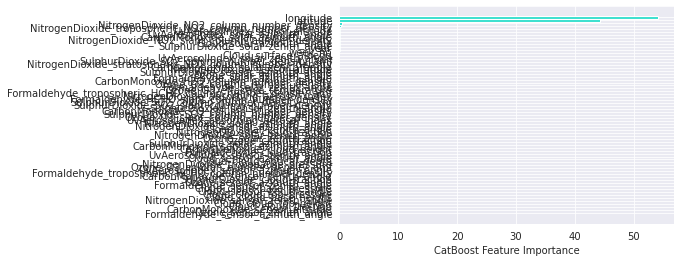

In [44]:
from matplotlib import pyplot as plt

plt.barh(feature_names, 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [45]:
import shap

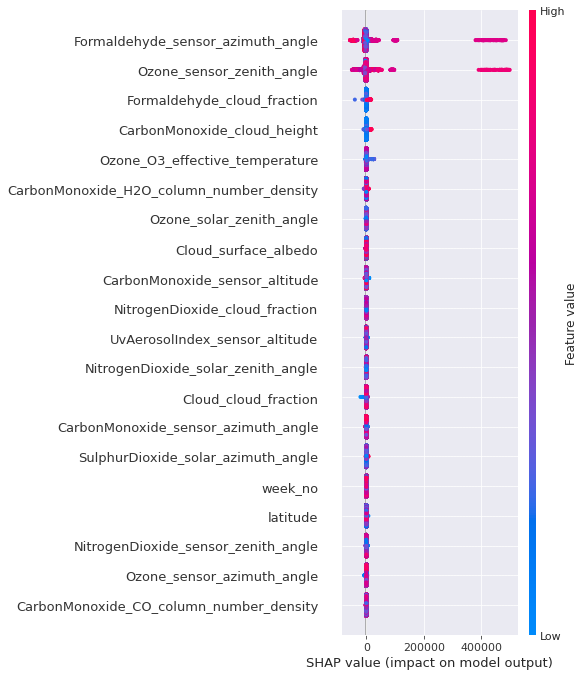

In [46]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names = feature_names)

In [47]:
train.head(1)

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.93944,56.896198,...,47991.296016,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874


## Making Prediction

In [48]:
pred_simple = cb_regress_model.predict(test)
pred_grid = model.predict(test)

In [49]:
x=(pred_simple*0.4+pred_grid*0.6)

In [50]:
# Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': testID, 'emission': pred_grid})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-23.53_27.47_2019_1,2292.814522
1,ID_-23.53_27.47_2019_2,2658.099271
2,ID_-23.53_27.47_2019_3,2799.528363
3,ID_-23.53_27.47_2019_4,2738.630203
4,ID_-23.53_27.47_2019_5,24426.897325


In [51]:
sub_file.to_csv('submission.csv', index = False)